# 1a

Error processing 1a_1100_0640.csv: can't multiply sequence by non-int of type 'float'


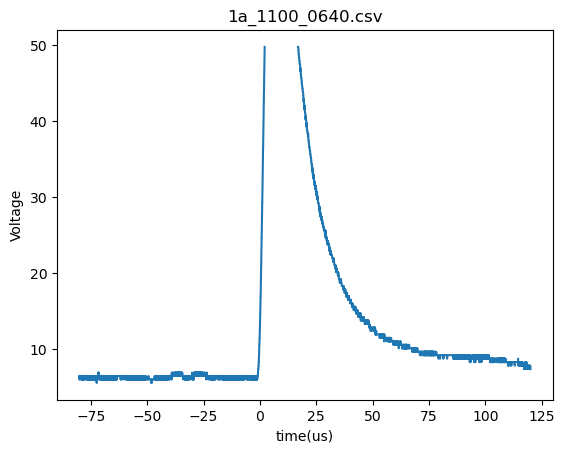

Error processing 1a_1100_0082.csv: can't multiply sequence by non-int of type 'float'


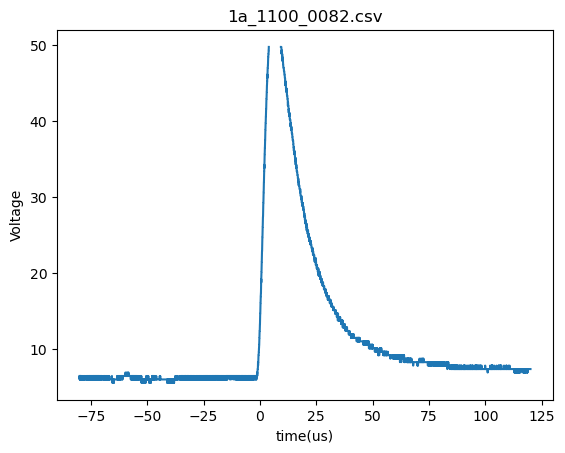

Error processing 1a_1200_0813.csv: can't multiply sequence by non-int of type 'float'


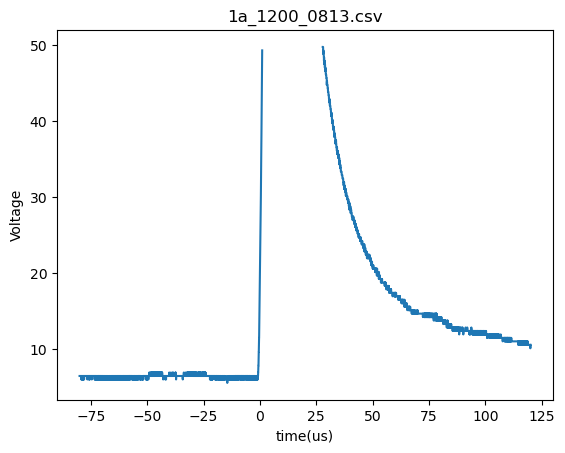

Error processing 1a_1325_0110.csv: can't multiply sequence by non-int of type 'float'


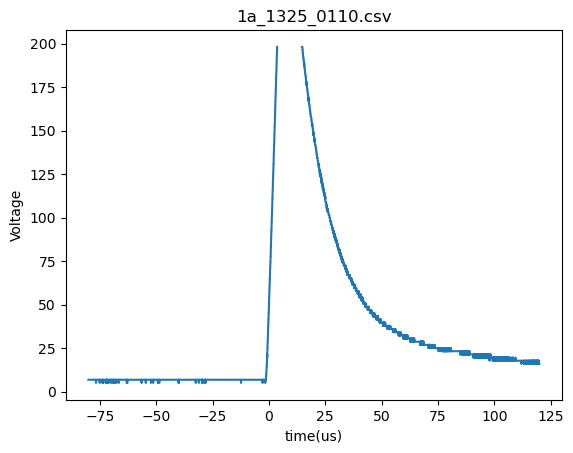

Error processing 1a_1400_0319.csv: can't multiply sequence by non-int of type 'float'


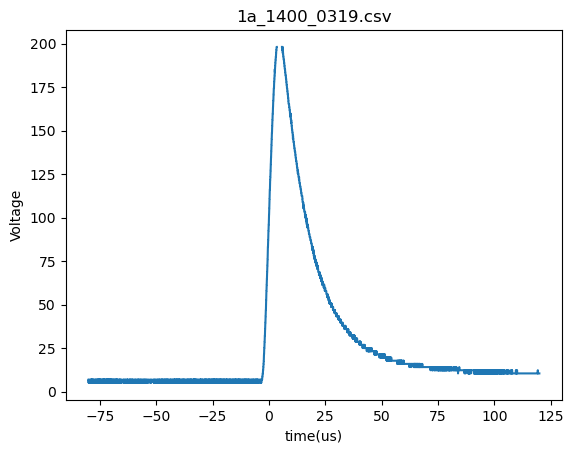

Error processing 1a_1500_0971.csv: can't multiply sequence by non-int of type 'float'


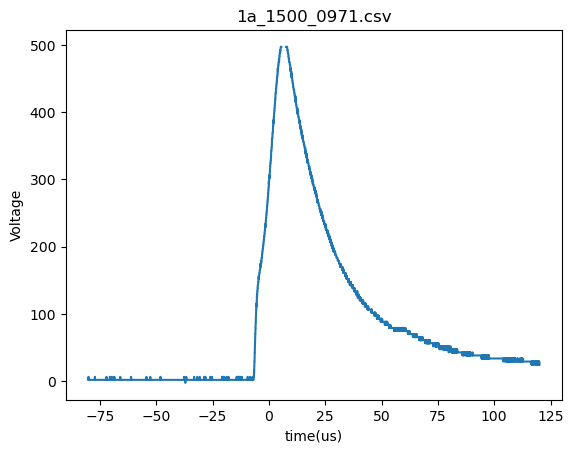

In [38]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from tkinter import Tk
from tkinter.filedialog import askdirectory


folder_path_task = "1a"
folder_path_voltage = [950,1000,1100,1150,1200,1250,1300,1325,1350,1375,1400,1425,1450,1475,1500,1550,1600]

average_peak = []
peak_areas_voltages = []
file_names_voltages = []

for i in range(len(folder_path_voltage)):

    folder_path = folder_path_task + "/" + folder_path_task + "_" + str(folder_path_voltage[i])
    
    # List CSV files
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    #list of peak integral
    peak_areas = []
    file_names = []
    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        file_names.append(file_name)
        
        try:
            # Skip the first row and use the second row as header
            df = pd.read_csv(file_path, skiprows=1, encoding='utf-8')
    
            time_unit = df.columns[0].strip('() ')
            voltage_unit = df.columns[1].strip('() ').lower()
            voltage_raw = df.iloc[:, 1] 
            #print(voltage_unit)
    
    
            # Rename columns
            df.columns = ['Time_us', 'Voltage_V']
    
            # Convert to numeric
            time_us = pd.to_numeric(df['Time_us'], errors='coerce')
            voltage = pd.to_numeric(df['Voltage_V'], errors='coerce')
            
            # Convert voltage to volts
            if 'mv' == voltage_unit:
                voltage = voltage_raw*1e-3
            elif 'v' == voltage_unit:
                voltage = voltage_raw
            else:
                raise ValueError(f"Unknown voltage unit: {voltage_unit}")
                
            # Convert time from microseconds to seconds
            time_s = time_us * 1e-6
            mode_voltage = stats.mode(voltage, keepdims=True)[0][0]
    
            voltage_adjusted = voltage - mode_voltage
    
            # Compute area
            area = np.trapz(voltage_adjusted, time_s)
            peak_areas.append(area)
            #print('mode_voltage: ' + str(mode_voltage) + ' V   Peak area: ' + str(area) + ' V·s')
    
        except Exception as e:
        
            print(f"Error processing {file_name}: {e}")

            peak_areas.append(np.nan)
            
            plt.plot(time_us, voltage)
            plt.xlabel("time(us)")
            plt.ylabel("Voltage")
            plt.title(str(file_name))
            plt.show()
            
    #average peak integral value of selected data

    peak_areas_voltages.append(peak_areas)
    average_peak.append(np.nanmean(peak_areas))
    file_names_voltages.append(file_names)

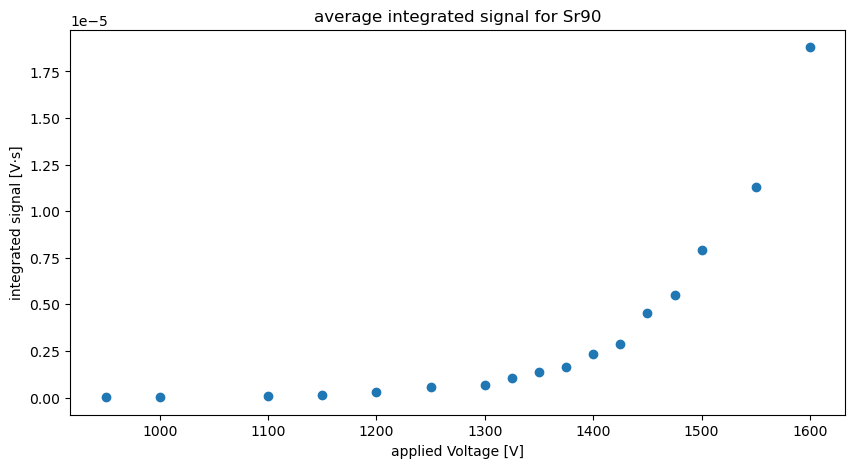

In [39]:
fig, axs = plt.subplots(figsize = (10,5))
plt.scatter(folder_path_voltage,average_peak)
plt.xlabel("applied Voltage [V]")
plt.ylabel("integrated signal [V·s]")
plt.title("average integrated signal for Sr90" )
plt.savefig("1a/1a_average_integrated_signal.png")
plt.show()       

In [43]:
import pandas as pd
import numpy as np

DF_average_signal = pd.DataFrame(list(zip(folder_path_voltage, average_peak)),
               columns =['applied_voltage_V', 'average_integrated_signal_Vs'])
DF_average_signal.to_csv('1a/1a_average_integrated_signal.csv', index=False)

for i in range(len(folder_path_voltage)):

    DF_voltage = pd.DataFrame(list(zip(file_names_voltages[i], peak_areas_voltages[i])), columns =['file_names','integrated_signal_Vs'])
    DF_voltage.to_csv('1a/1a_integrated_signal_' +str(folder_path_voltage[i]) + 'V.csv', index=False)

# 1b

In [44]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from tkinter import Tk
from tkinter.filedialog import askdirectory


folder_path_task = "1b"
folder_path_element = ["AM","NA","SR"]

peak_areas_elements = []
file_names_elements = []

for i in range(len(folder_path_element)):

    folder_path = folder_path_task + "/" + folder_path_task + "_" + folder_path_element[i]
    
    # List CSV files
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    #list of peak integral
    peak_areas = [] 
    file_names = []
    j = 0
    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        file_names.append(file_name)
        
        try:
            # Skip the first row and use the second row as header
            df = pd.read_csv(file_path, skiprows=1, encoding='utf-8',sep = ';')
            
            time_unit = df.columns[0].strip('() ')
            voltage_unit = df.columns[1].strip('() ').lower()
            voltage_raw = df.iloc[:, 1] 
    
            
            # Rename columns
            df.columns = ['Time_us', 'Voltage_V']

            df['Voltage_V'] = df['Voltage_V'].str.replace(',','.')
            df['Time_us'] = df['Time_us'].str.replace(',','.')
            
            # Convert to numeric
            time_us = pd.to_numeric(df['Time_us'], errors='coerce')
            voltage = pd.to_numeric(df['Voltage_V'], errors='coerce')

            
            # Convert voltage to volts
            if 'mv' == voltage_unit:
                voltage = voltage*1e-3
            elif 'v' == voltage_unit:
                voltage = voltage
            else:
                raise ValueError(f"Unknown voltage unit: {voltage_unit}")
            
            # Convert time from microseconds to seconds
            time_s = time_us * 1e-6
            mode_voltage = stats.mode(voltage, keepdims=True)[0][0]

            voltage_adjusted = voltage - mode_voltage
            
            # Compute area
            area = np.trapz(voltage_adjusted, time_s)
            peak_areas.append(area)
            #print('mode_voltage: ' + str(mode_voltage) + ' V   Peak area: ' + str(area) + ' V·s')
            j += 1
            print(str(j) + "/10000 done",end = '\r')
        except Exception as e:

            peak_areas.append(np.nan)
            print(f"Error processing {file_name}: {e}")
    
    print(folder_path_element[i] + " done")
    peak_areas_elements.append(peak_areas)
    file_names_elements.append(file_names)

Error processing 1b_AM_2_0890.csv: No columns to parse from file
Error processing 1b_AM_2_4828.csv: No columns to parse from file
AM done000 done
Error processing 1b_NA_1_4890.csv: No columns to parse from file
Error processing 1b_NA_1_5910.csv: No columns to parse from file
Error processing 1b_NA_1_4889.csv: No columns to parse from file
Error processing 1b_NA_1_5911.csv: No columns to parse from file
Error processing 1b_NA_1_4244.csv: No columns to parse from file
Error processing 1b_NA_1_1446.csv: No columns to parse from file
Error processing 1b_NA_1_1732.csv: No columns to parse from file
Error processing 1b_NA_1_4888.csv: No columns to parse from file
Error processing 1b_NA_1_4243.csv: No columns to parse from file
Error processing 1b_NA_1_5912.csv: No columns to parse from file
NA done000 done
SR done0000 done


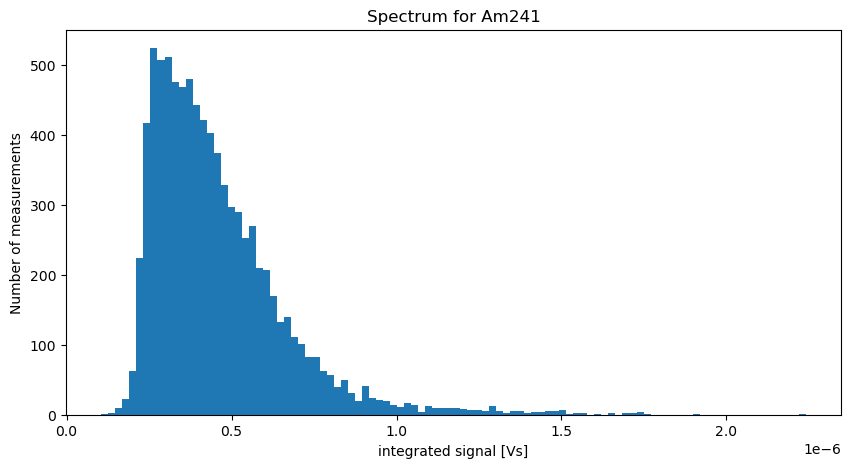

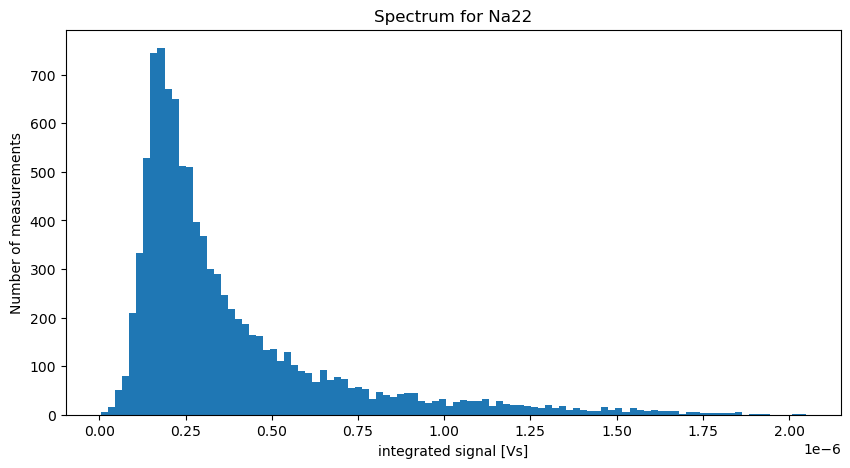

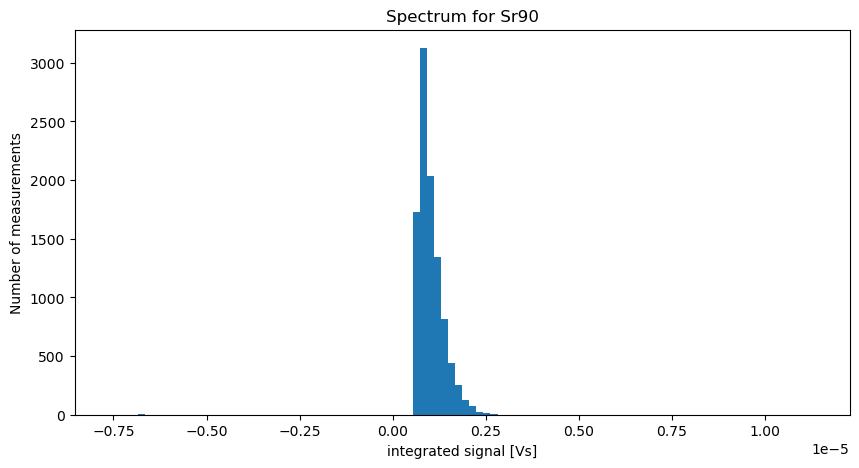

In [45]:
import matplotlib.pyplot as plt
fig, axs = plt.subplots(figsize = (10,5))
plt.xlabel("integrated signal [Vs]")
plt.ylabel("Number of measurements")
plt.title("Spectrum for Am241")
plt.hist(peak_areas_elements[0],bins = 100)
plt.savefig("1b/1b_spectrum_AM.png")

fig, axs = plt.subplots(figsize = (10,5))
plt.xlabel("integrated signal [Vs]")
plt.ylabel("Number of measurements")
plt.title("Spectrum for Na22")
plt.hist(peak_areas_elements[1],bins = 100)
plt.savefig("1b/1b_spectrum_NA.png")

fig, axs = plt.subplots(figsize = (10,5))
plt.xlabel("integrated signal [Vs]")
plt.ylabel("Number of measurements")
plt.title("Spectrum for Sr90")
plt.hist(peak_areas_elements[2],bins = 100)
plt.savefig("1b/1b_spectrum_SR.png")

In [48]:
for i in range(len(folder_path_element)):

    DF_element = pd.DataFrame(list(zip(file_names_elements[i], peak_areas_elements[i])), columns =['file_names','integrated_signal_Vs'])
    DF_element.to_csv('1b/1b_integrated_signal_' +str(folder_path_element[i]) + '.csv', index=False)

# 2a

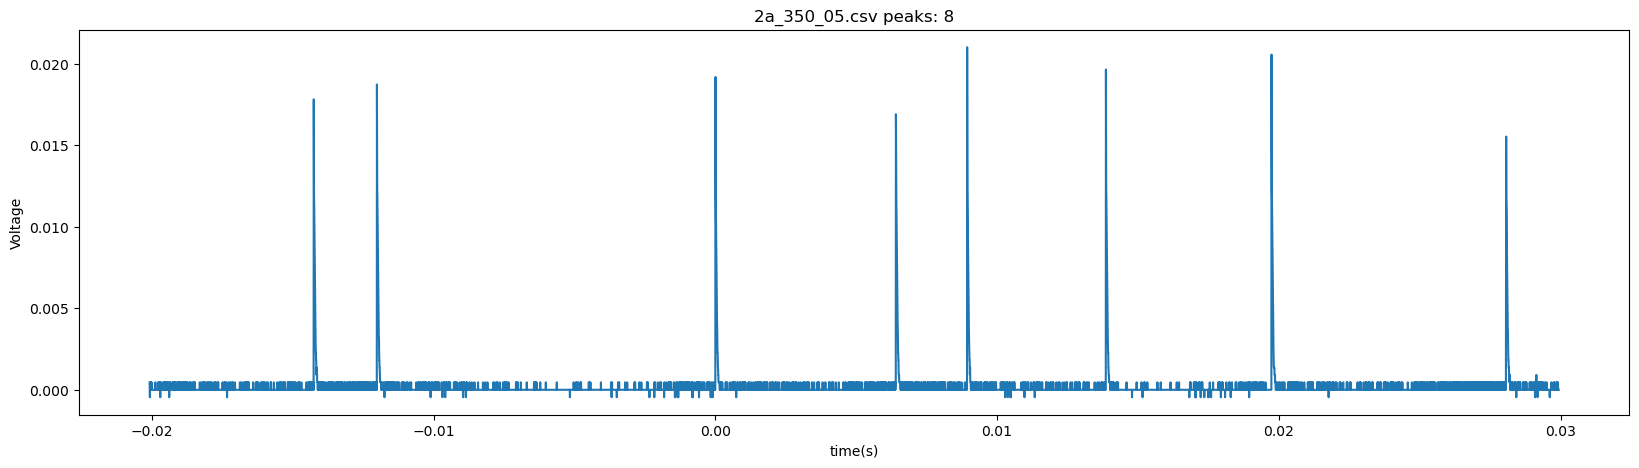

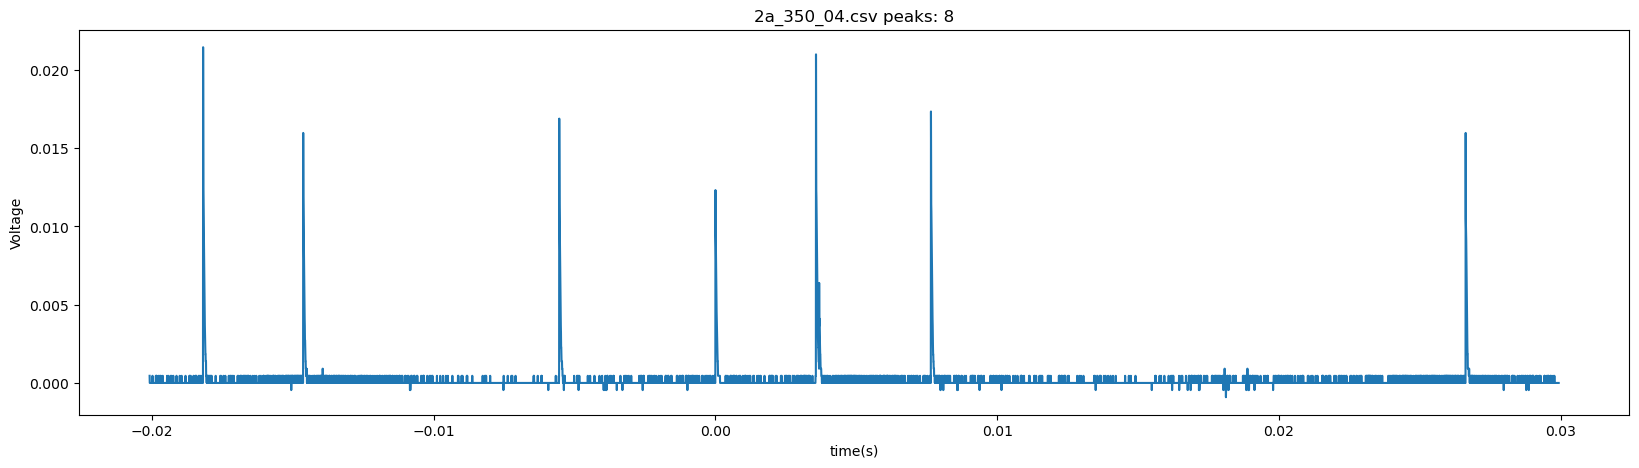

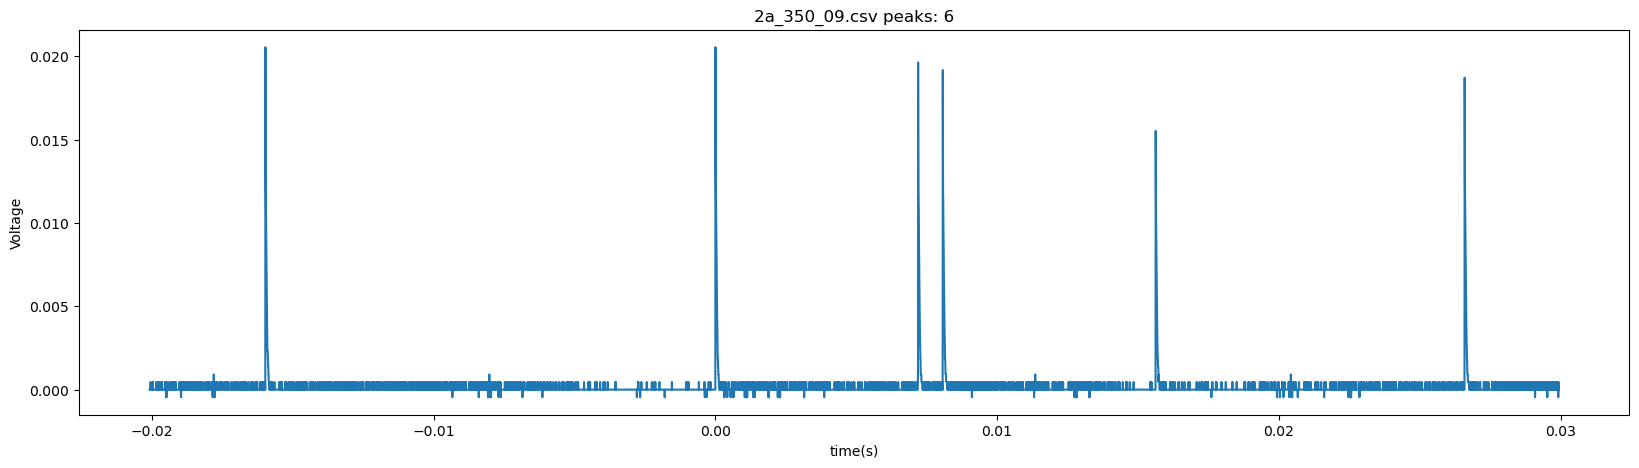

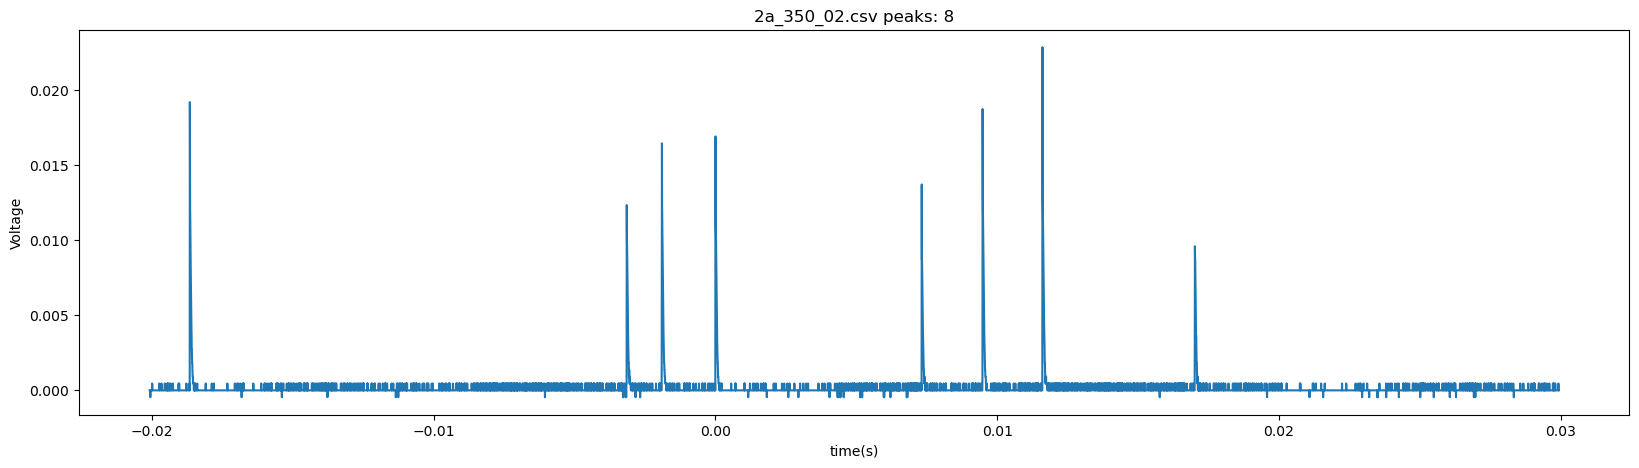

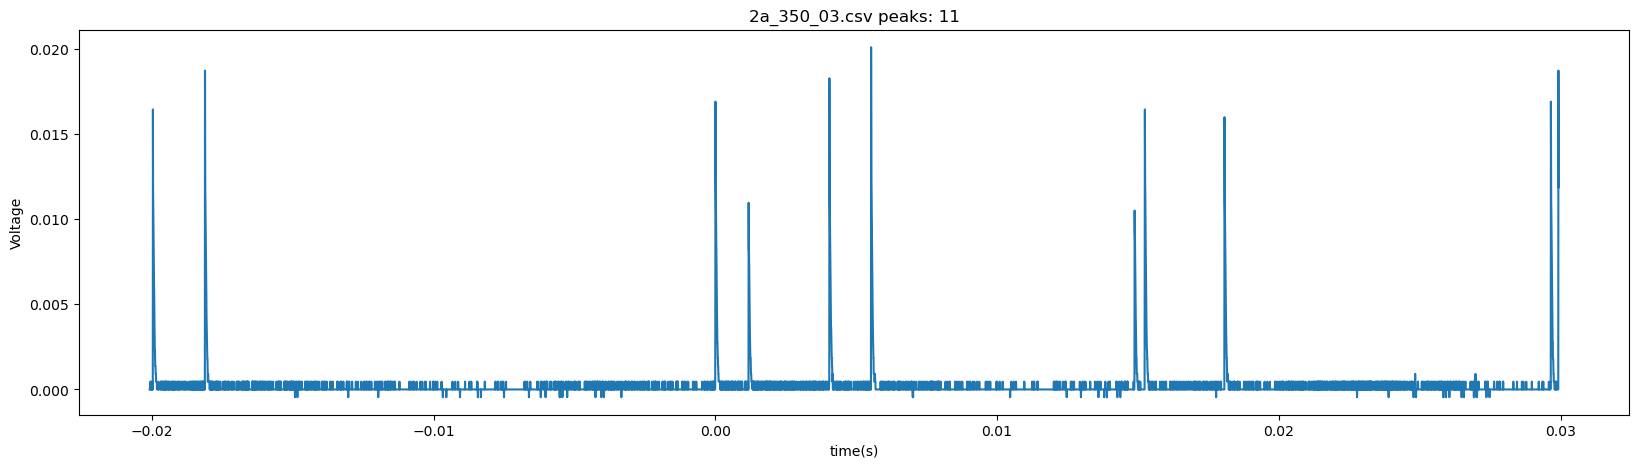

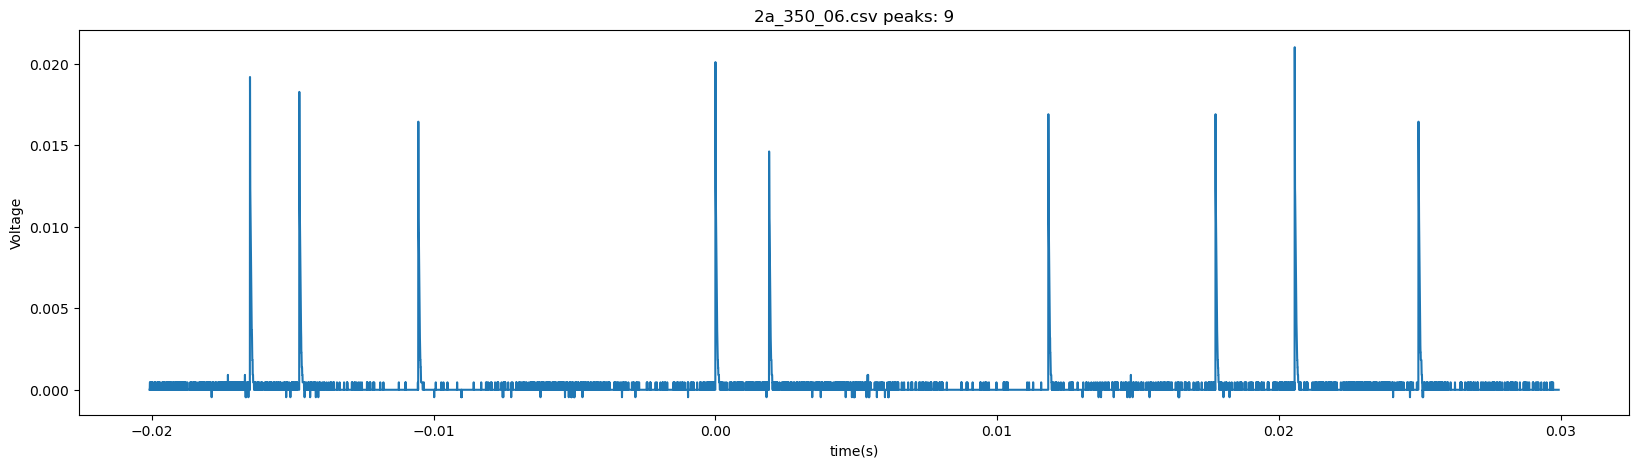

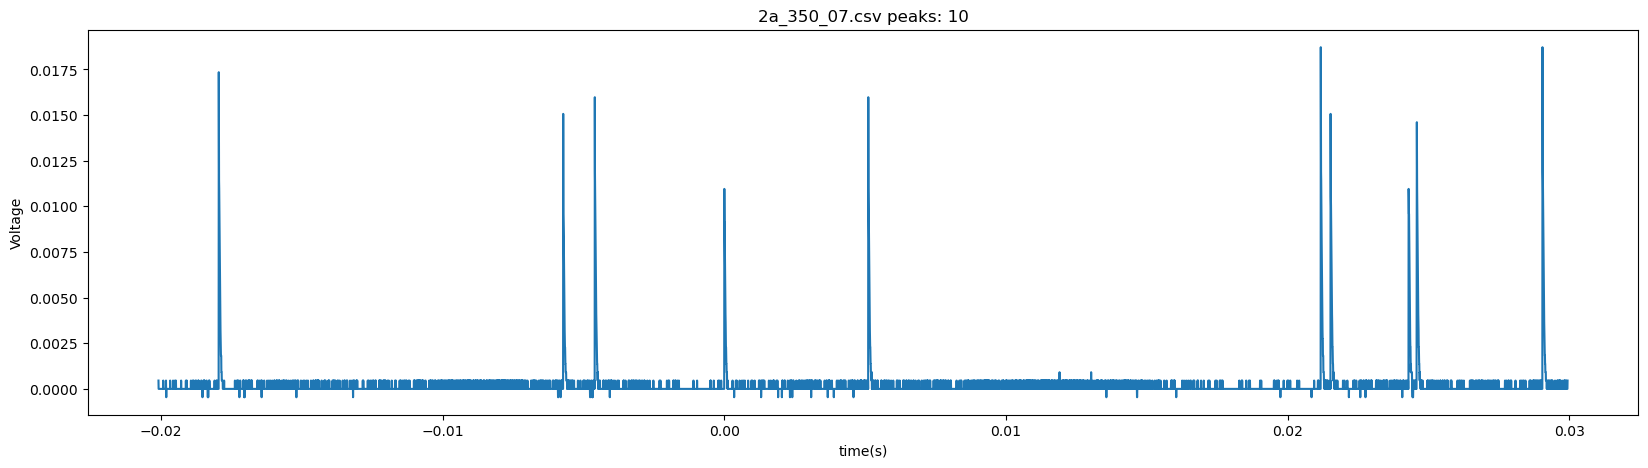

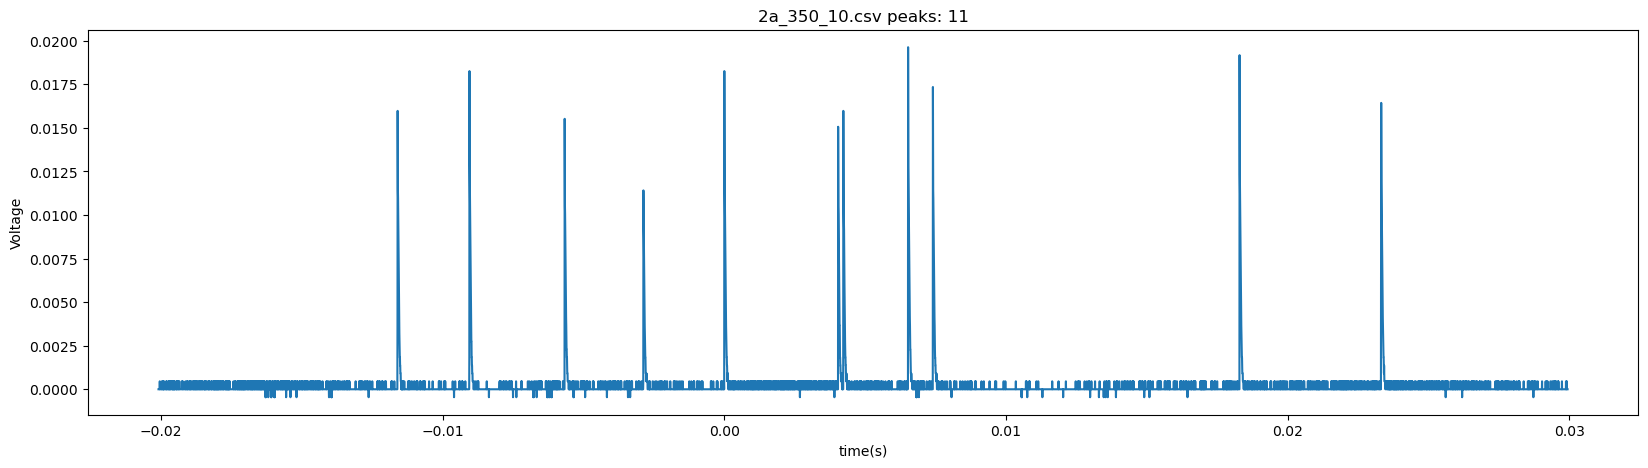

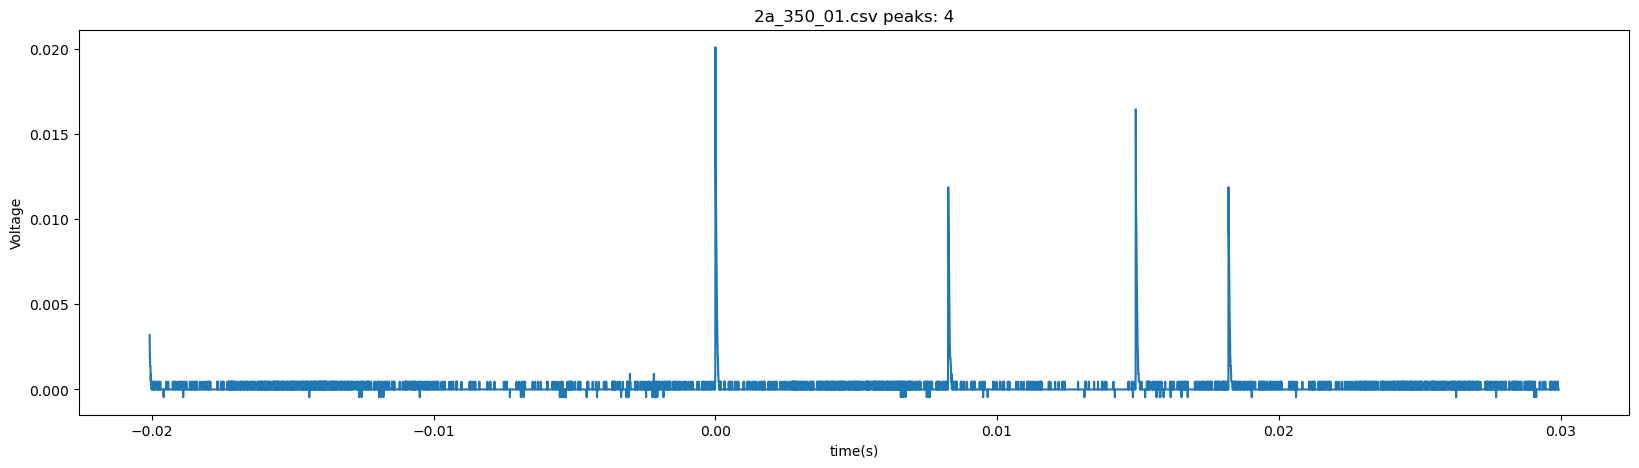

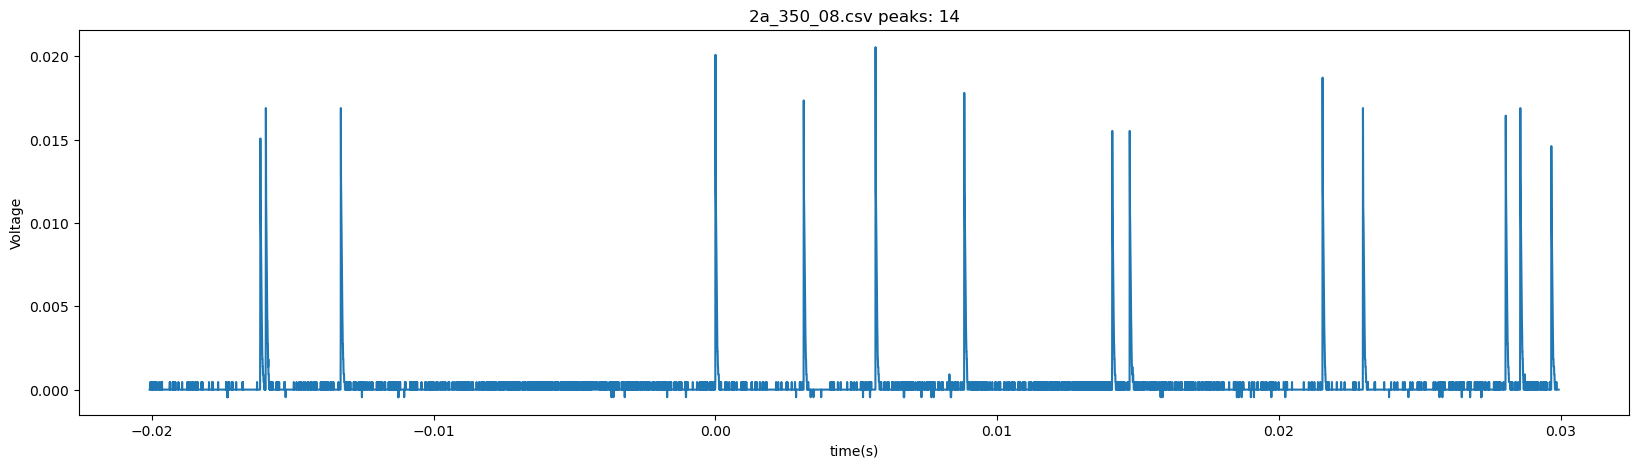

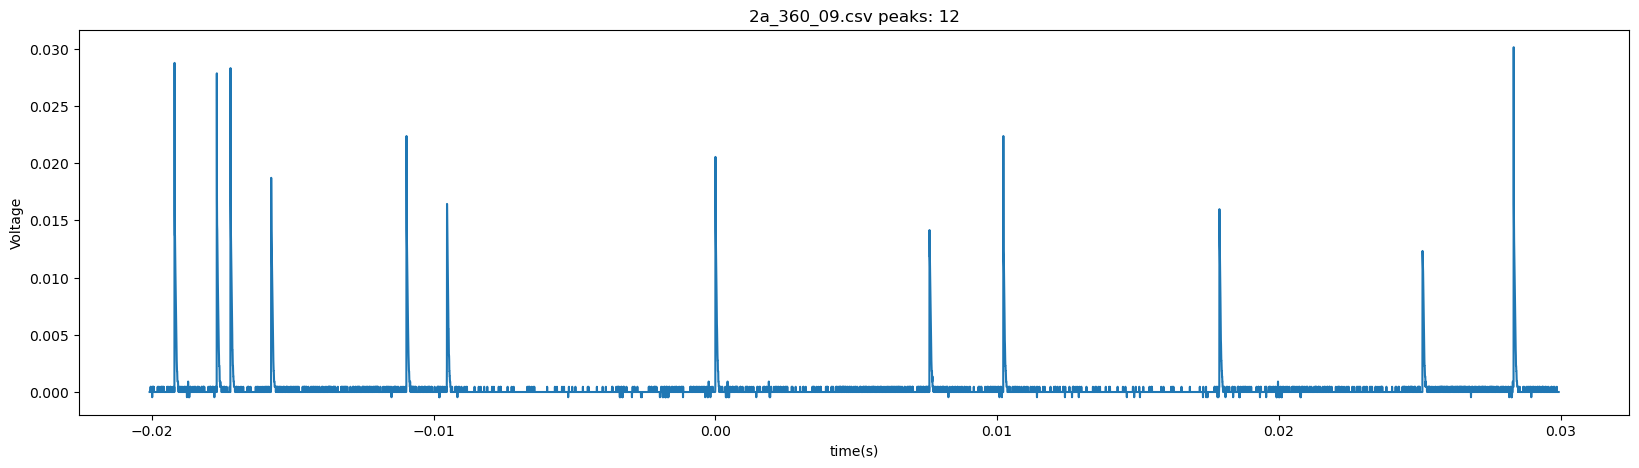

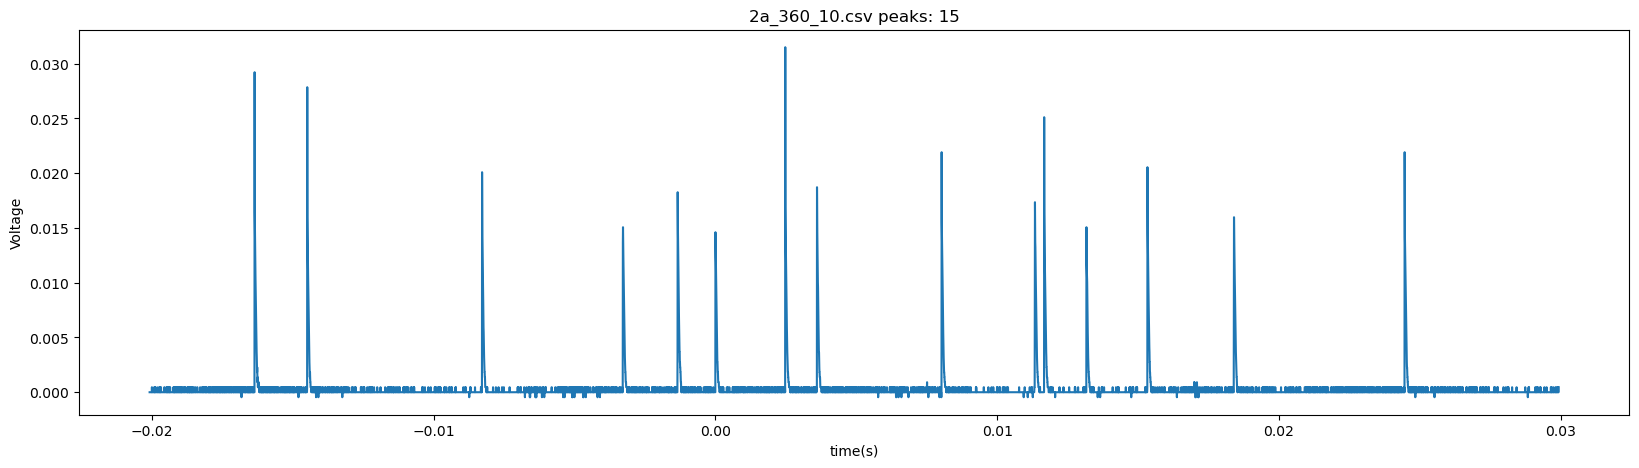

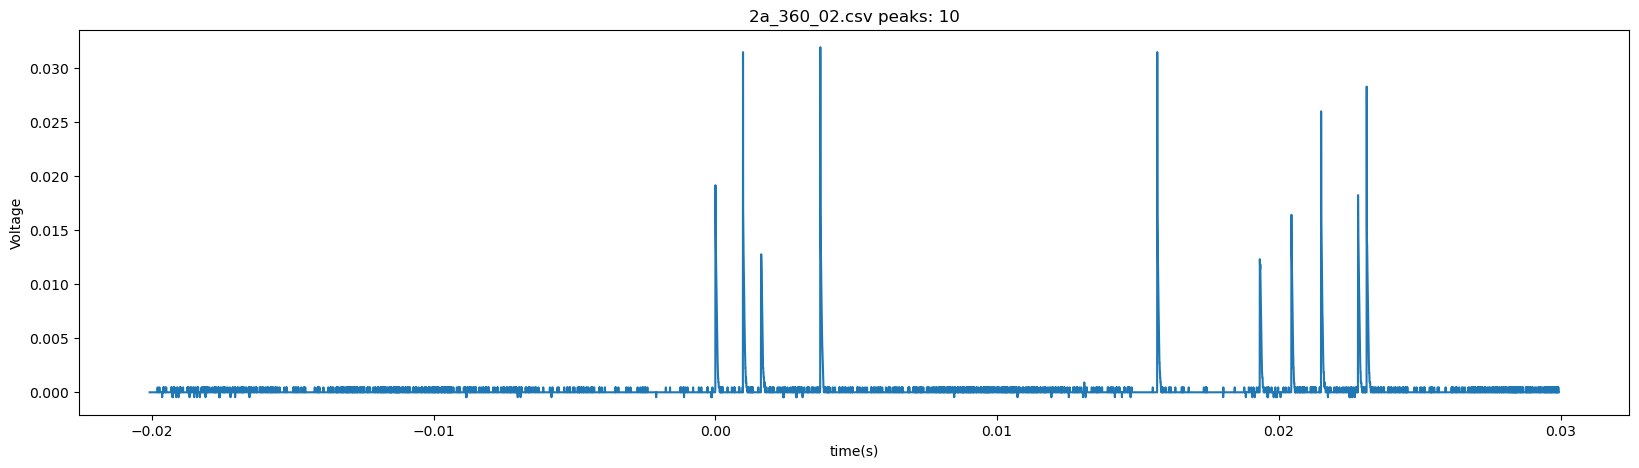

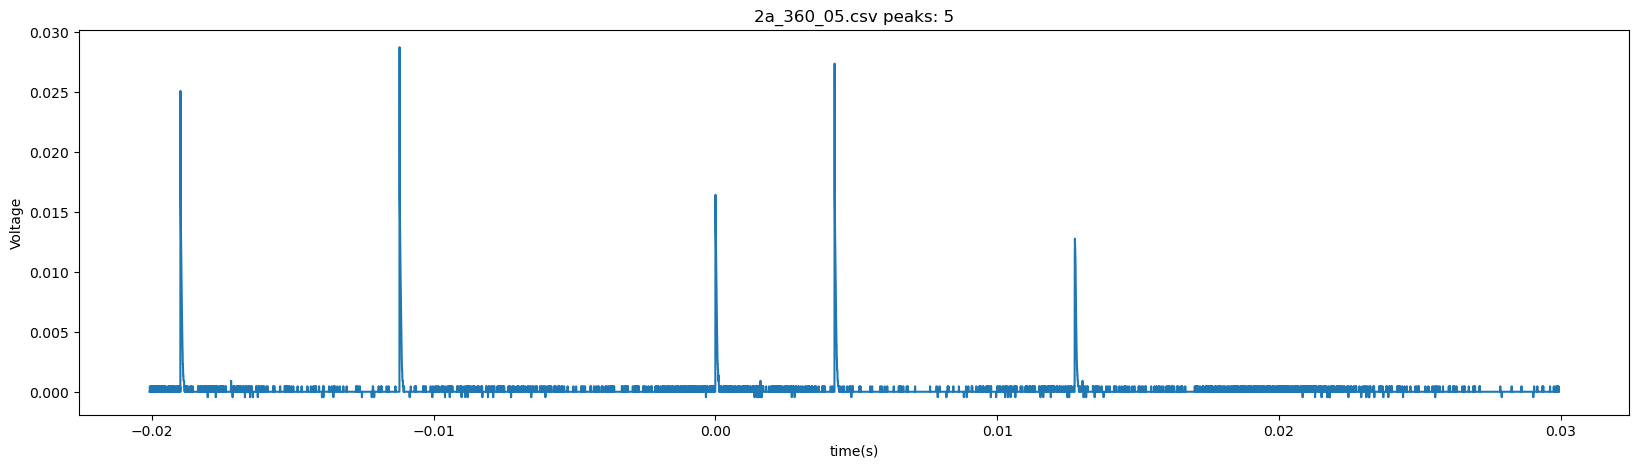

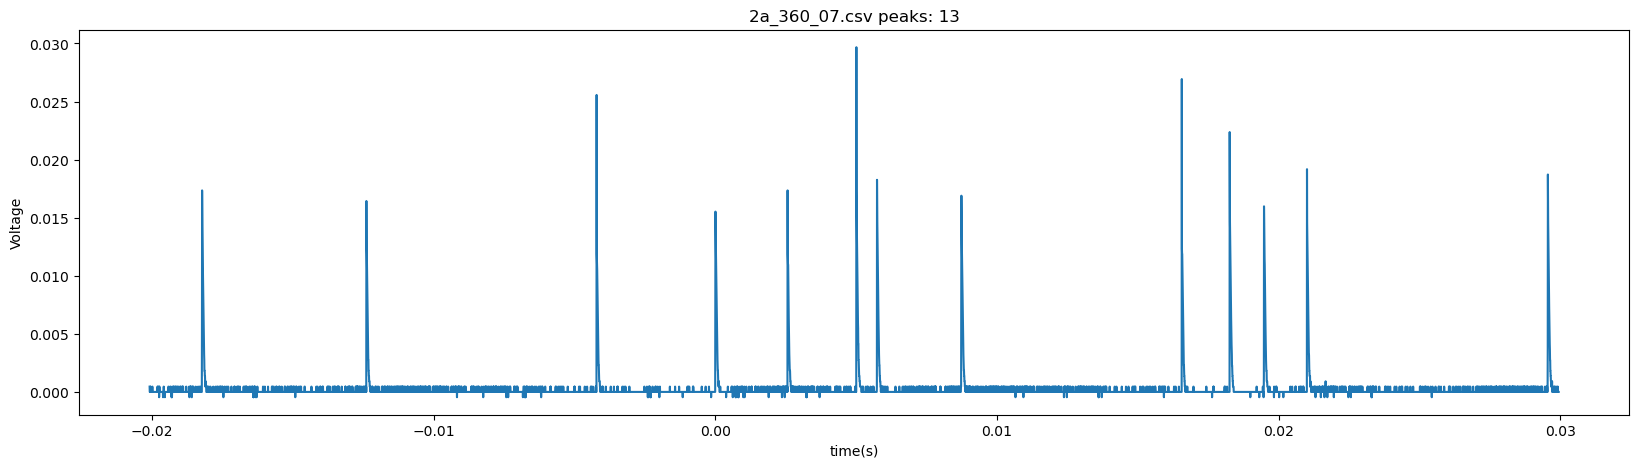

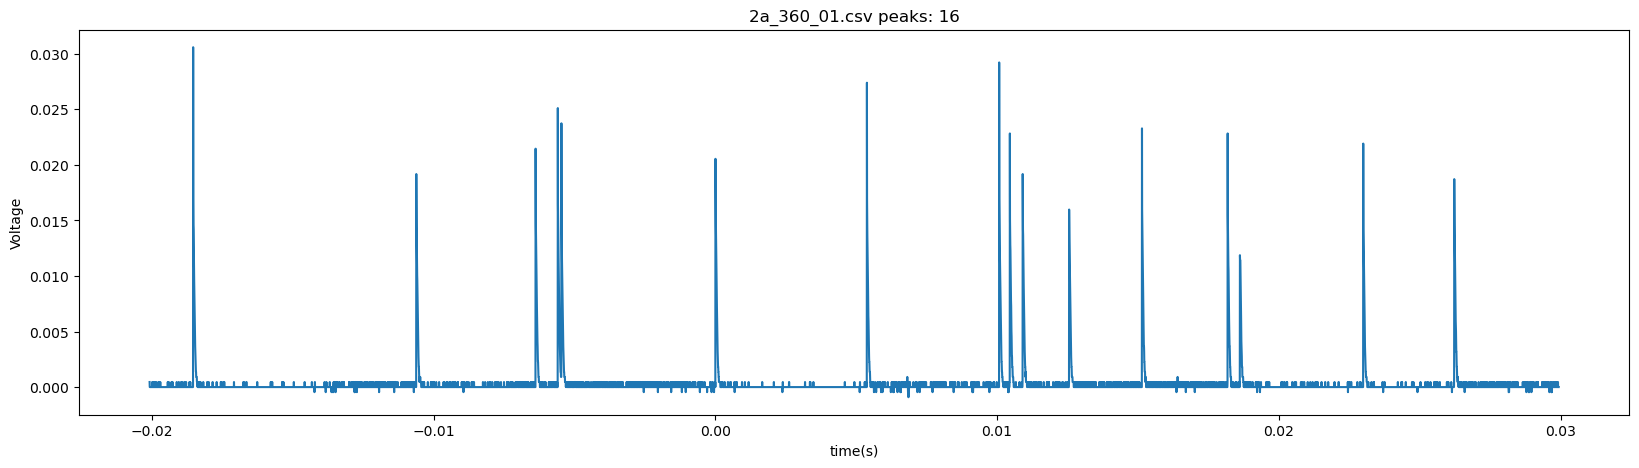

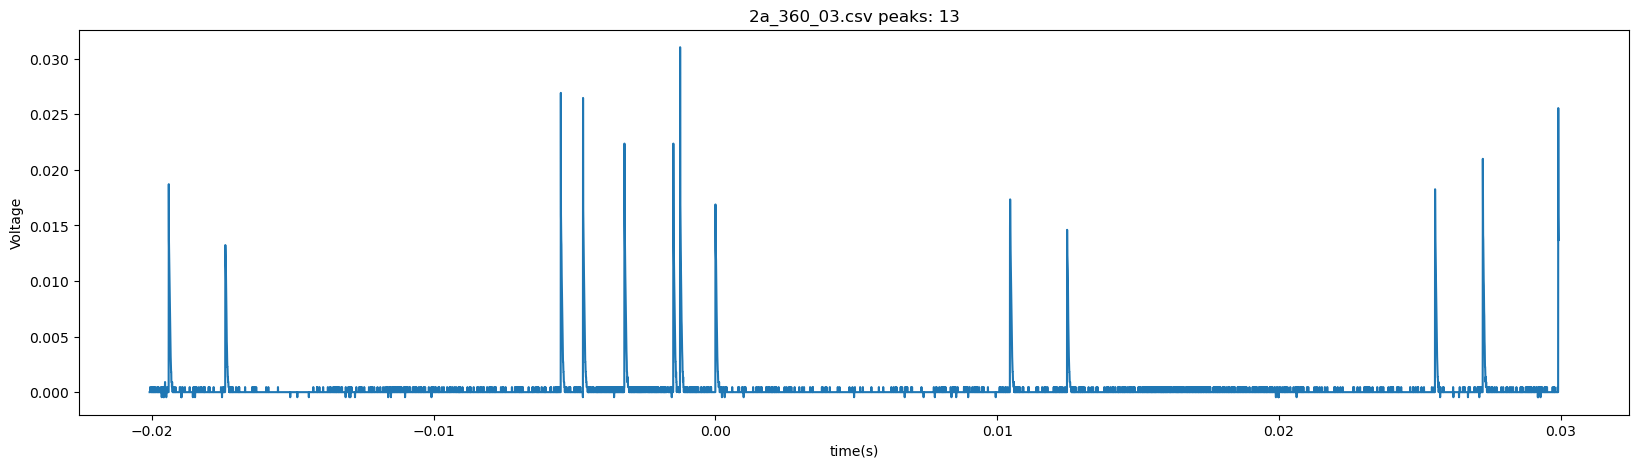

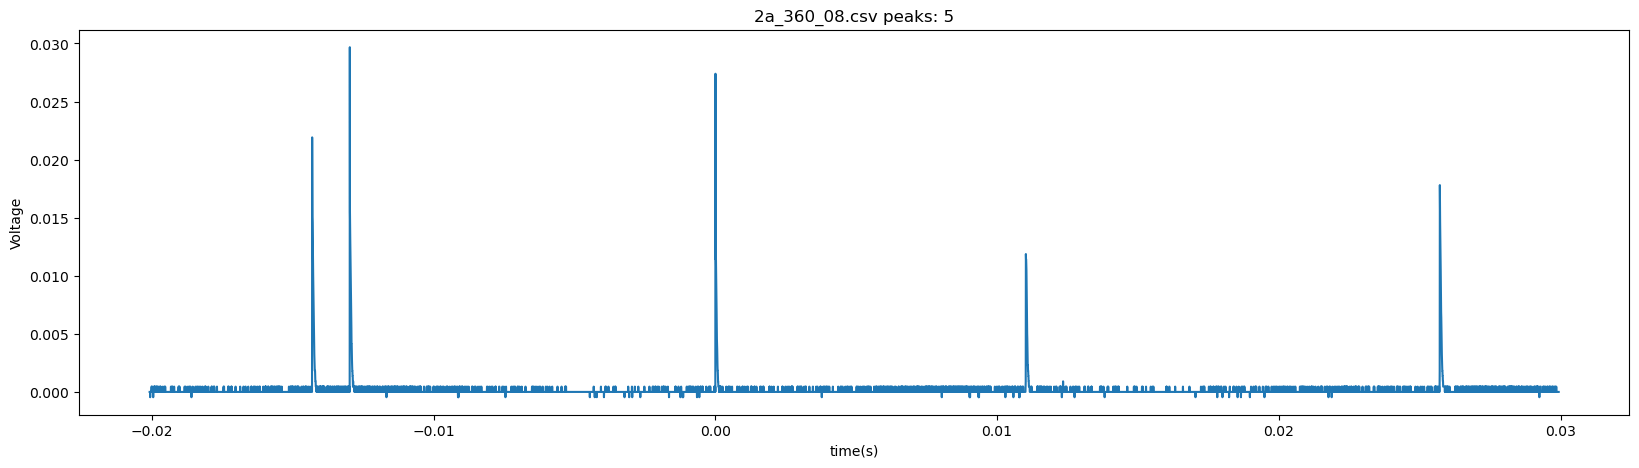

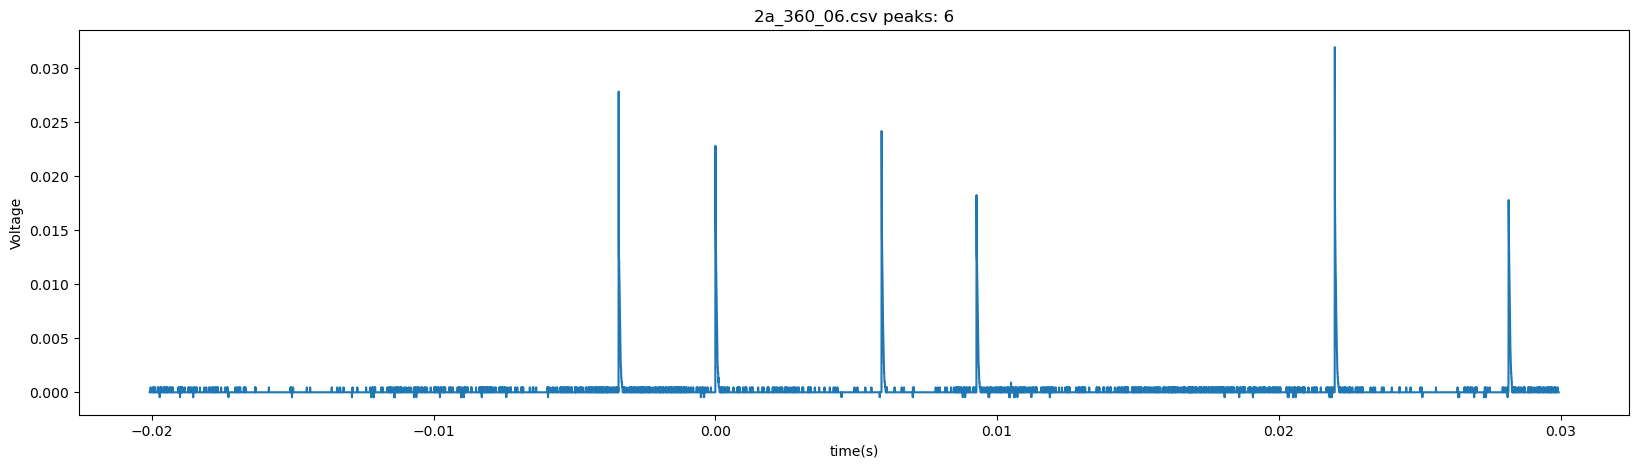

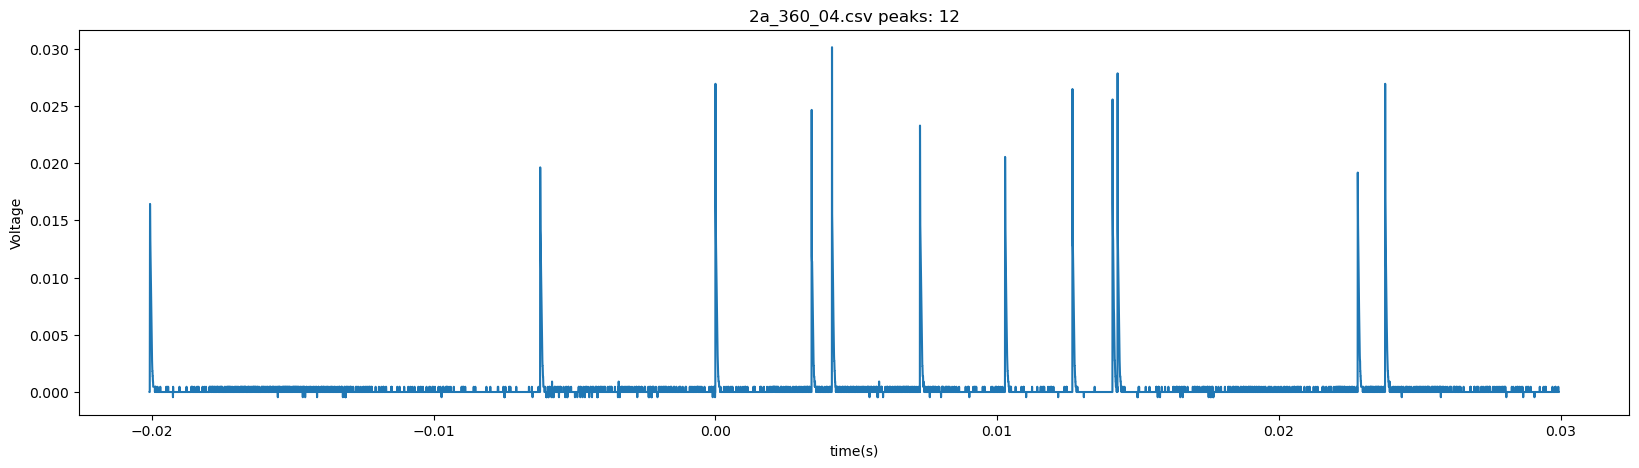

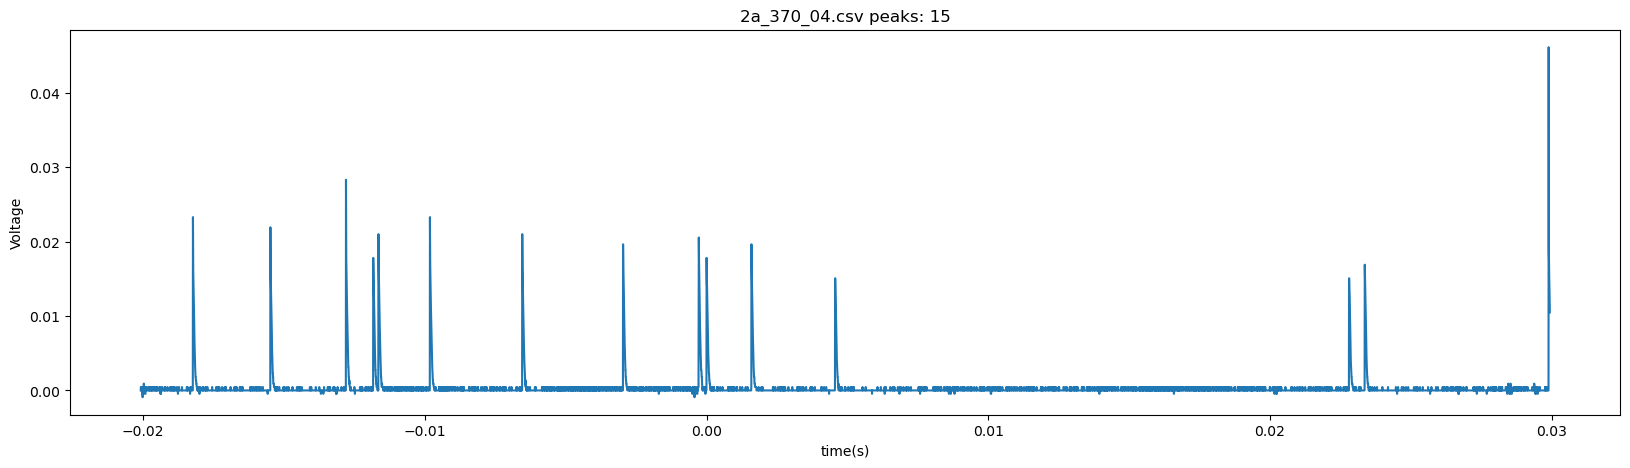

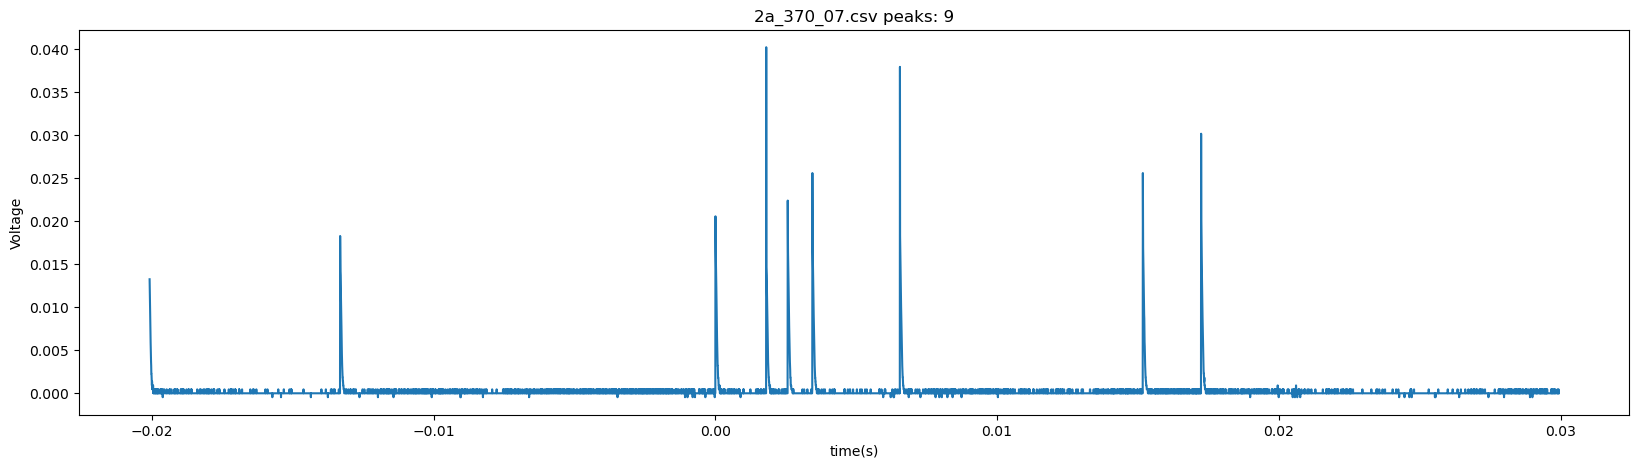

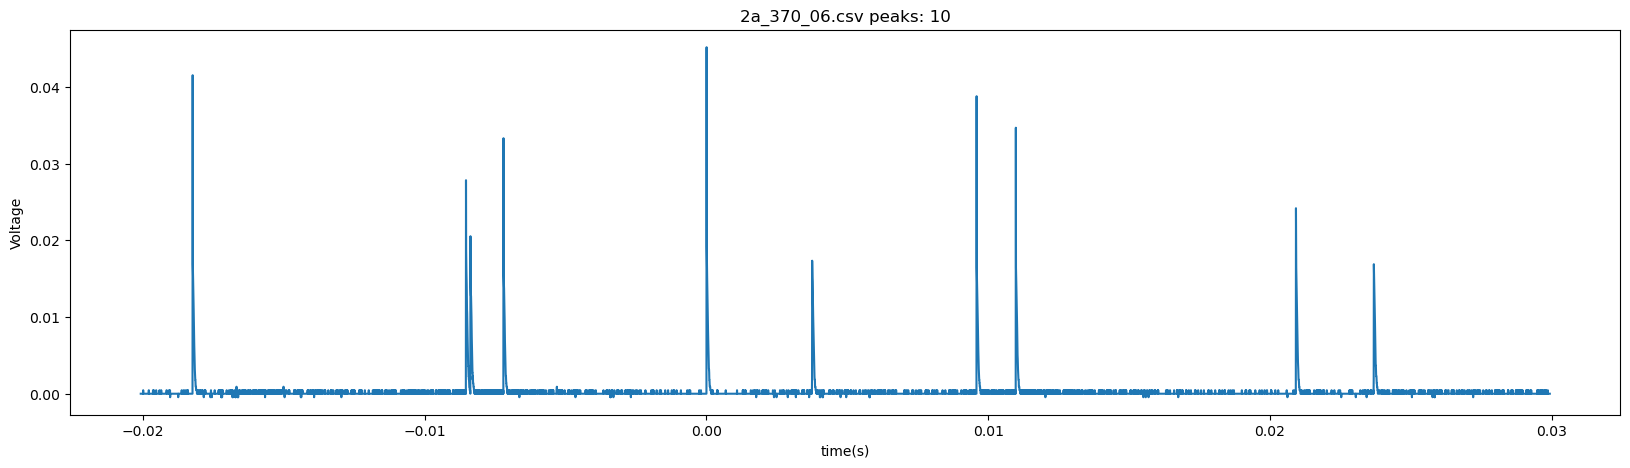

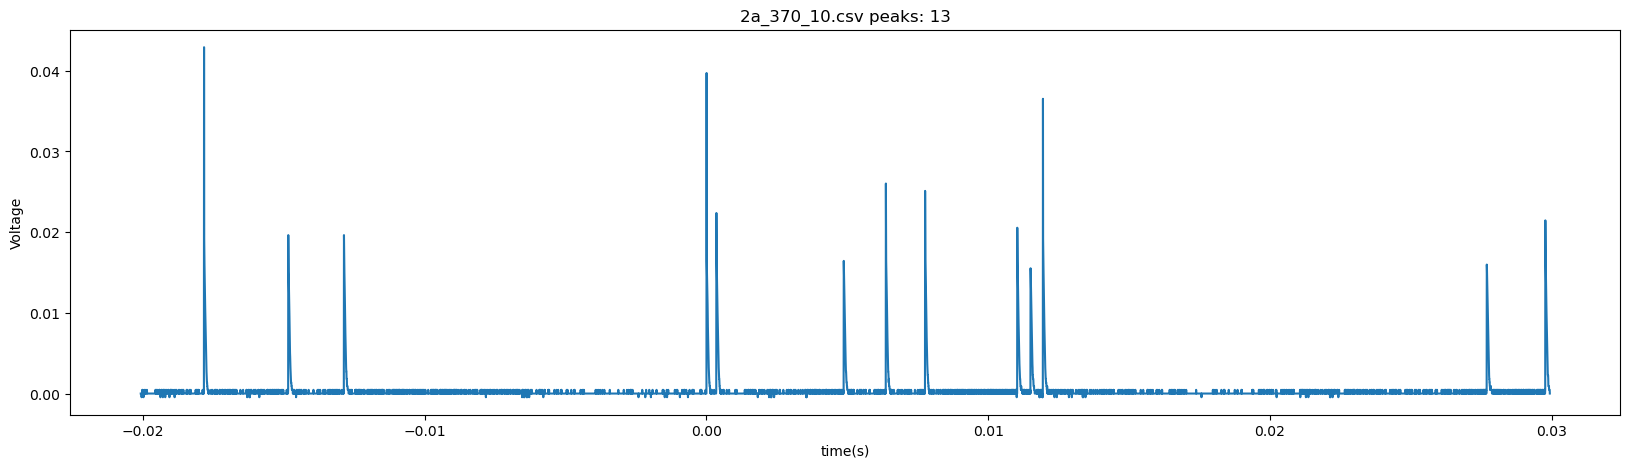

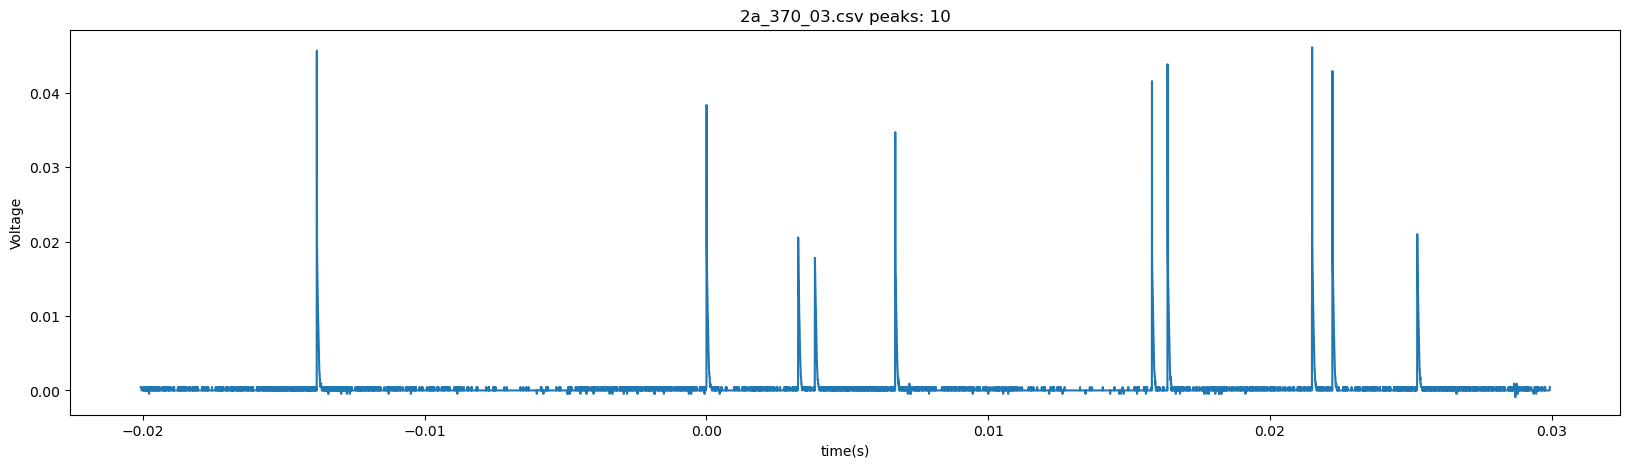

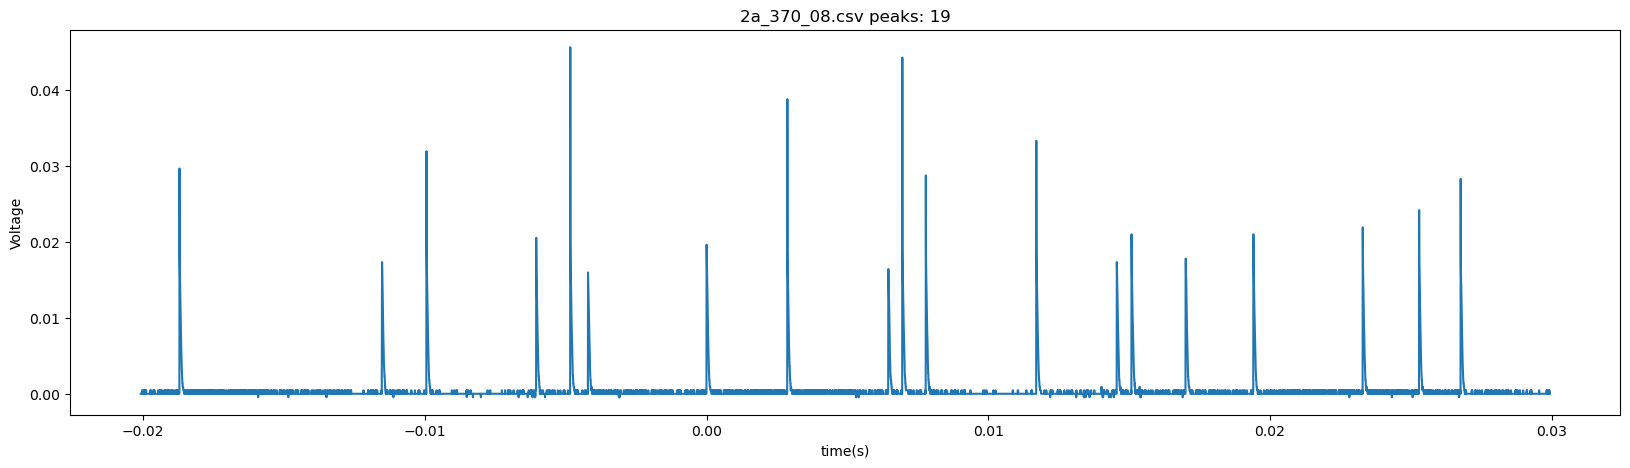

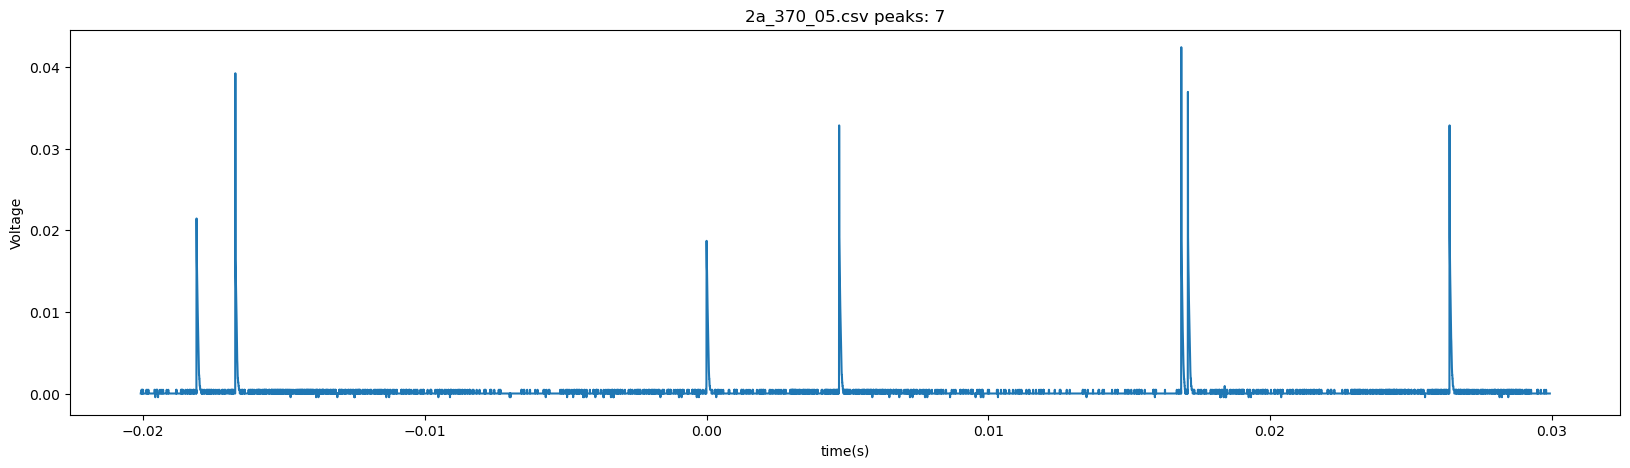

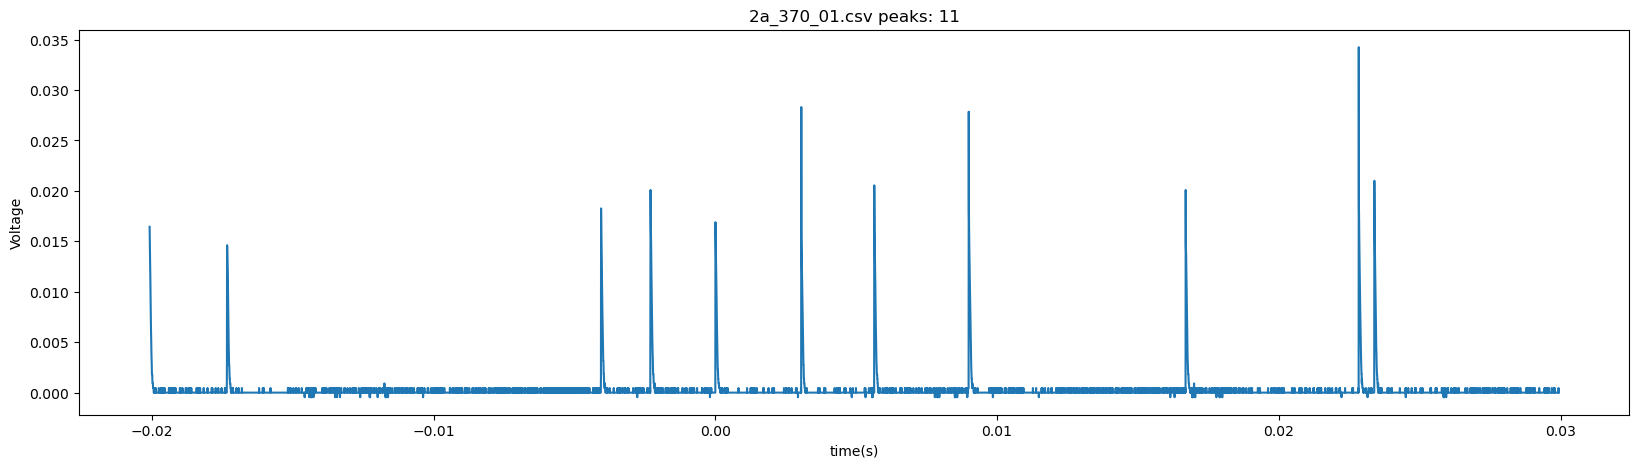

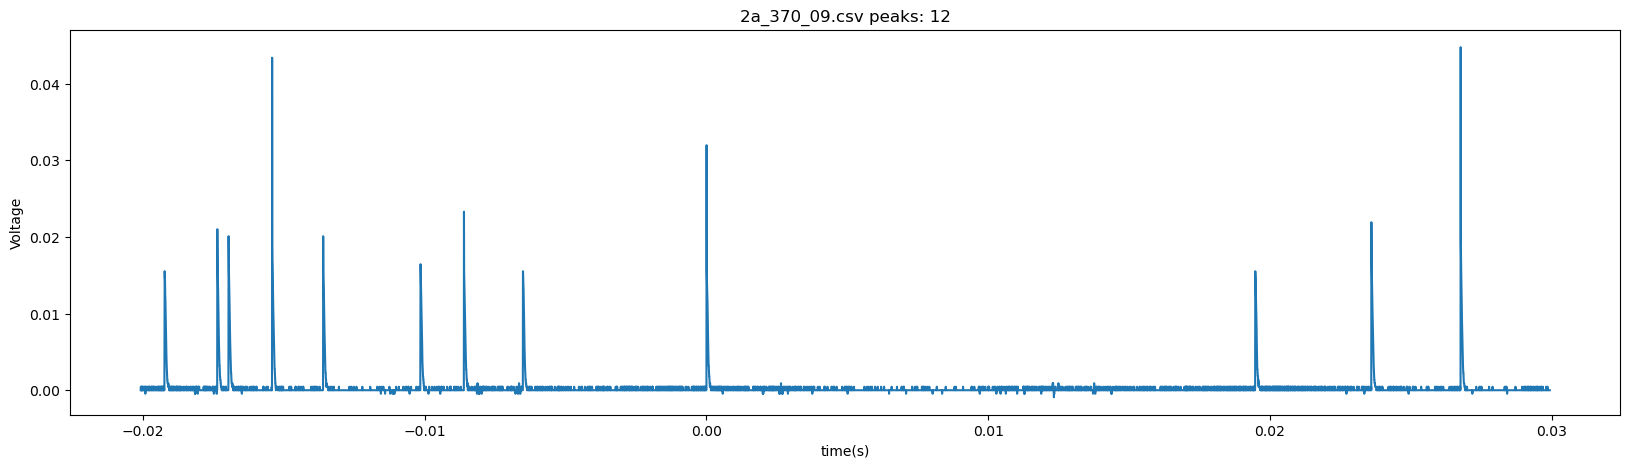

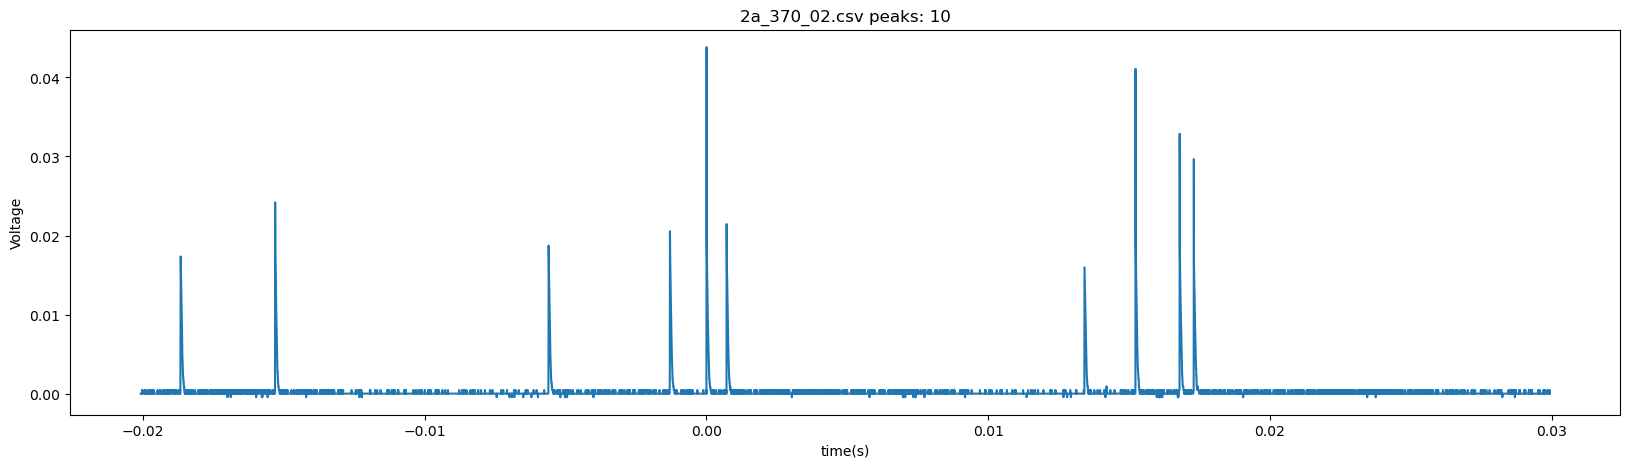

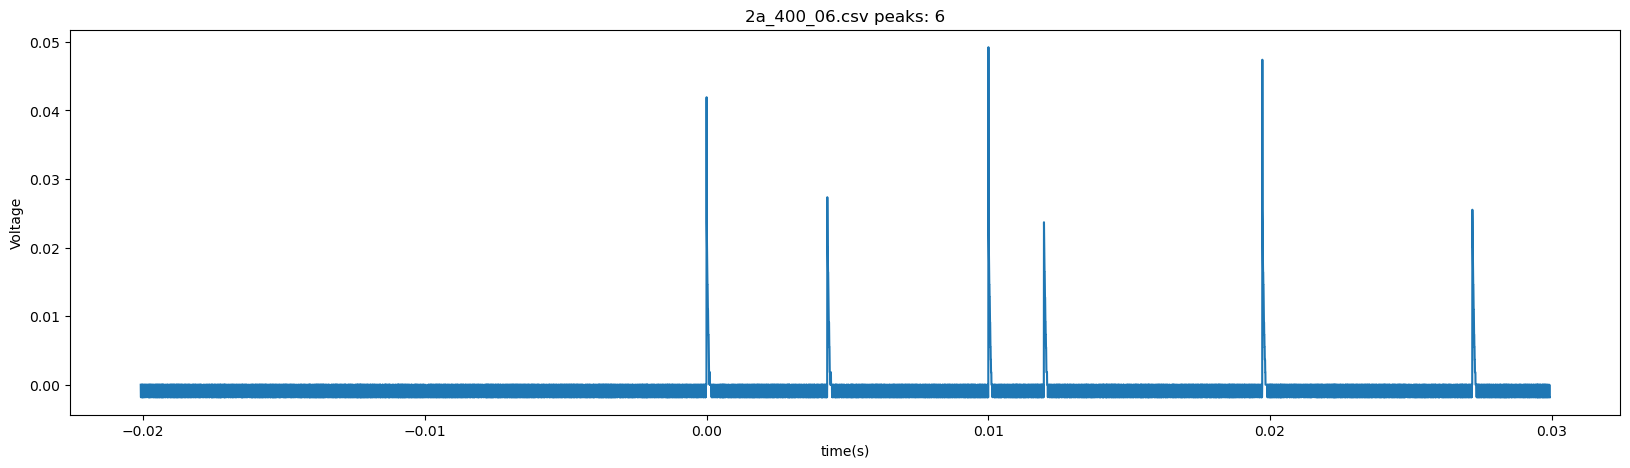

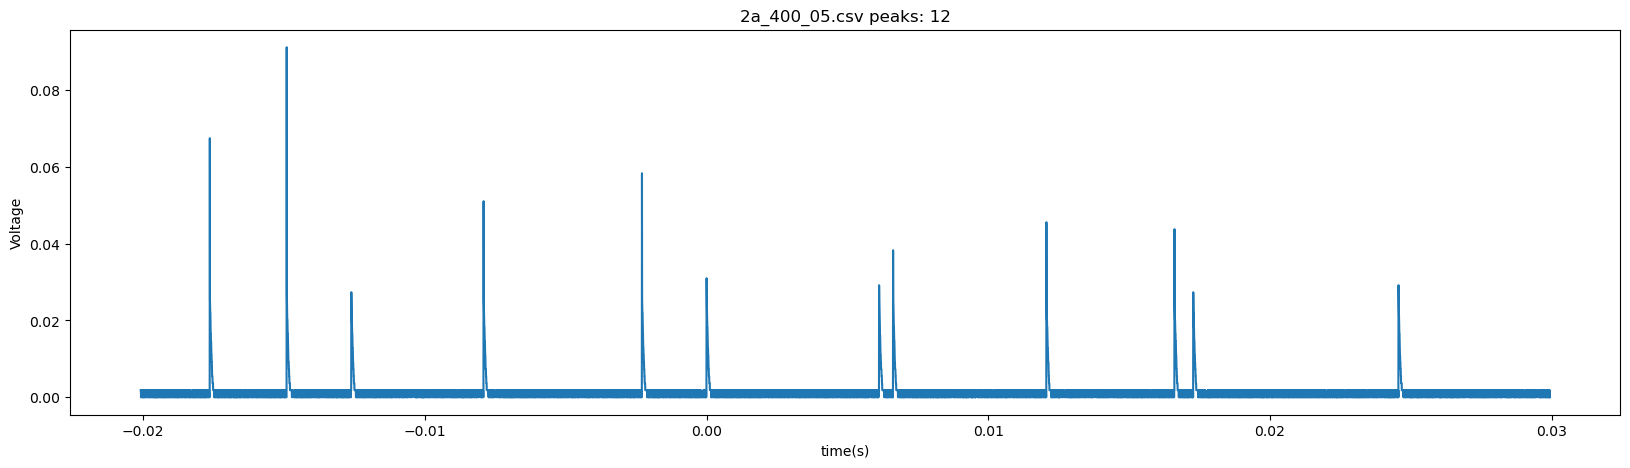

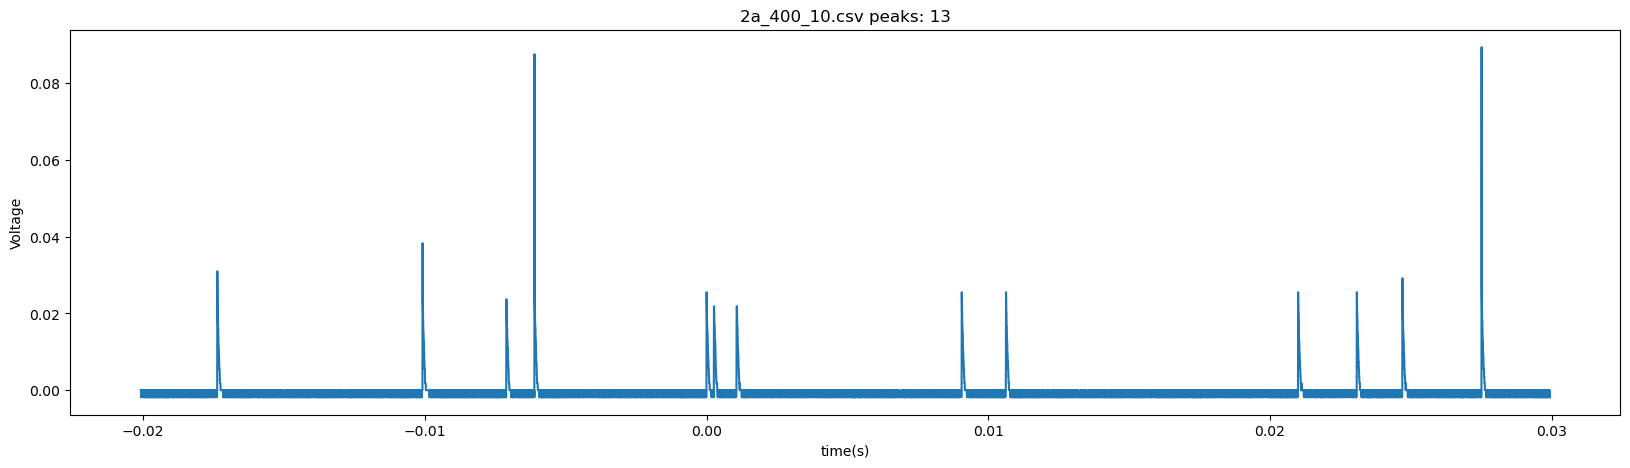

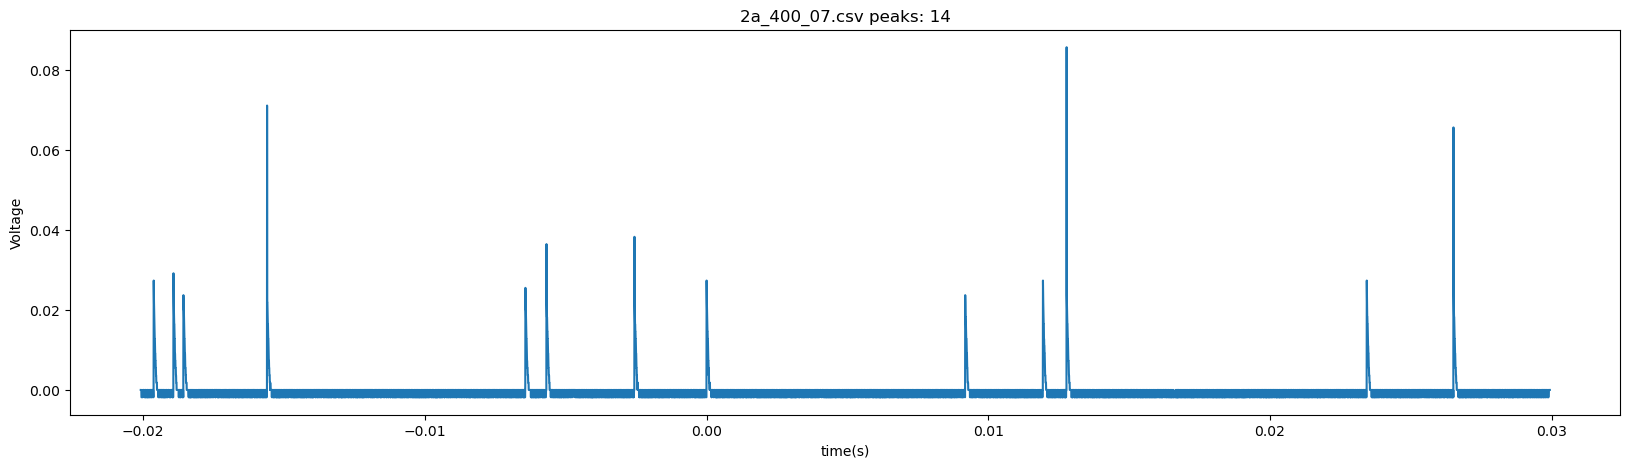

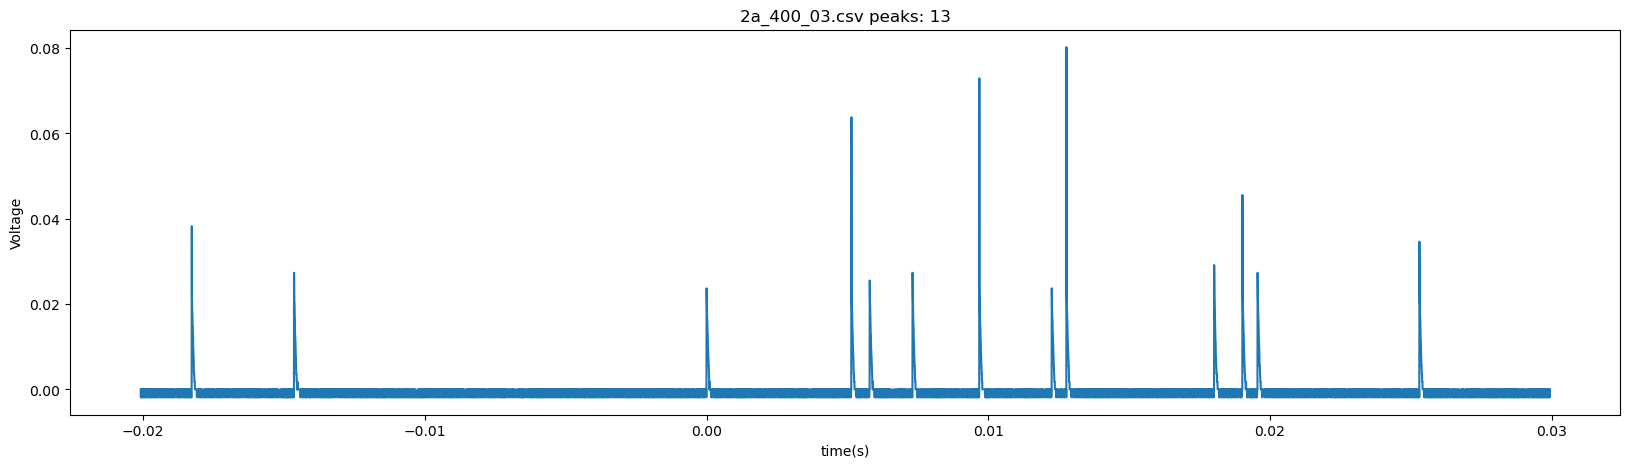

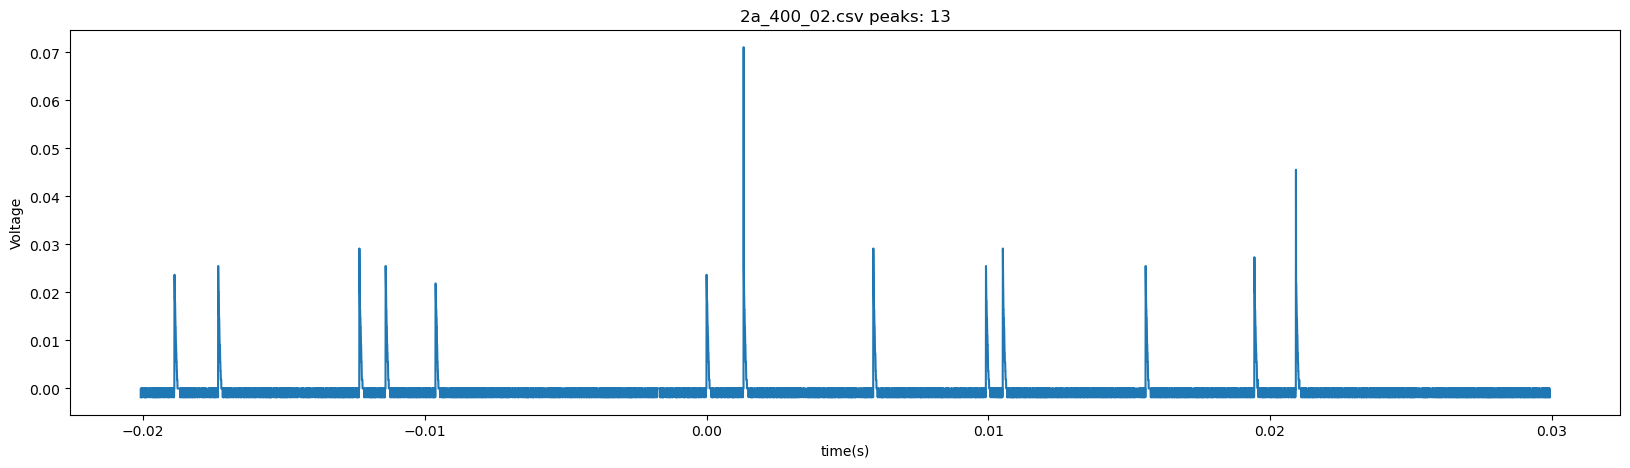

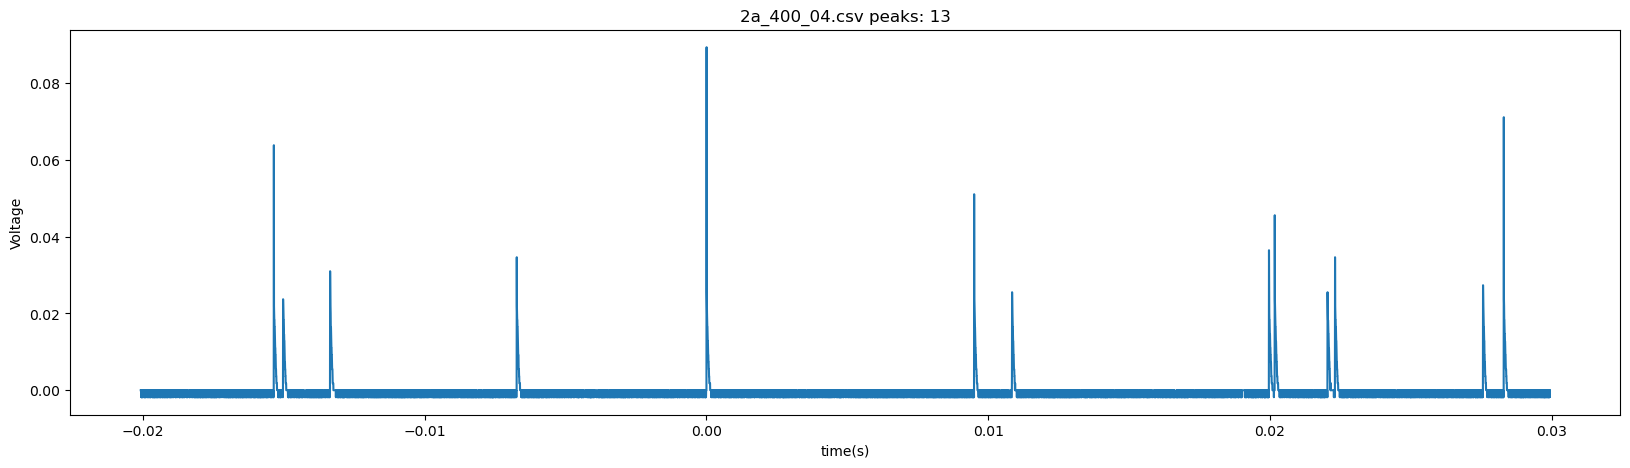

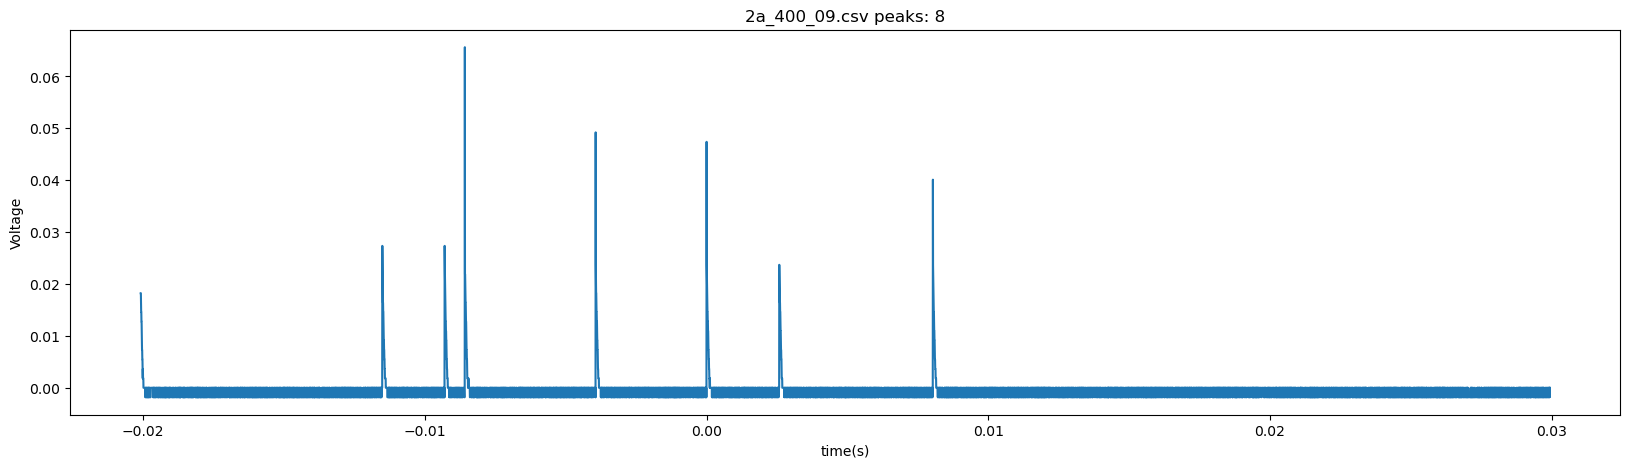

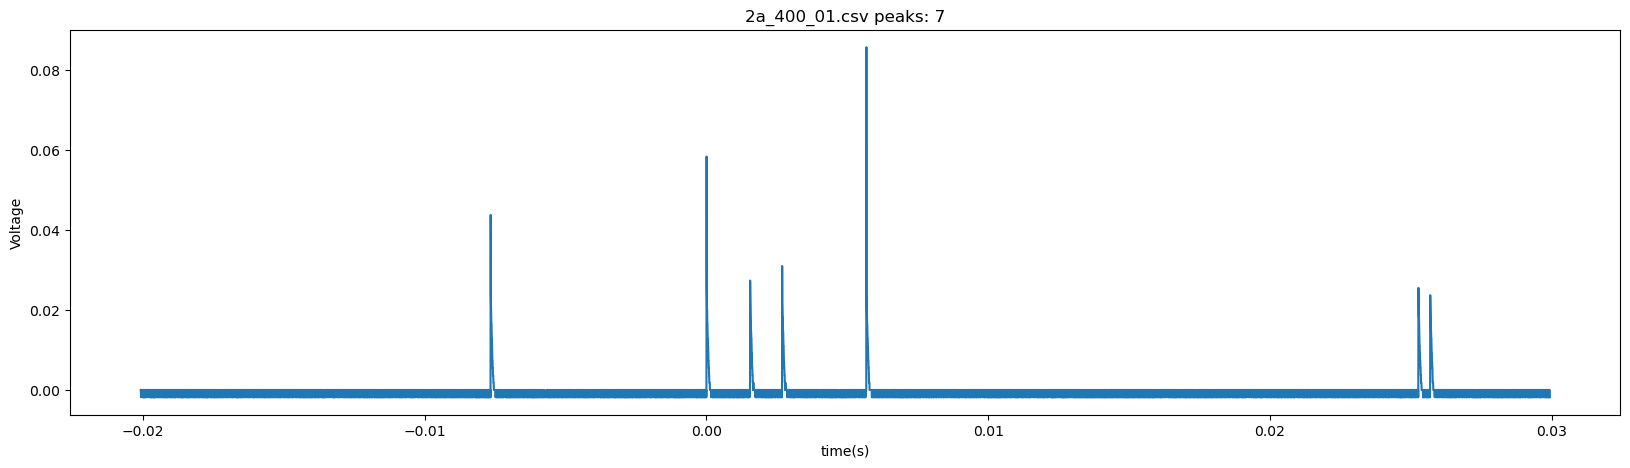

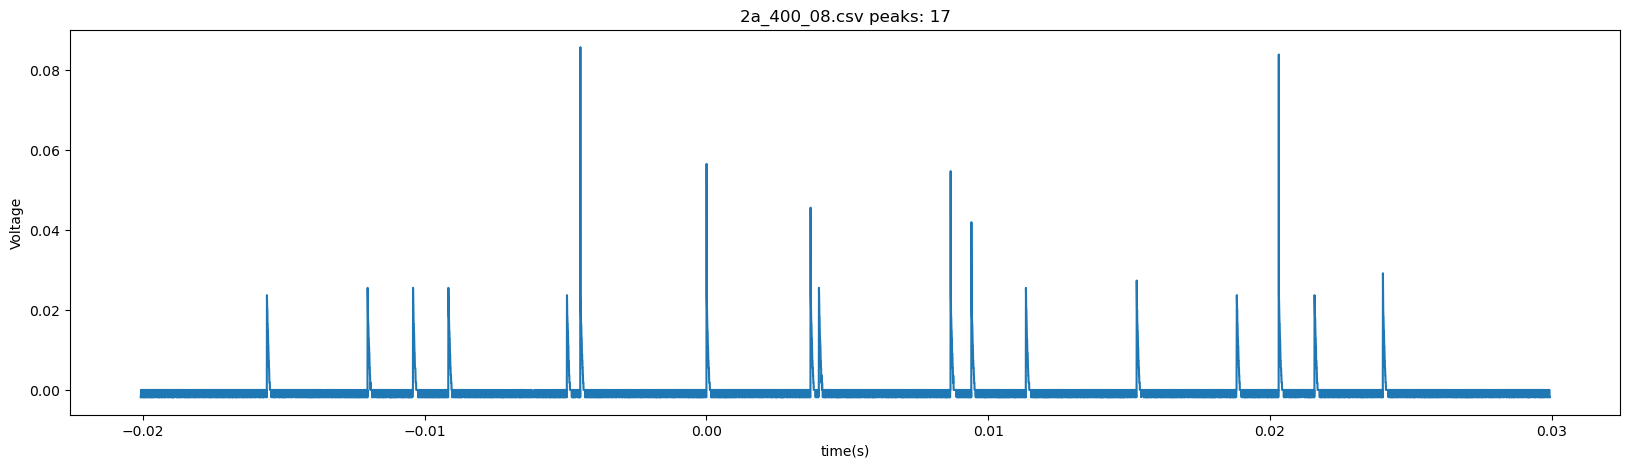

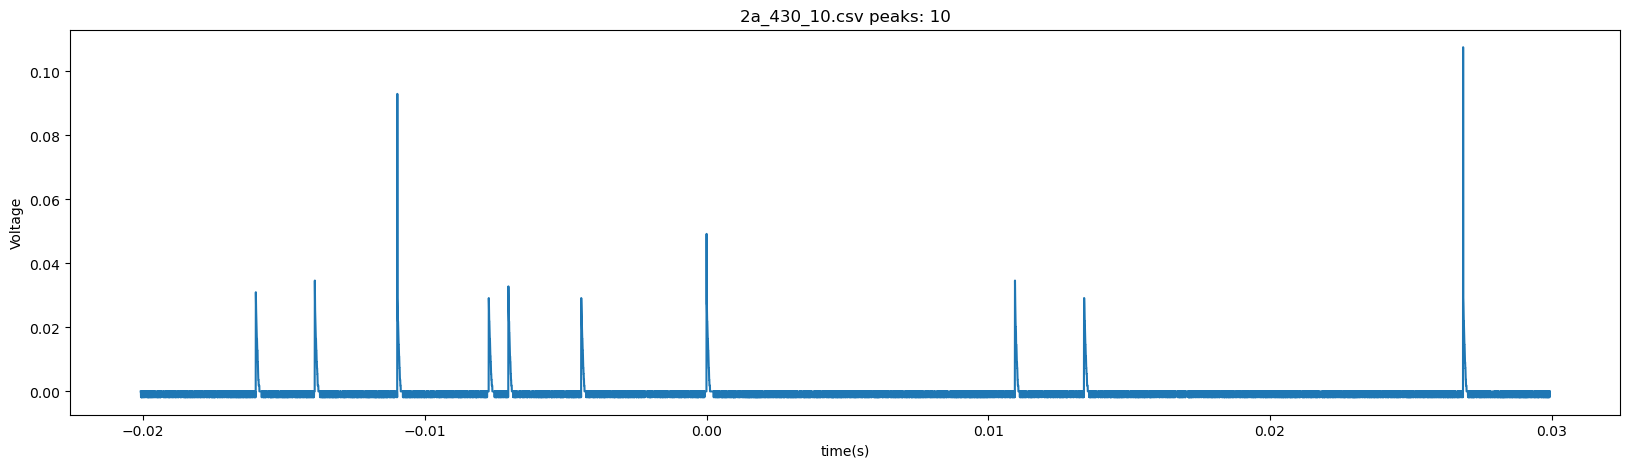

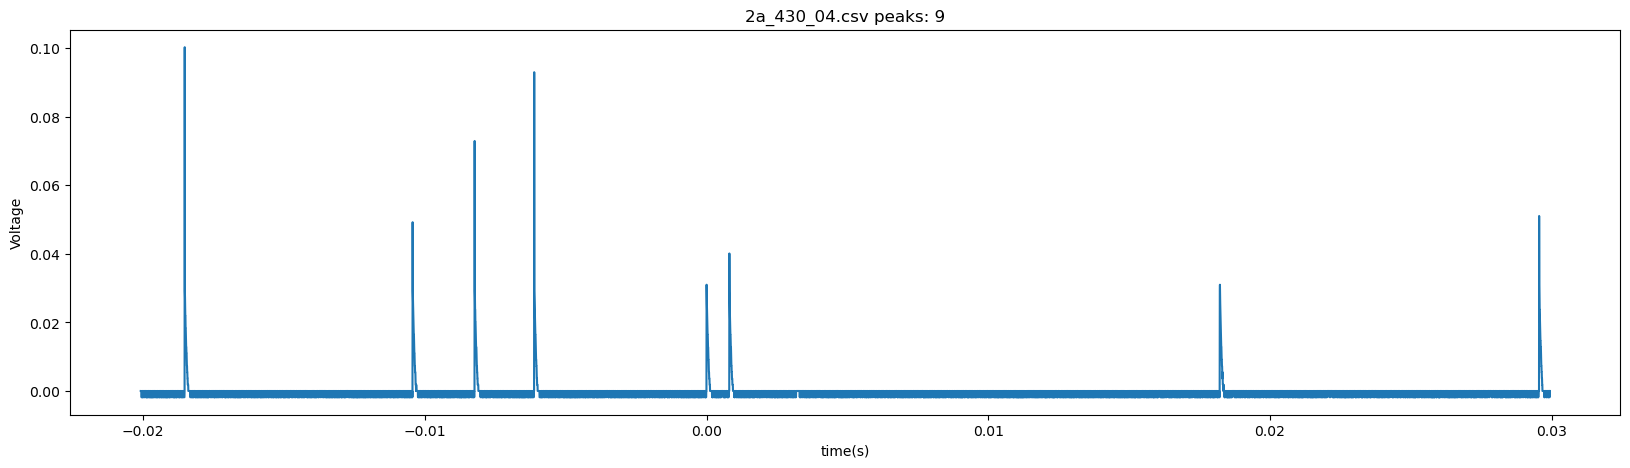

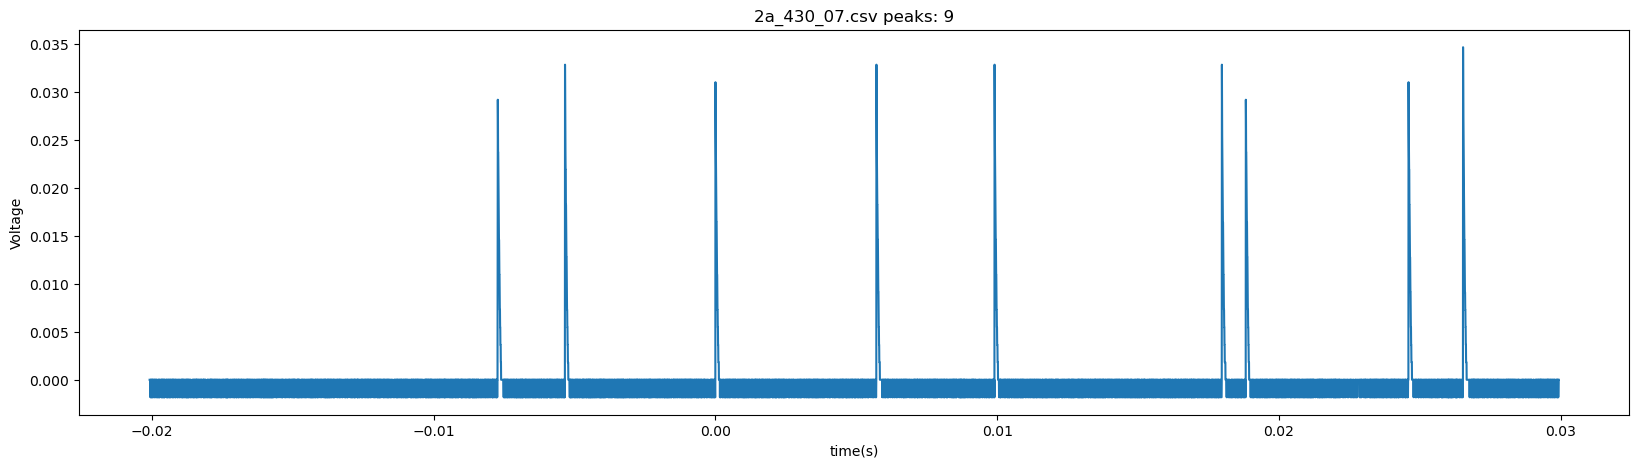

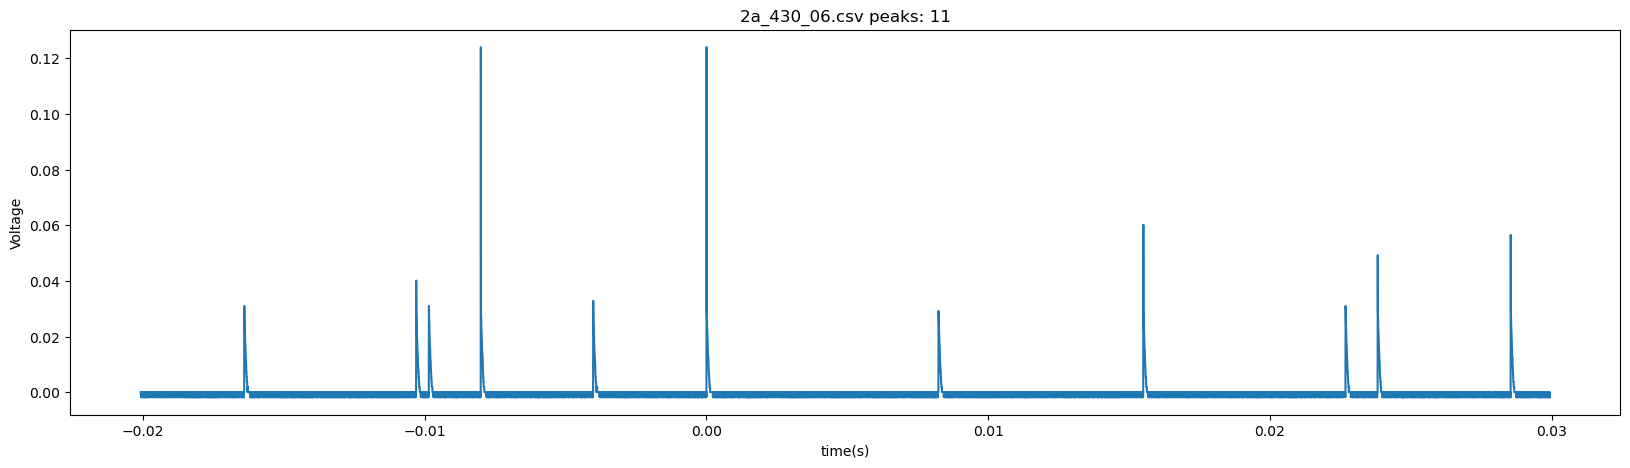

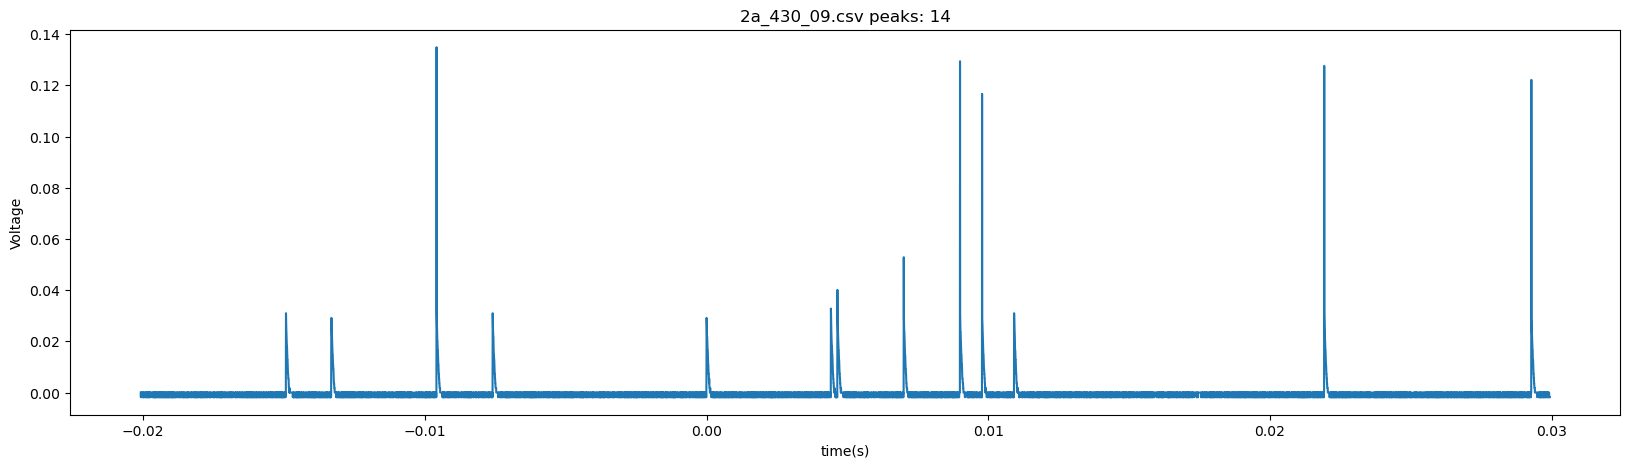

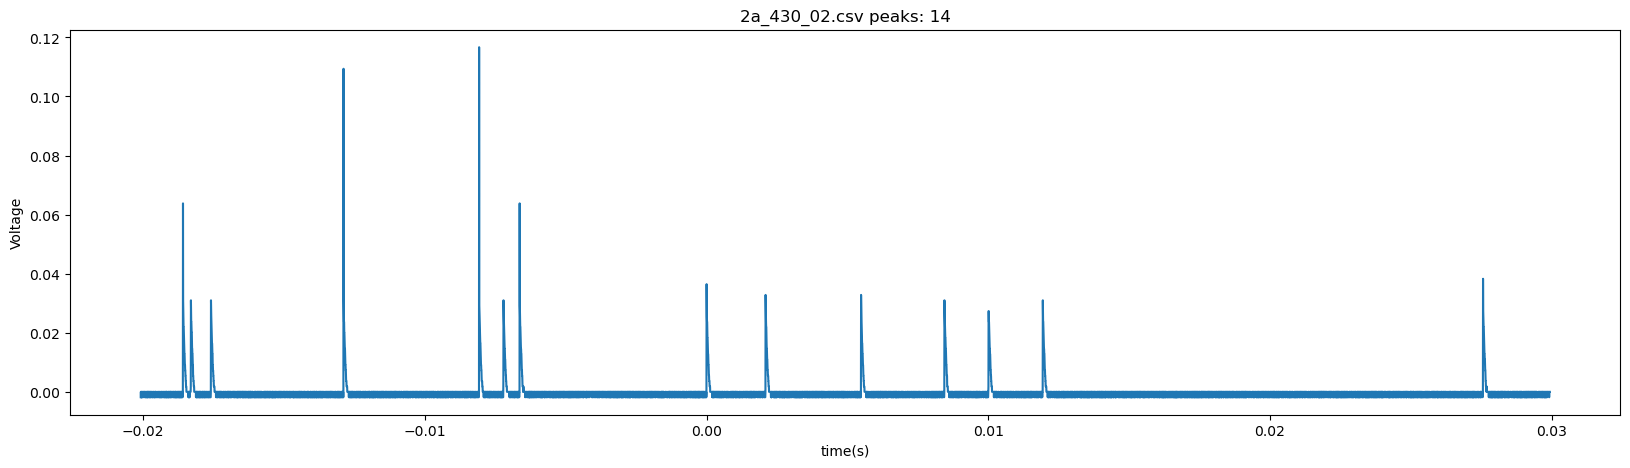

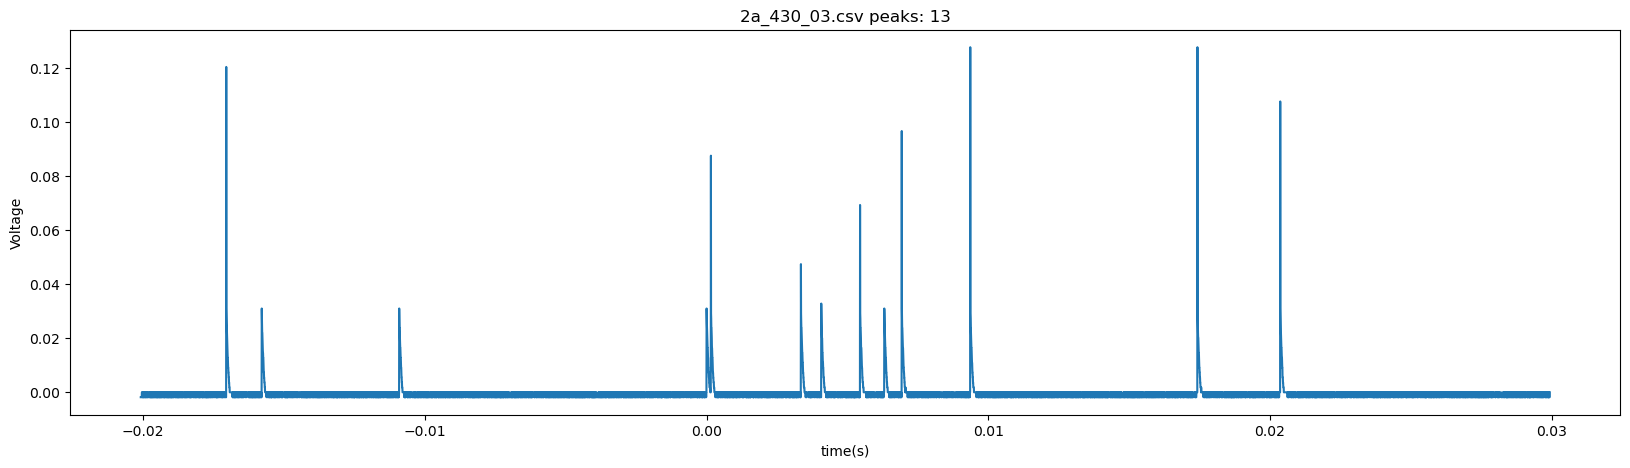

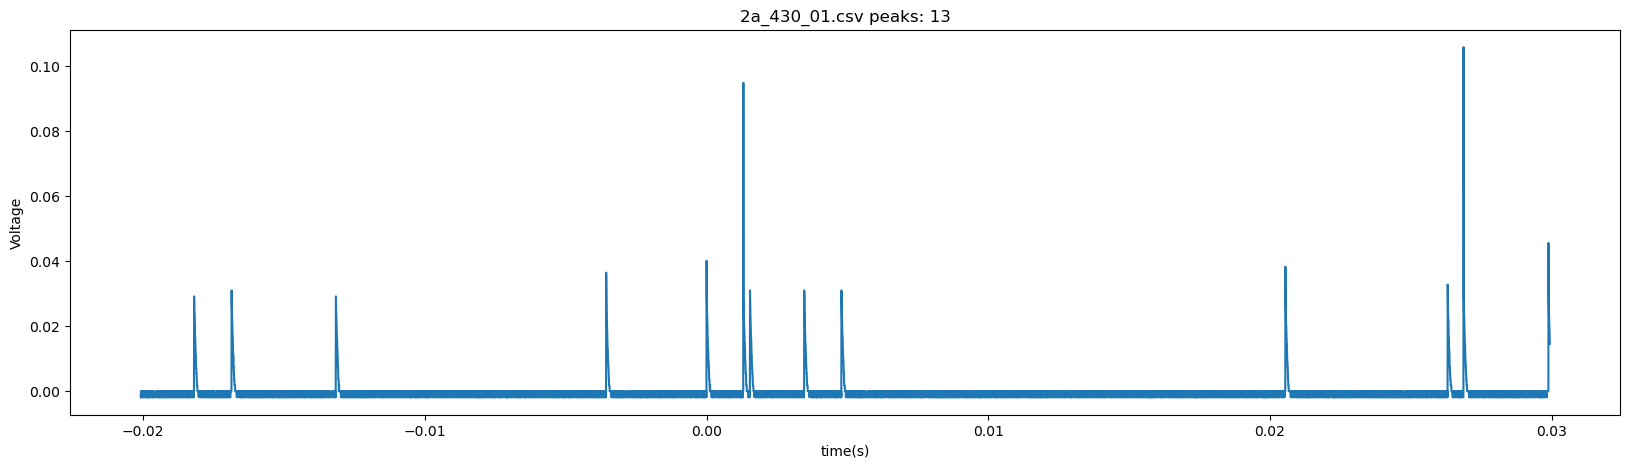

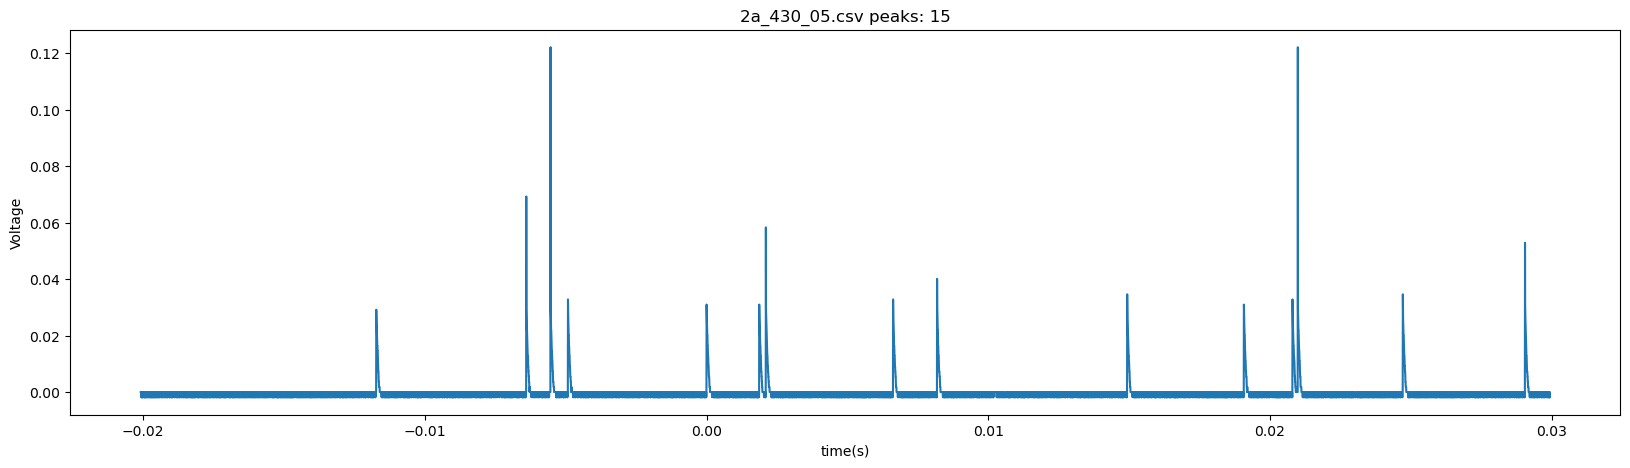

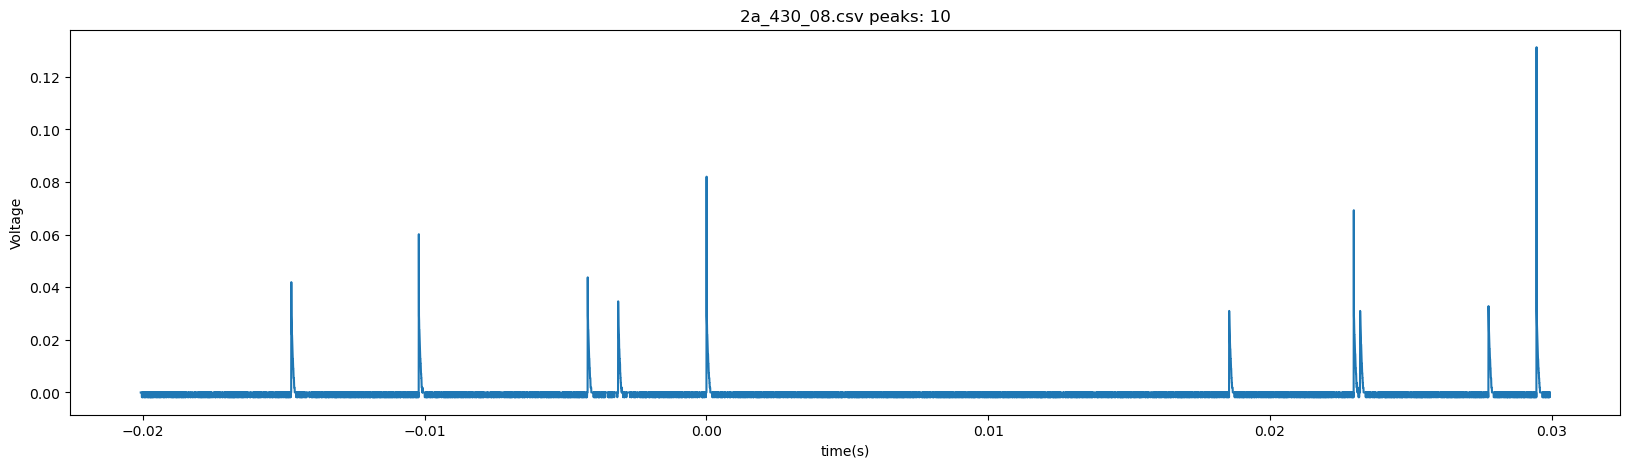

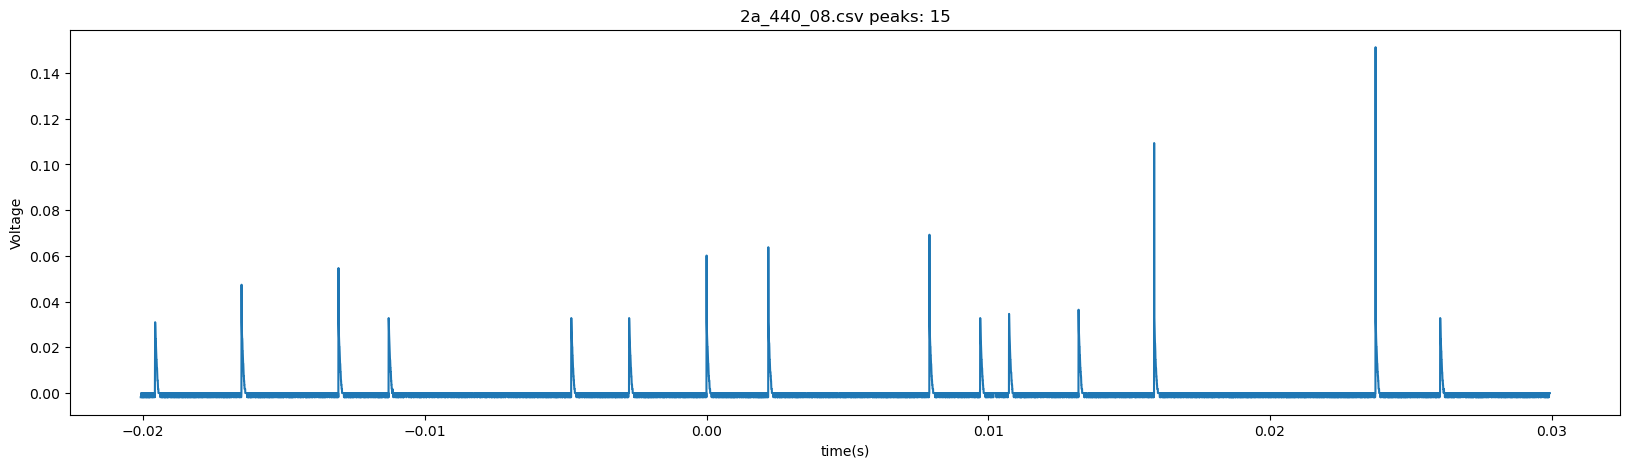

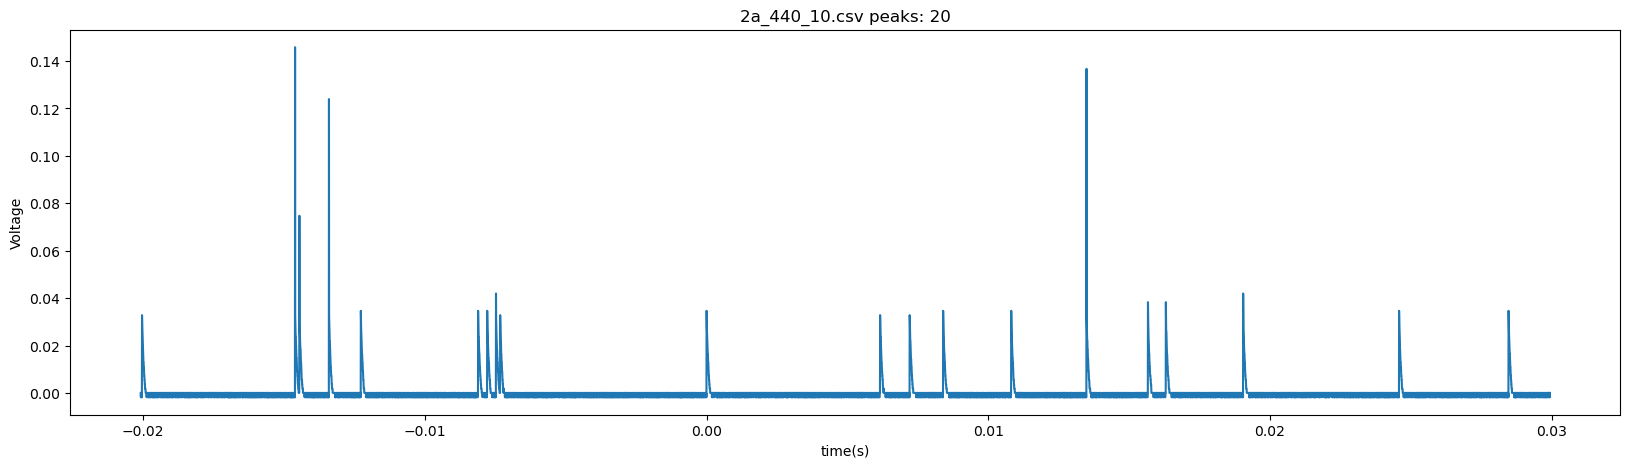

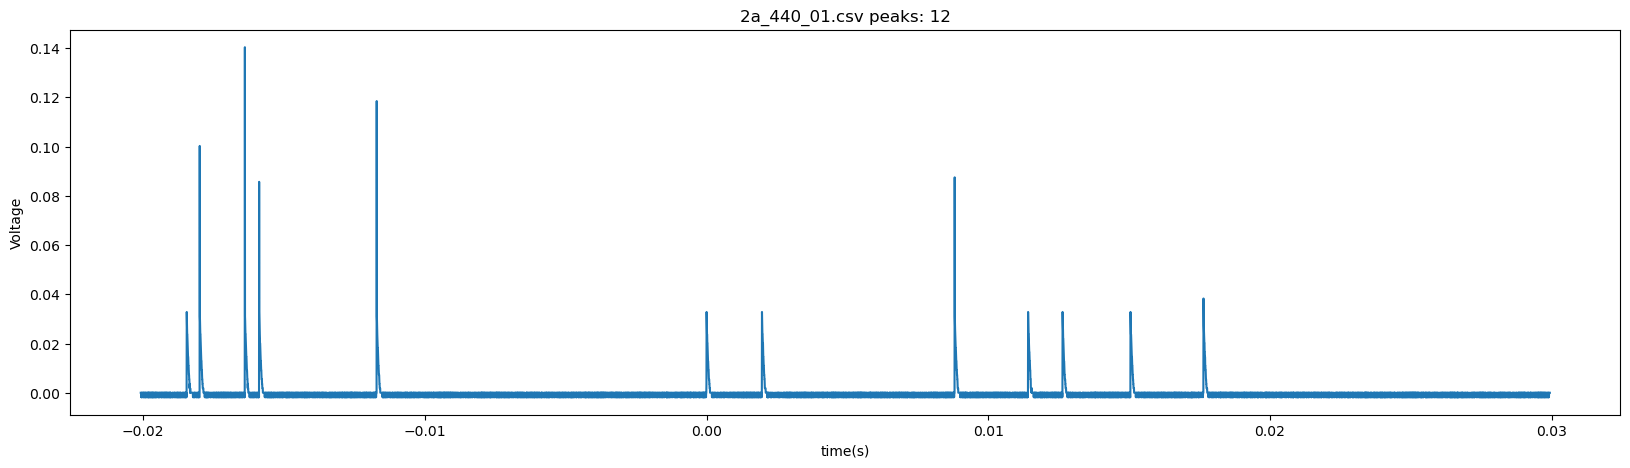

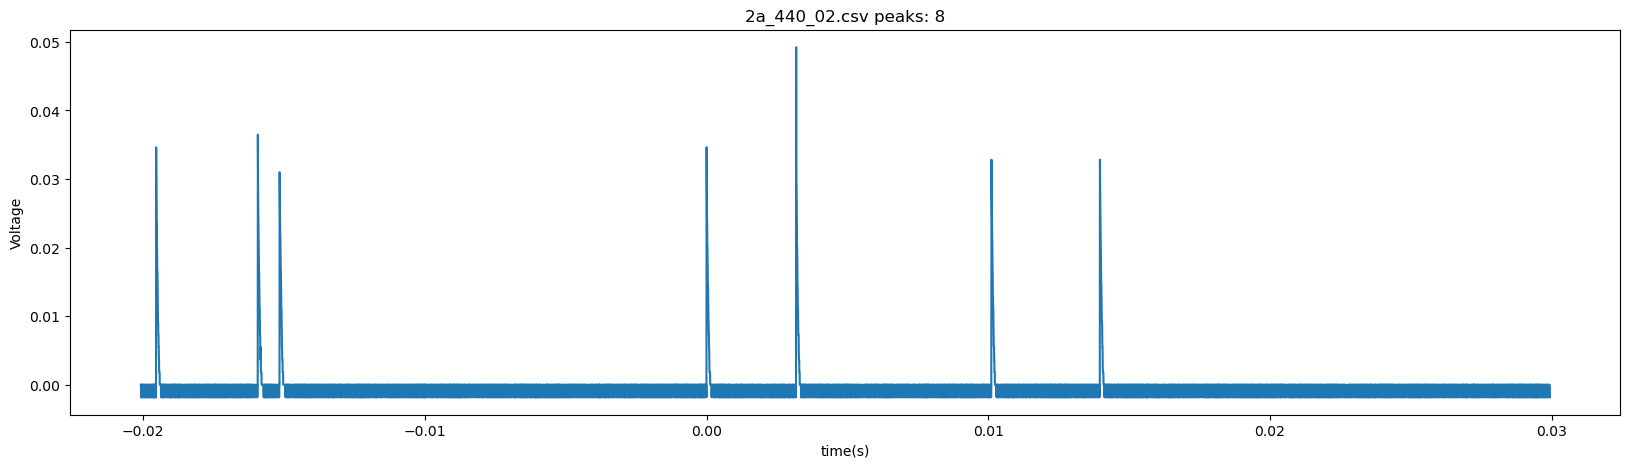

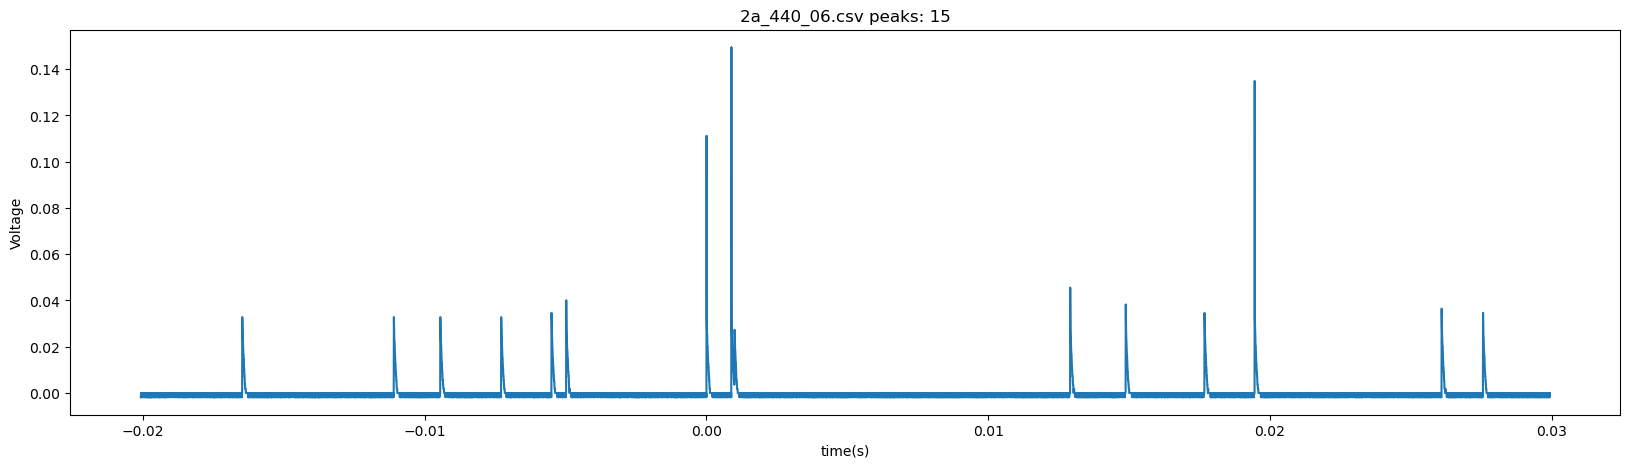

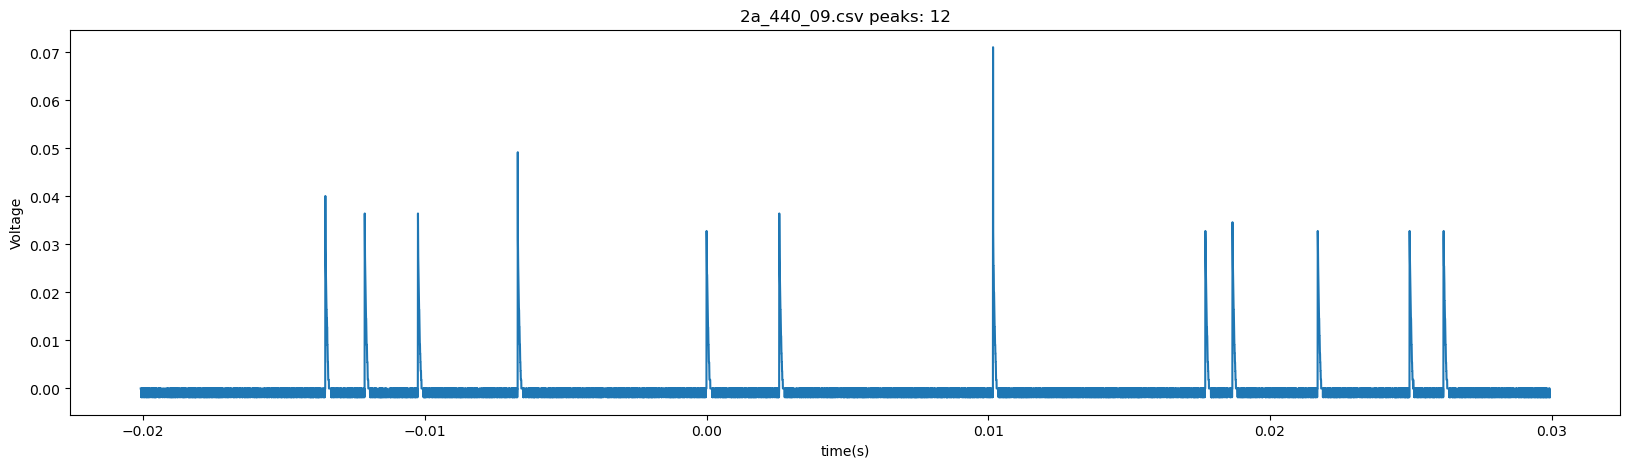

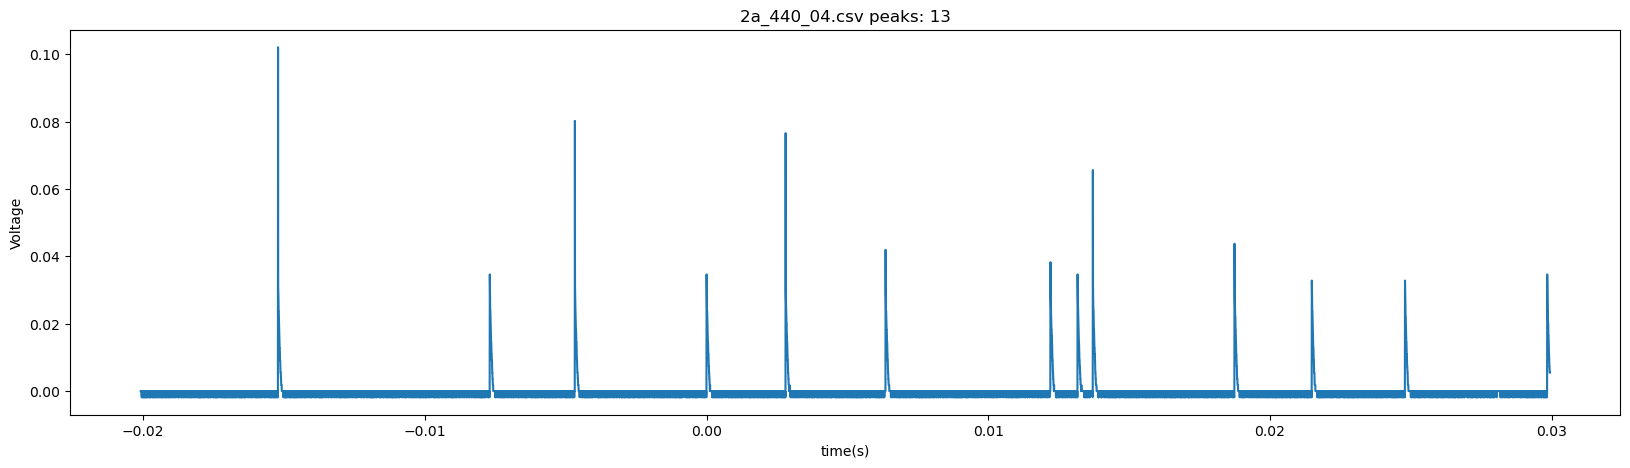

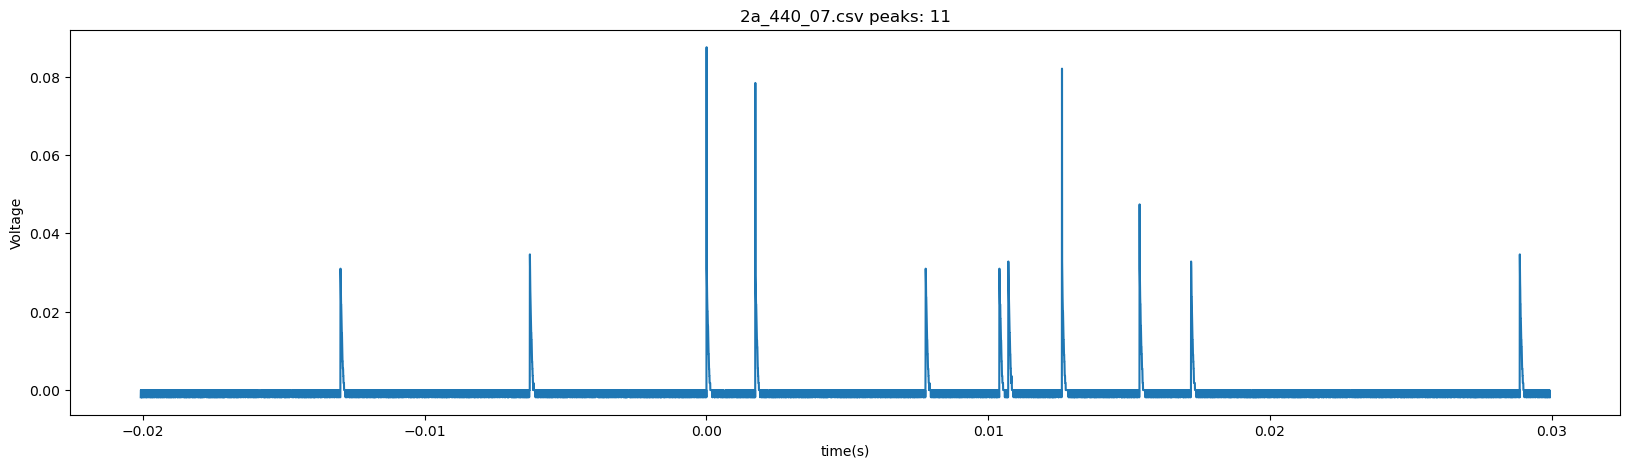

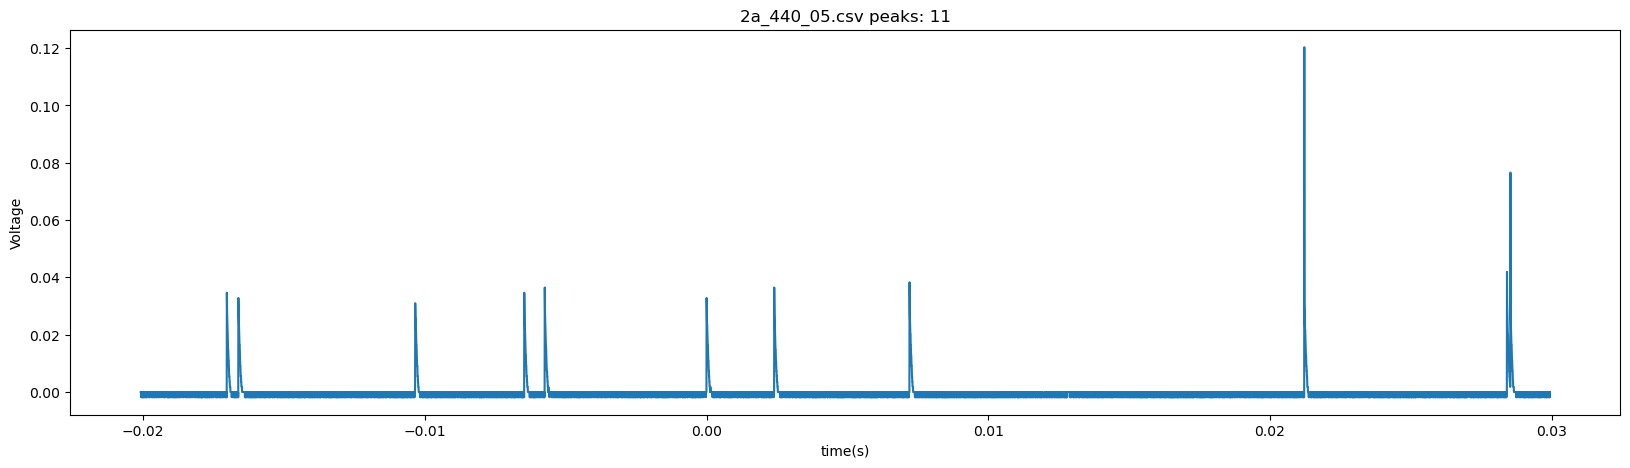

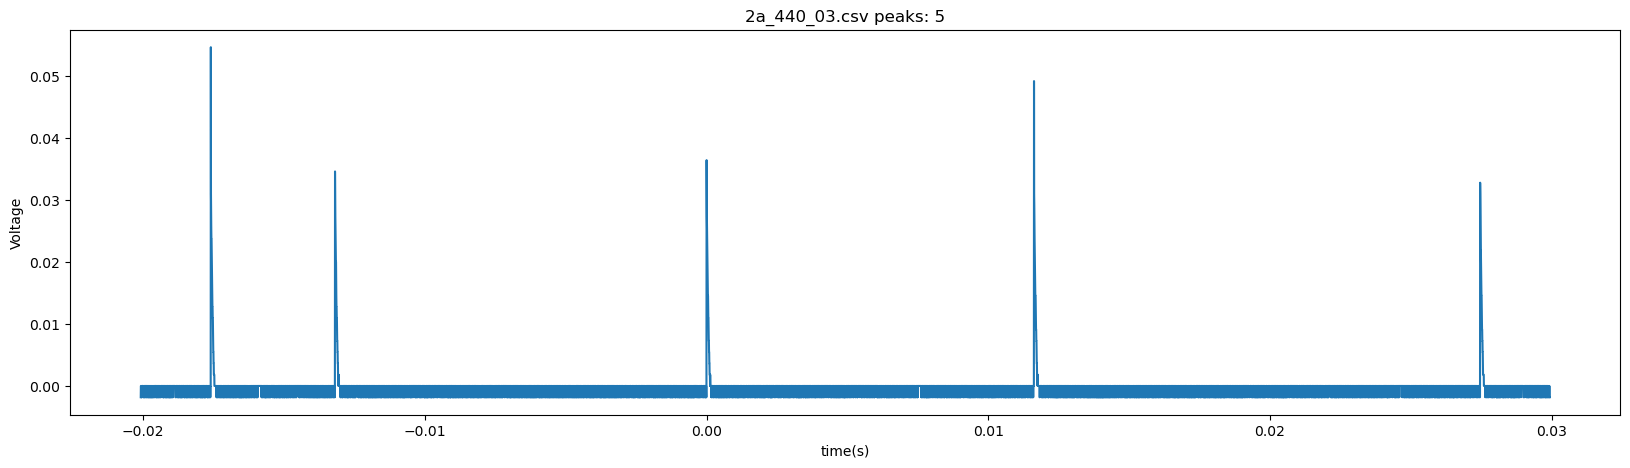

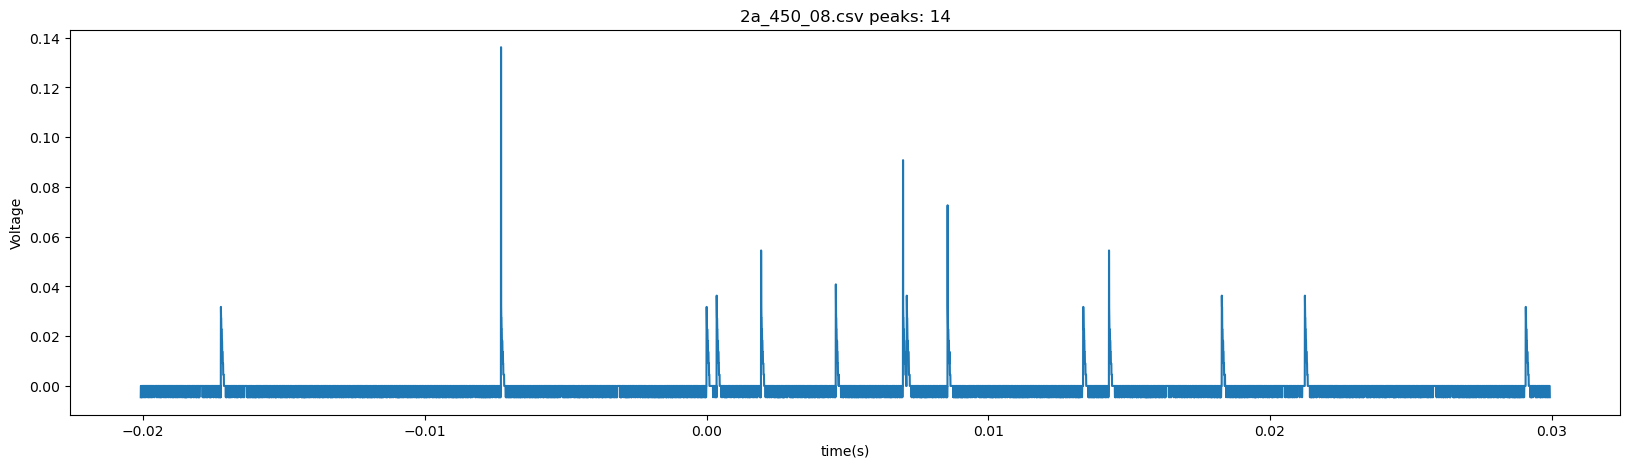

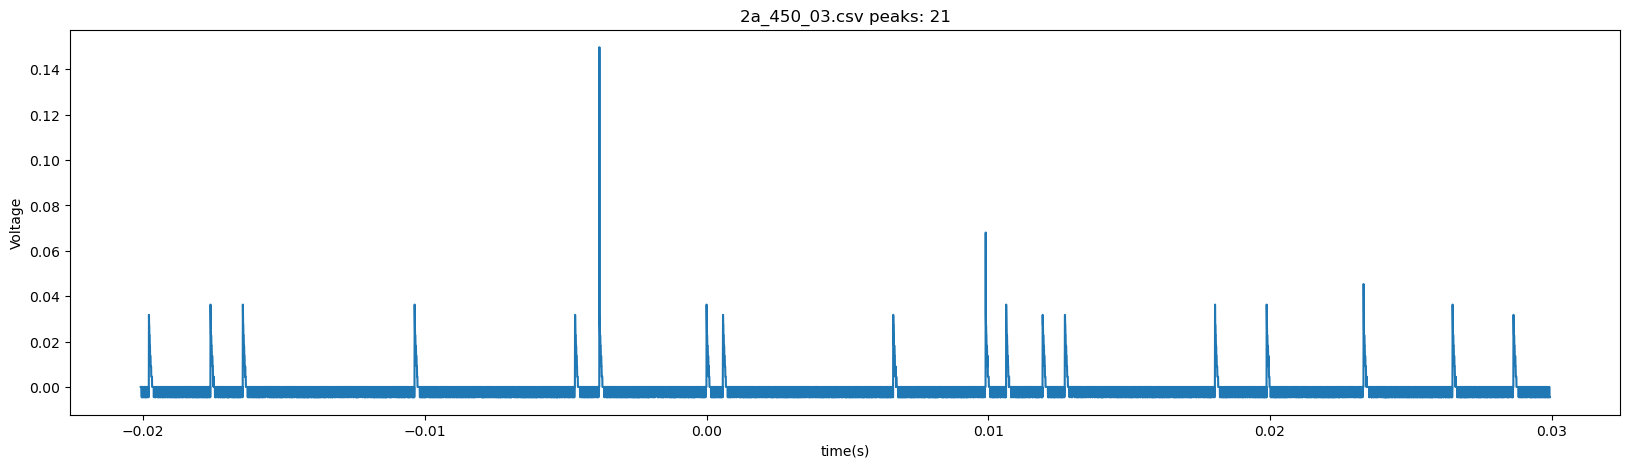

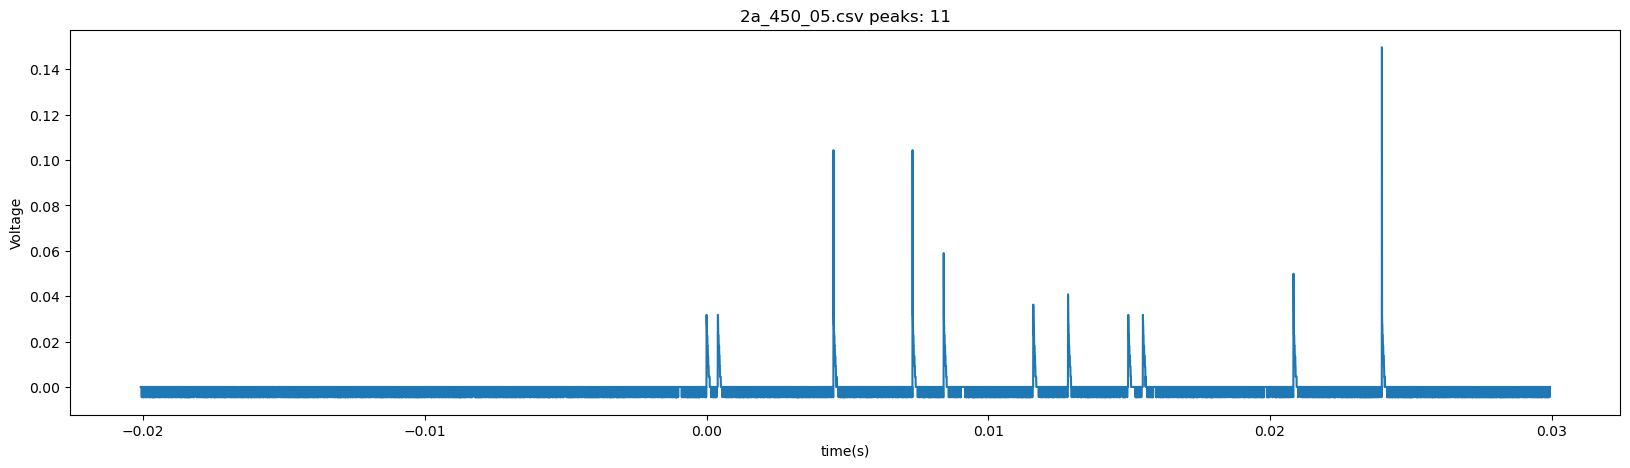

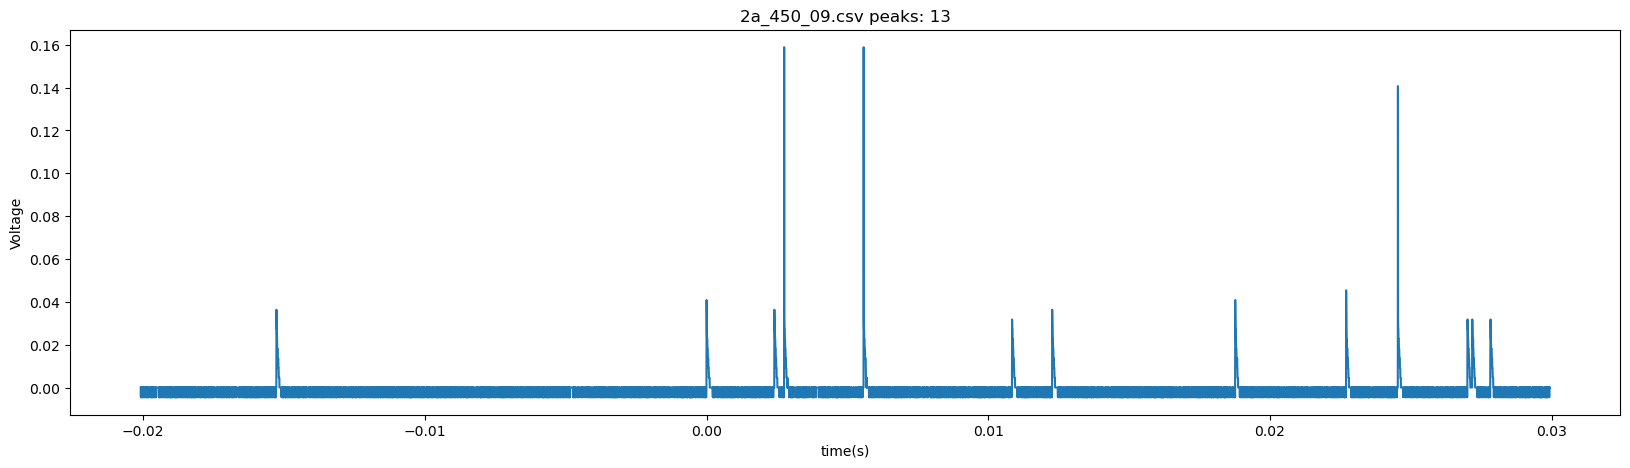

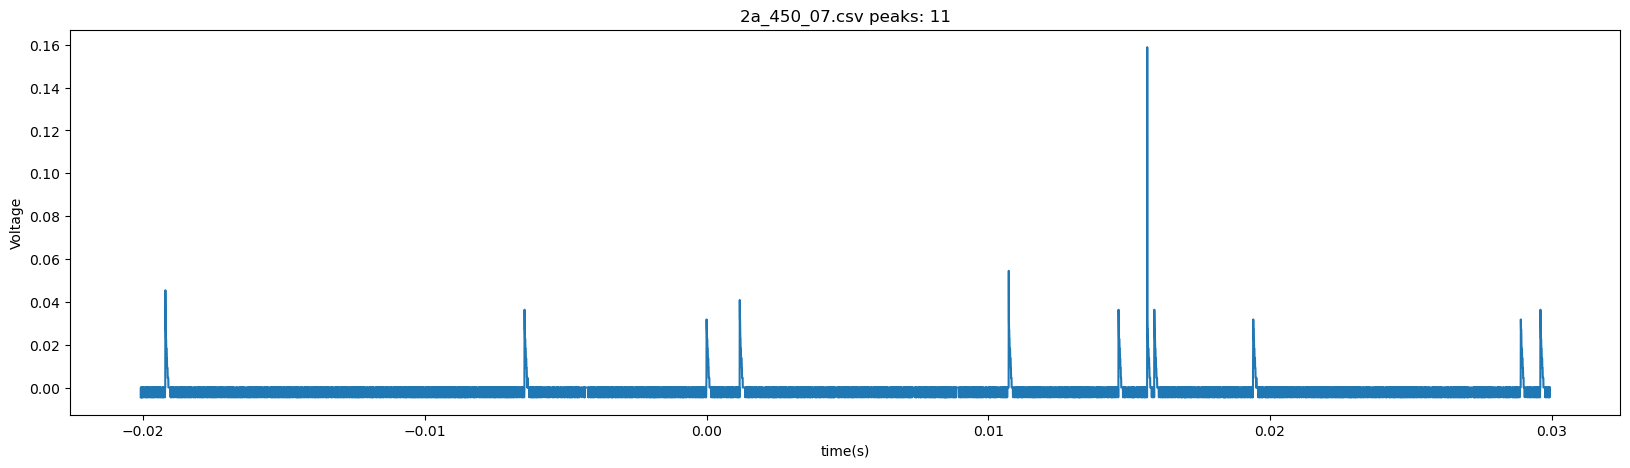

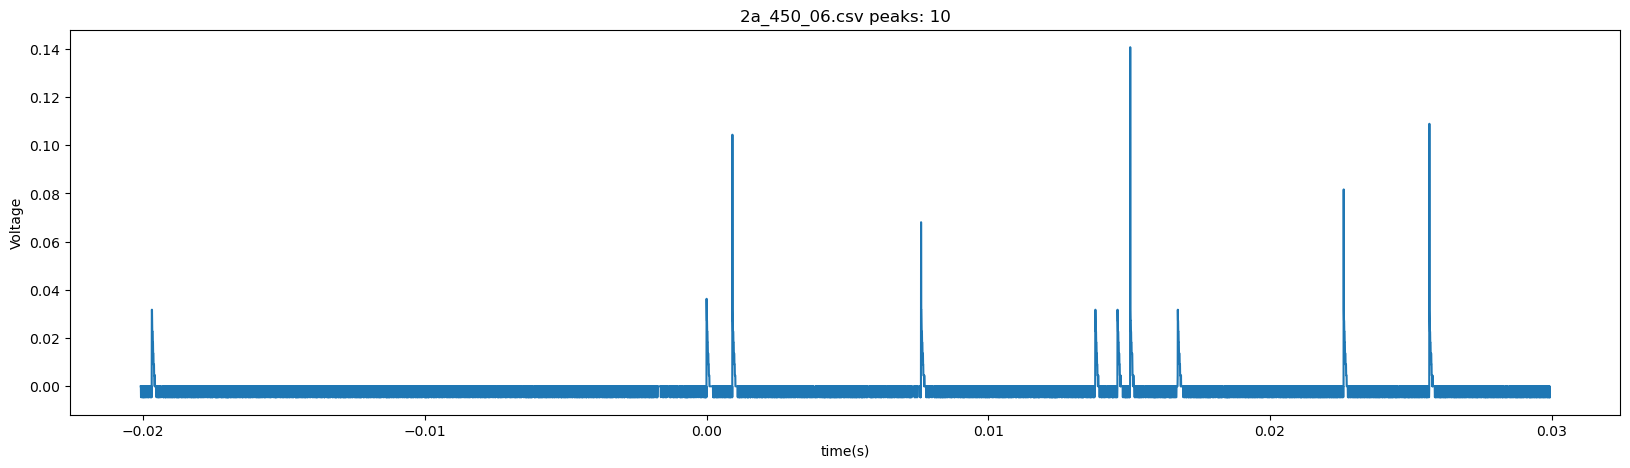

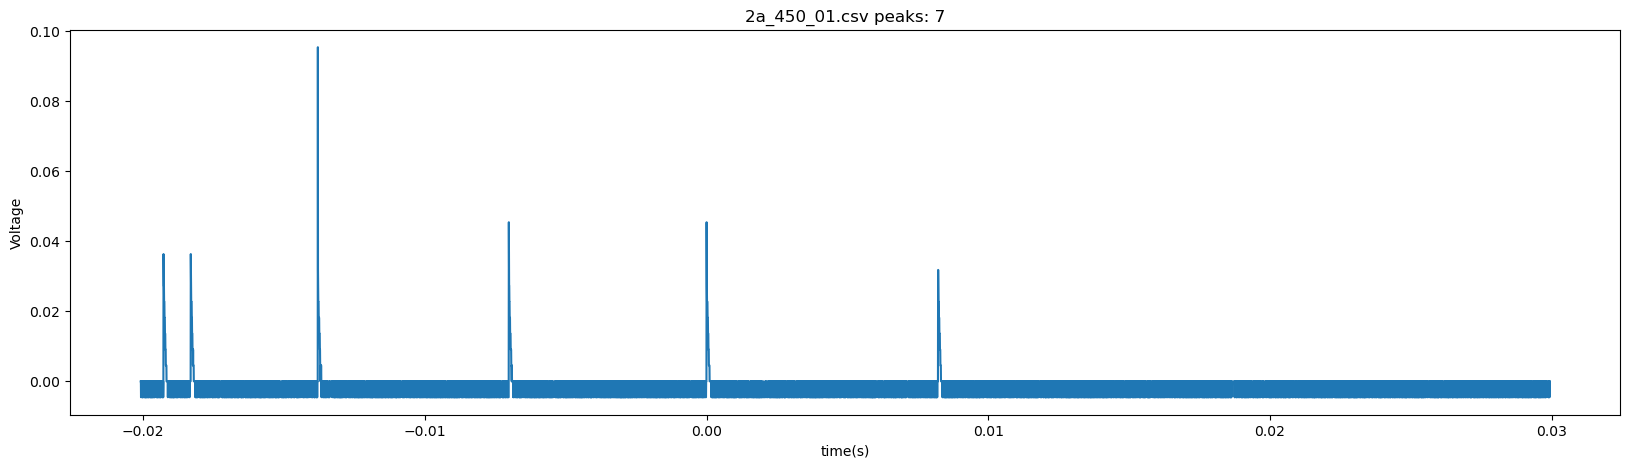

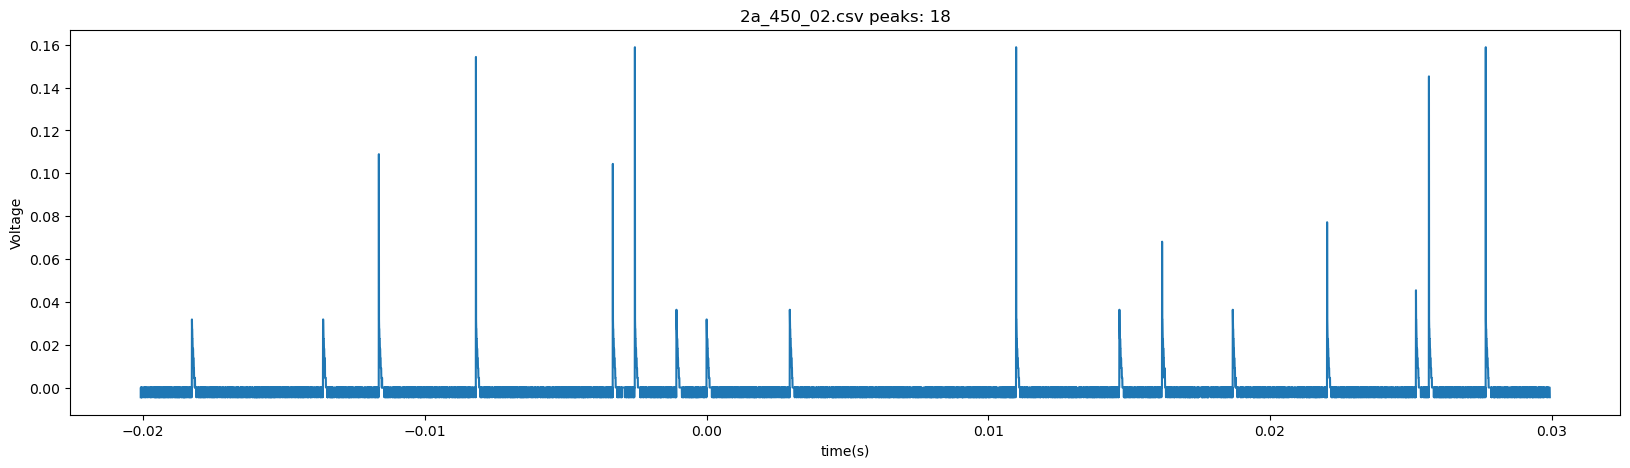

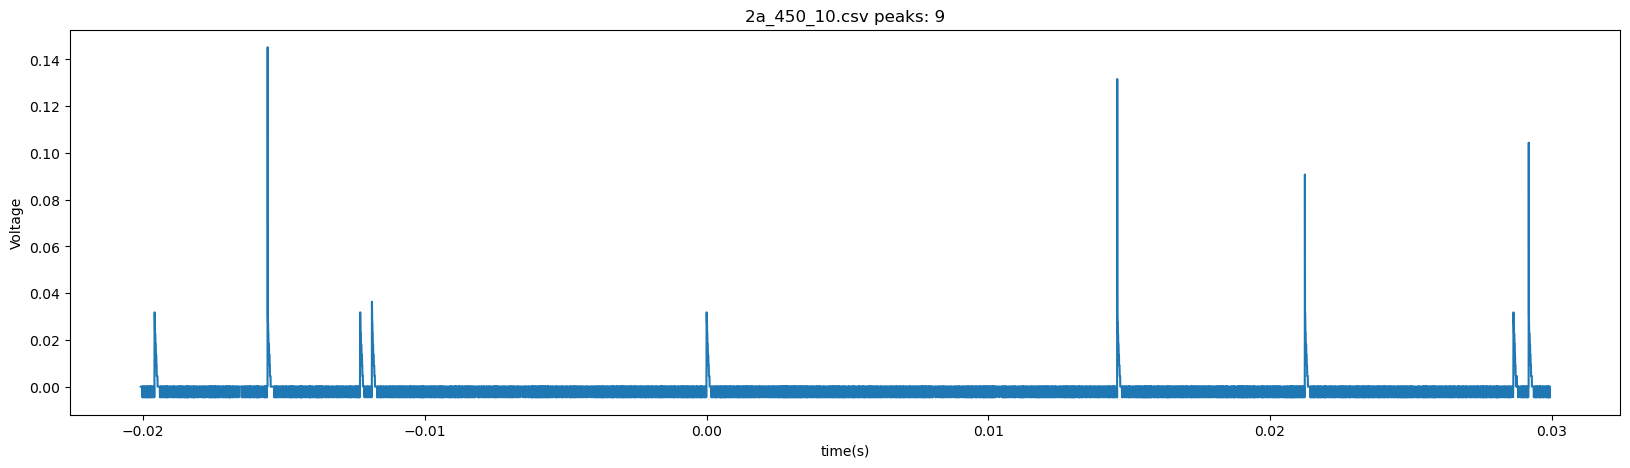

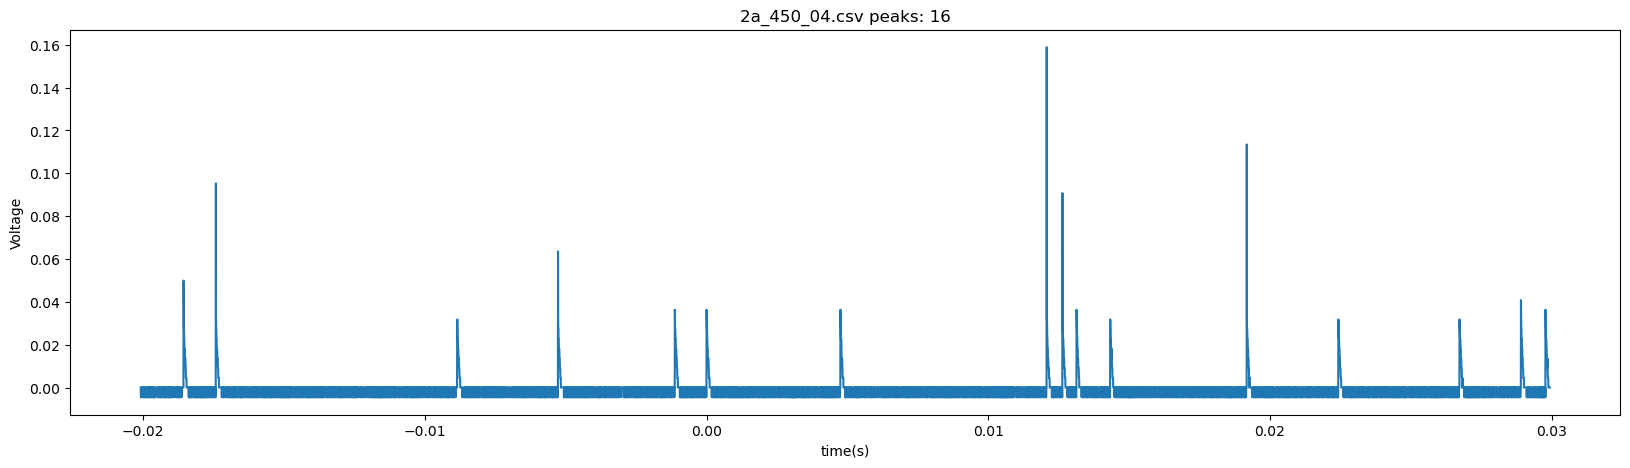

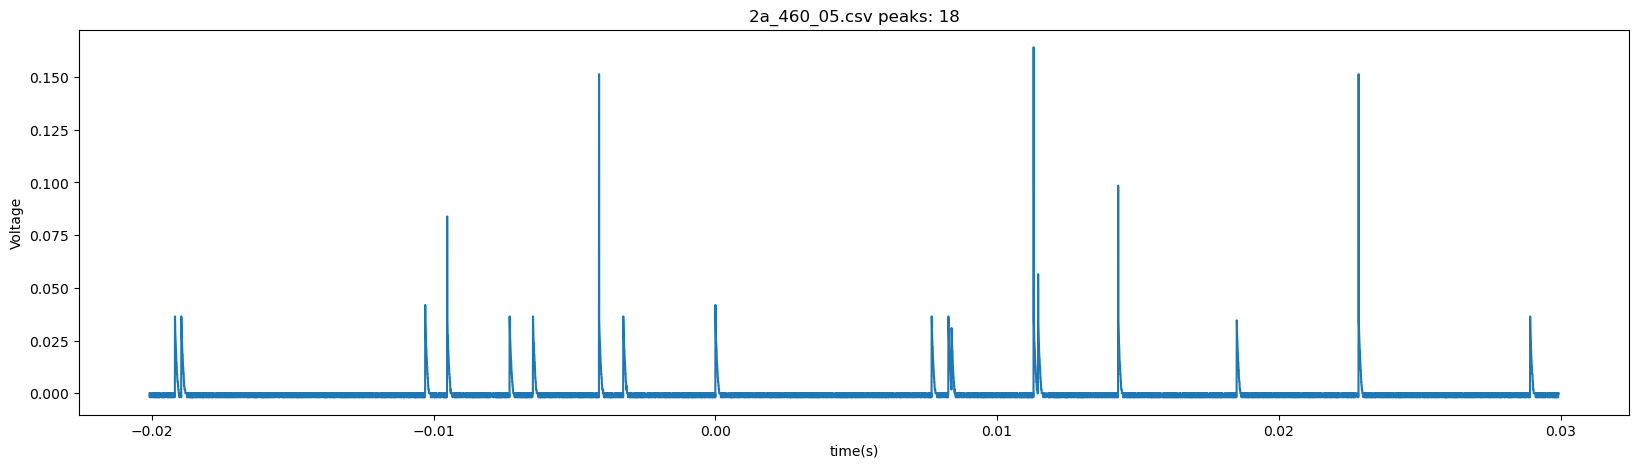

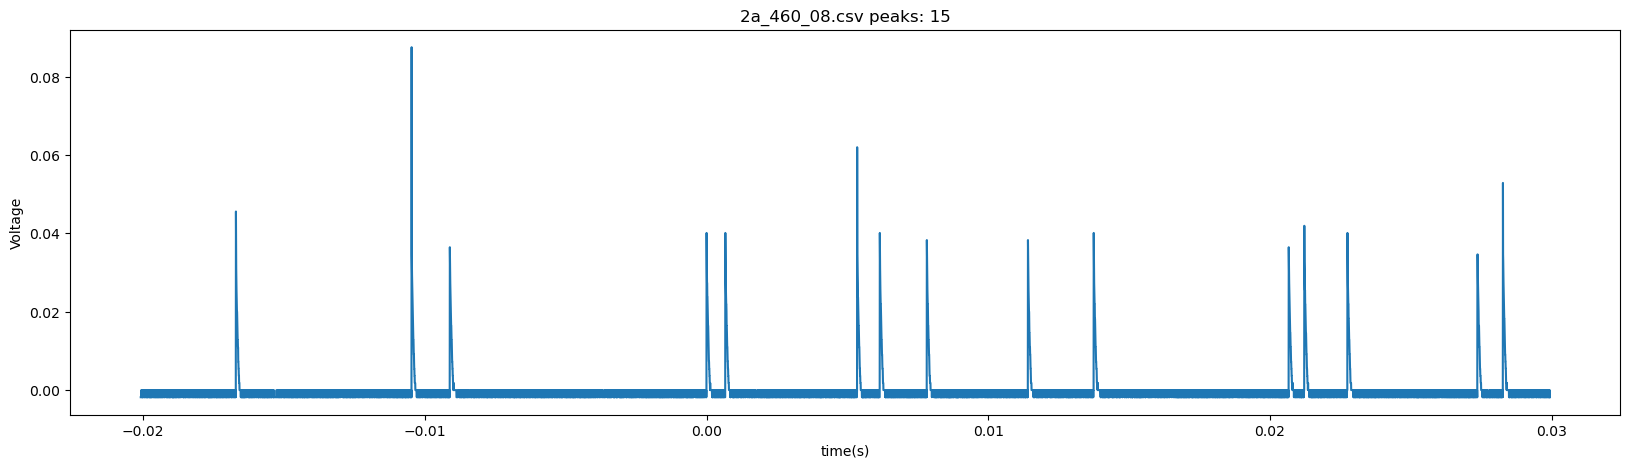

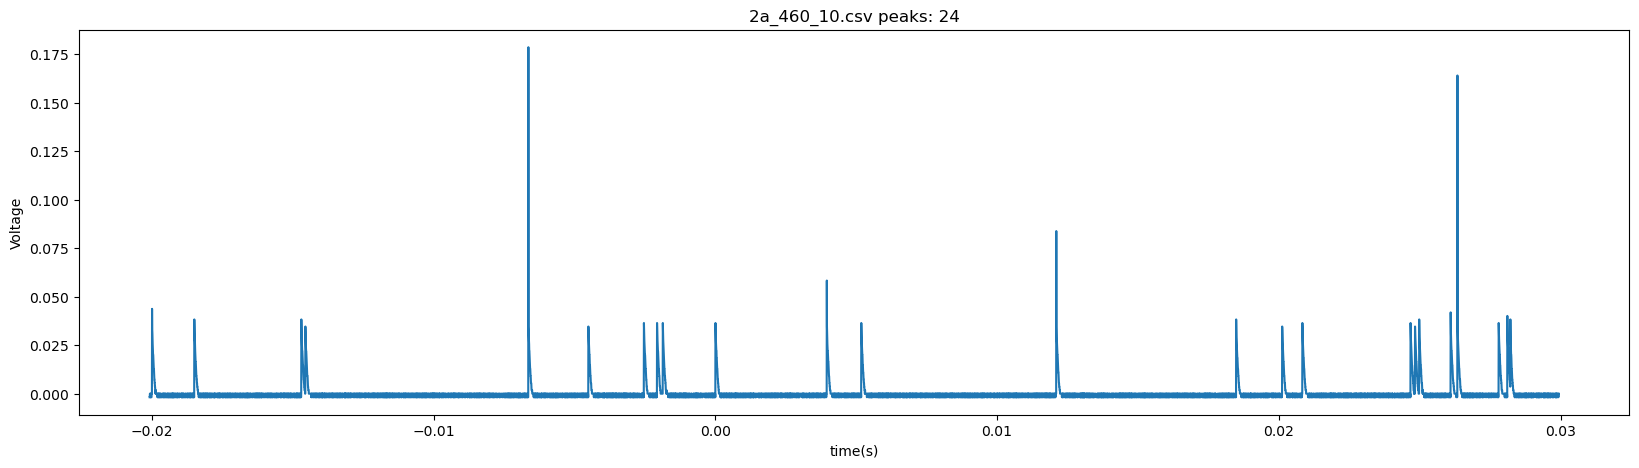

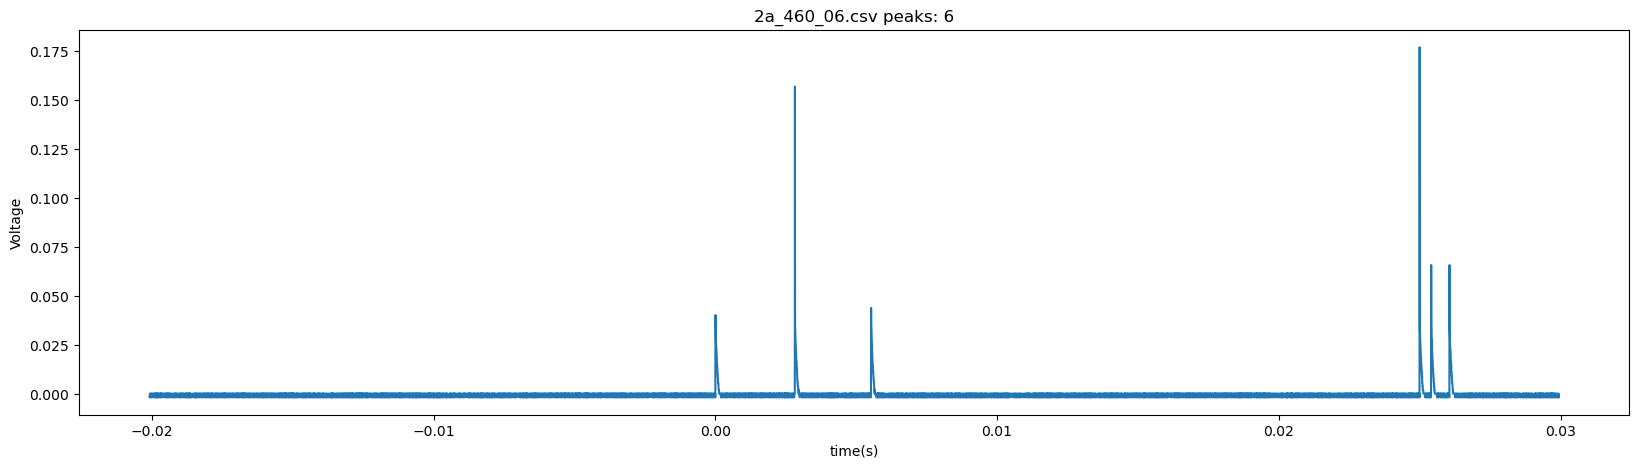

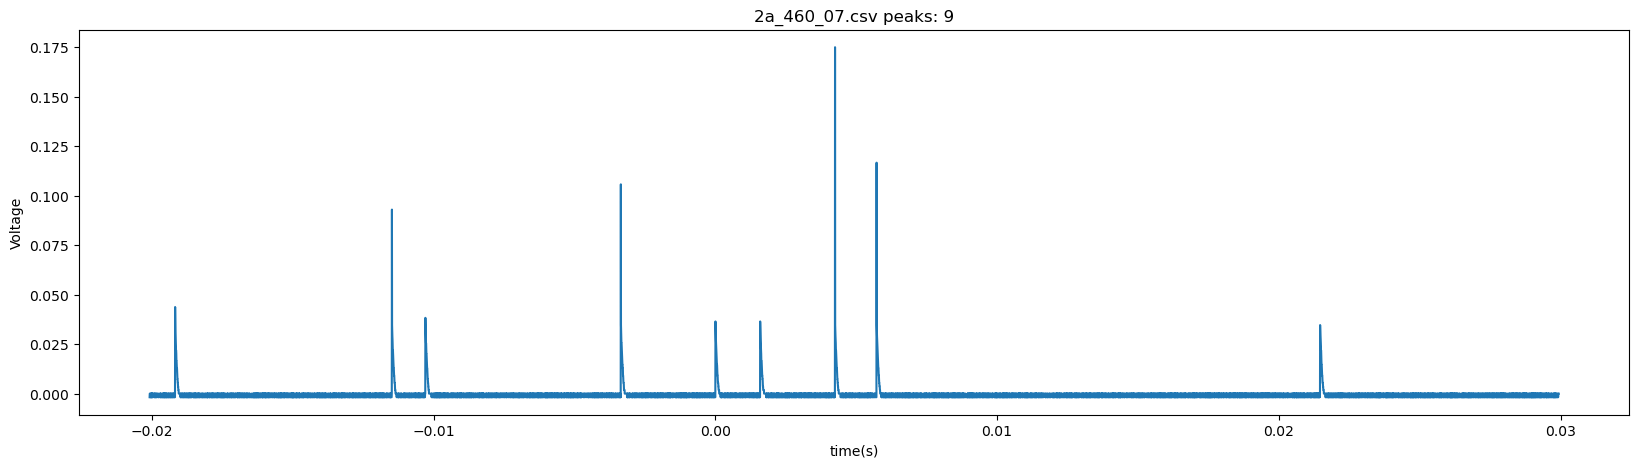

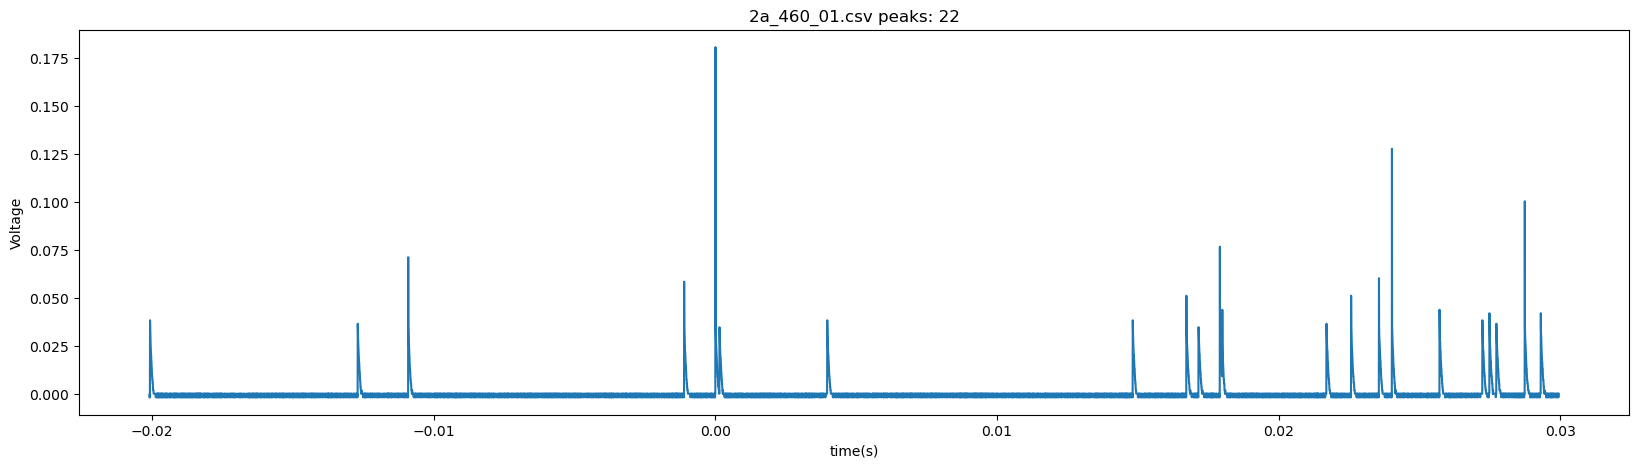

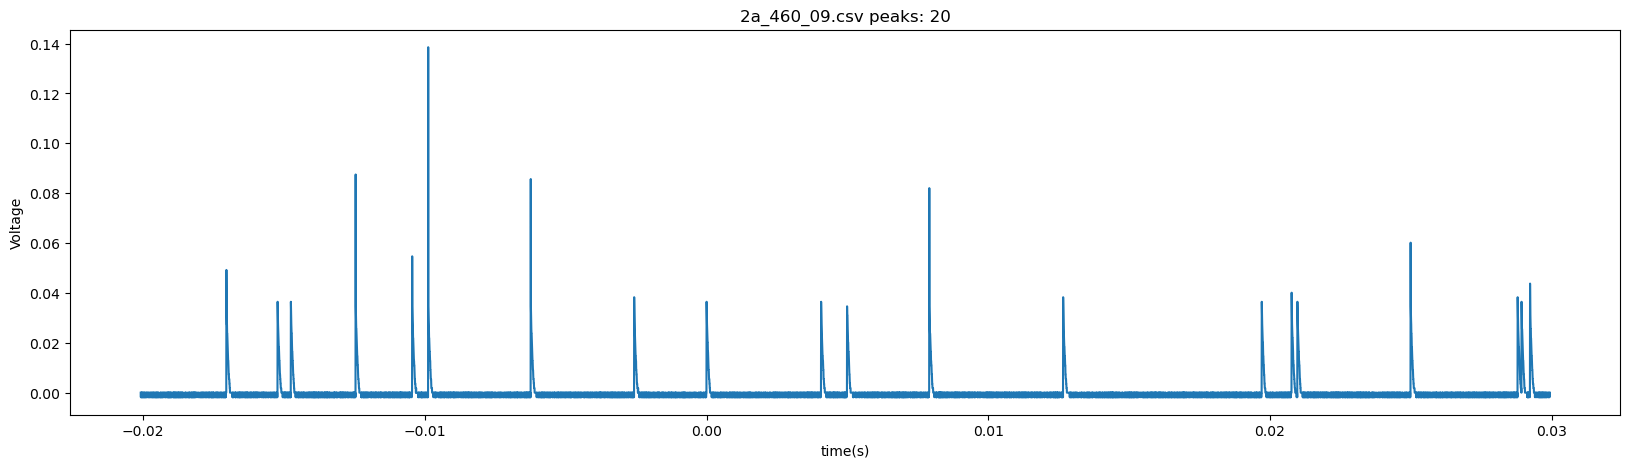

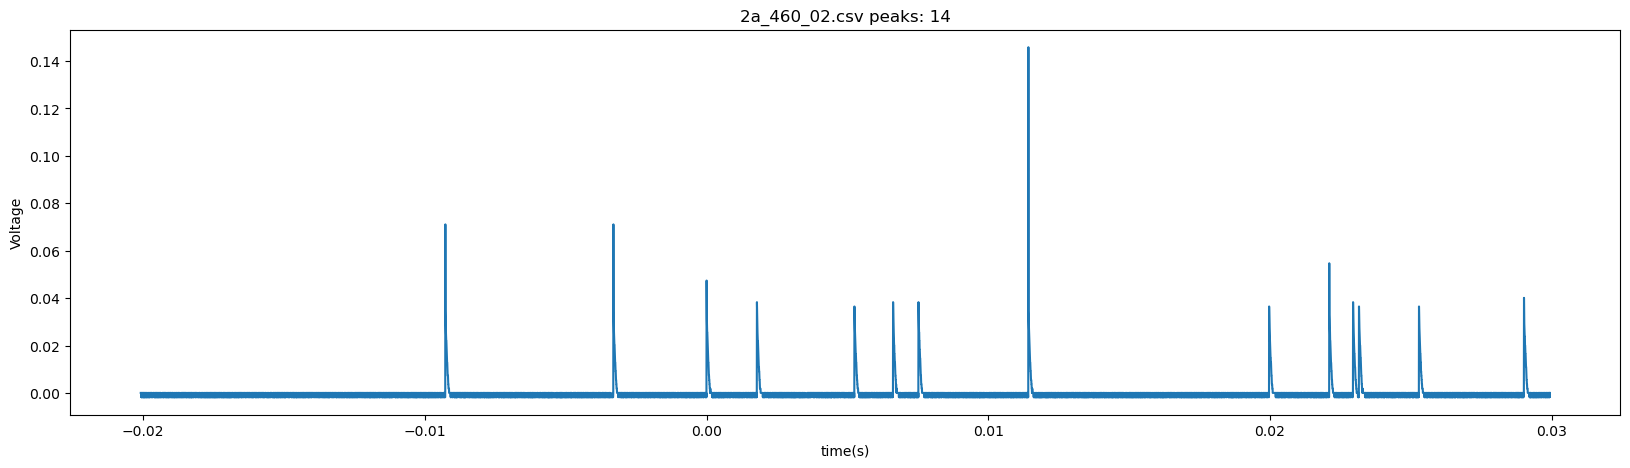

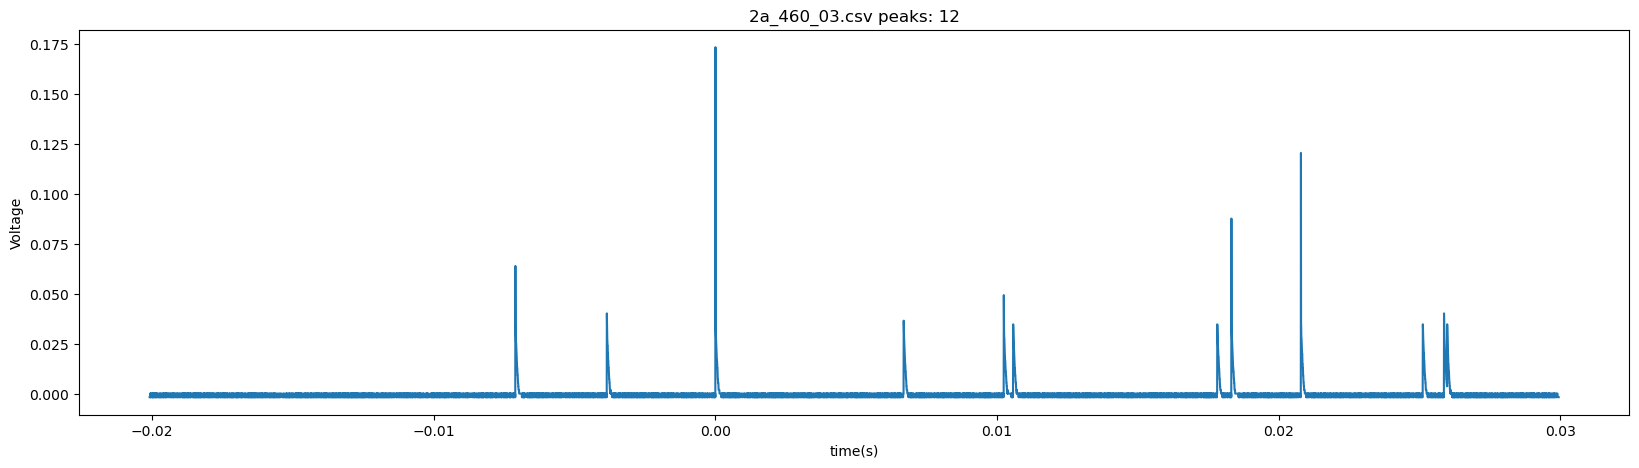

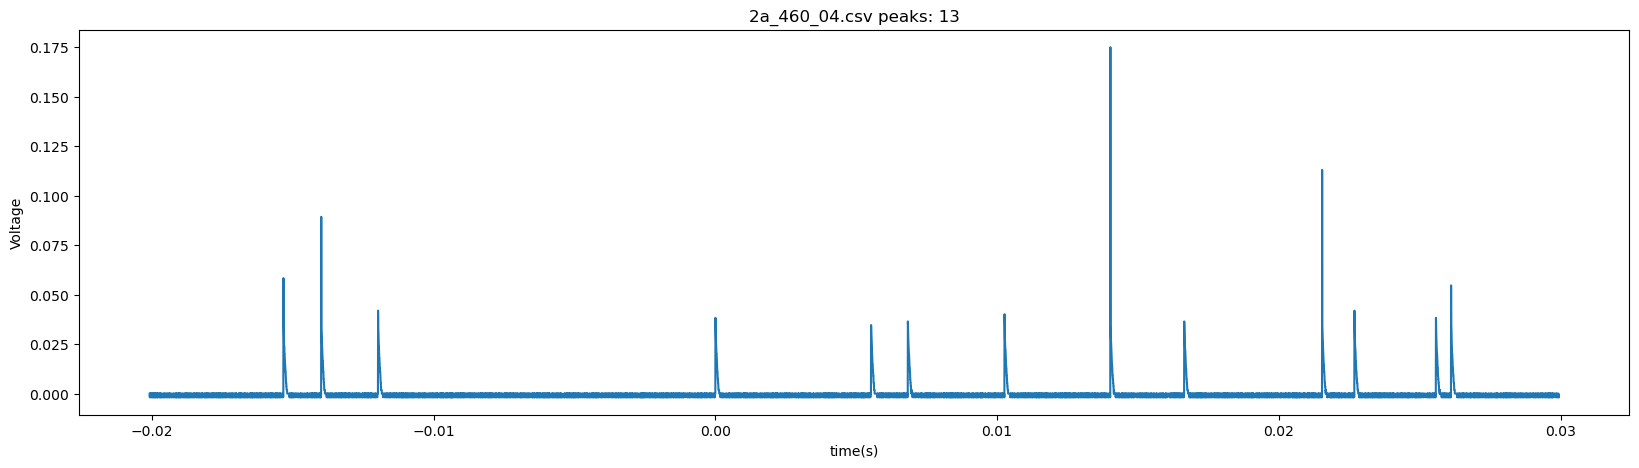

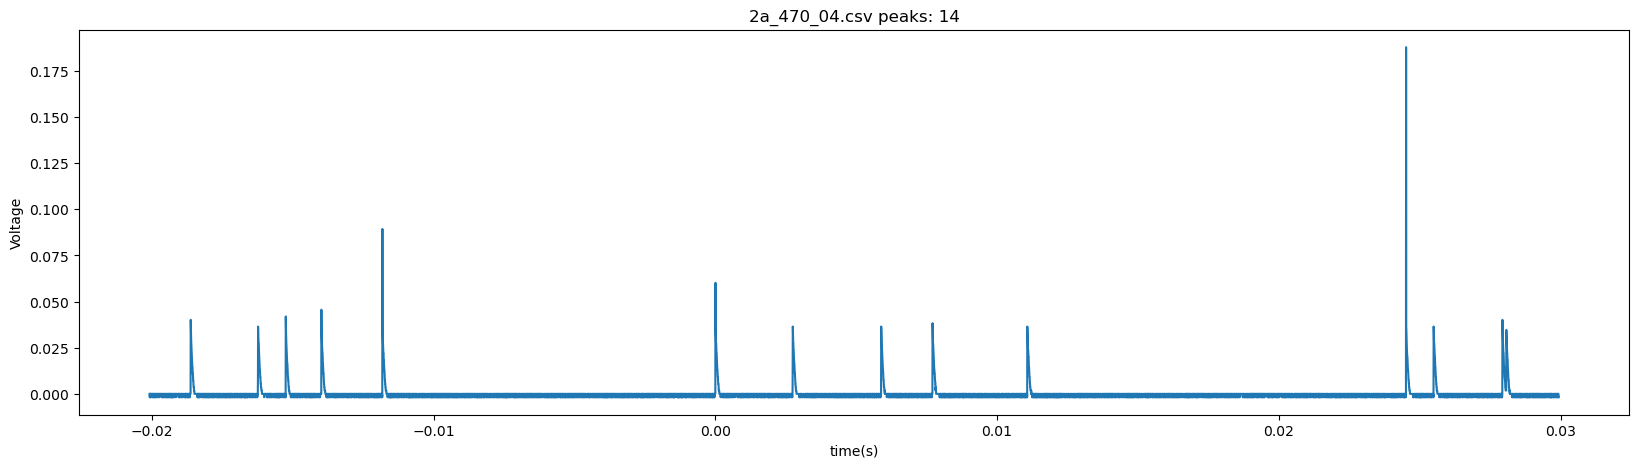

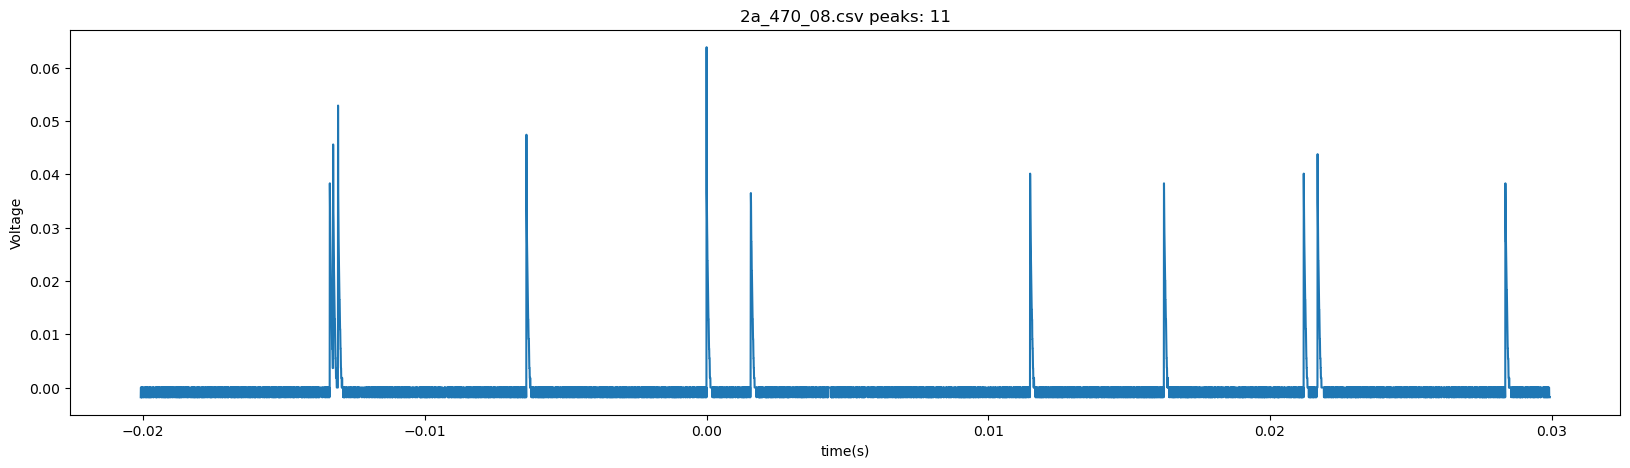

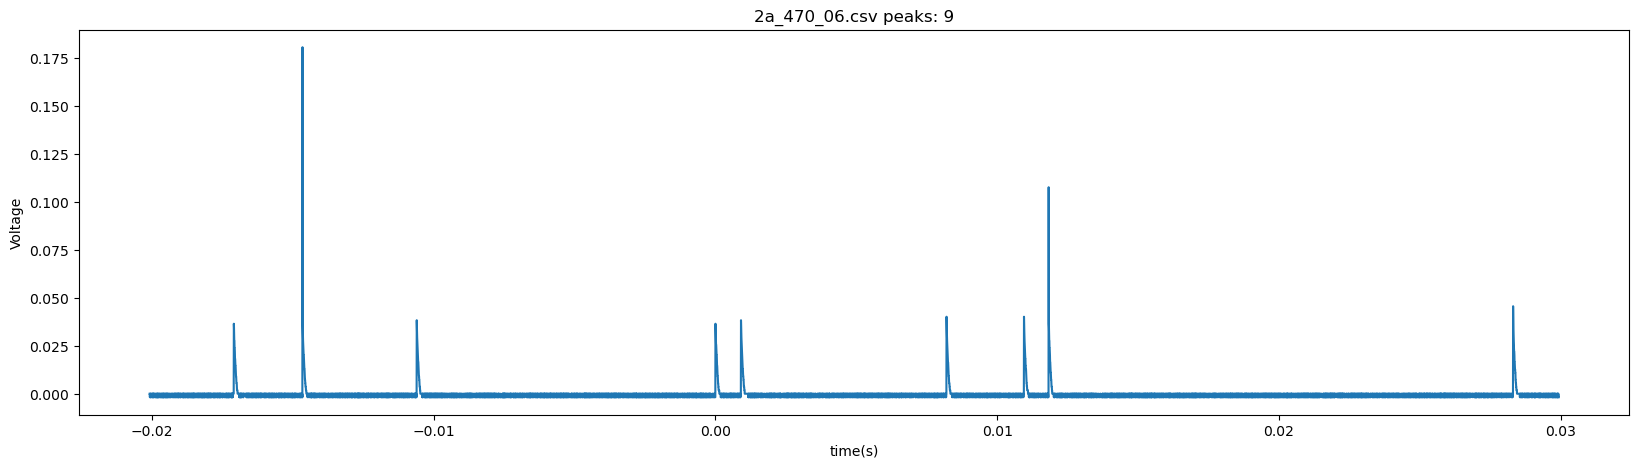

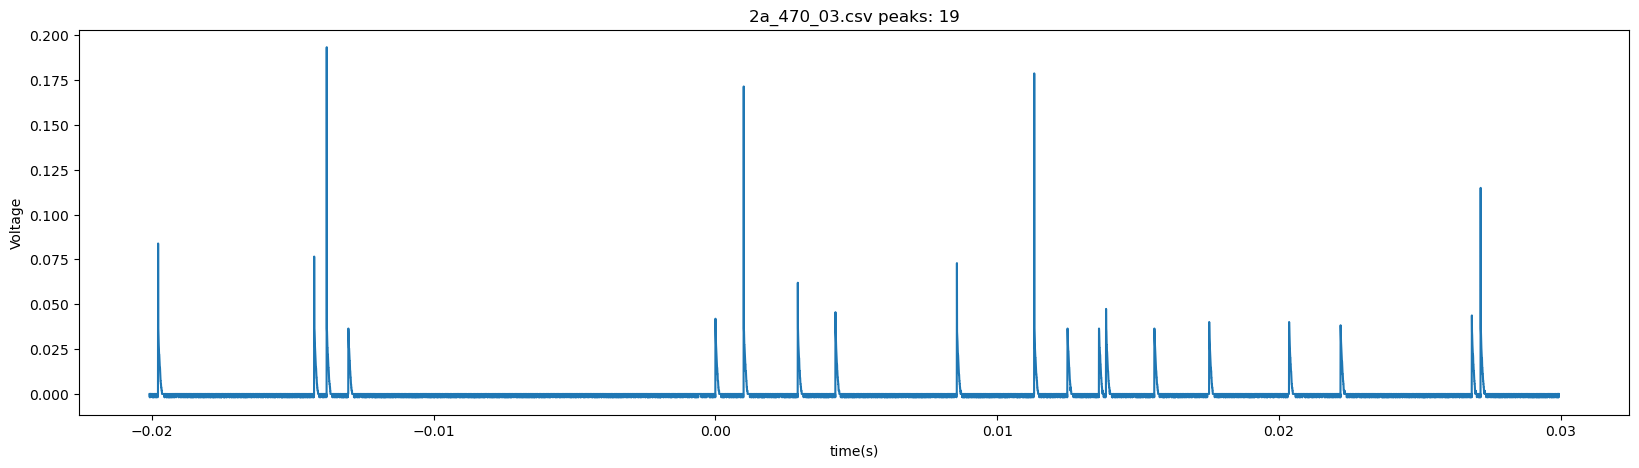

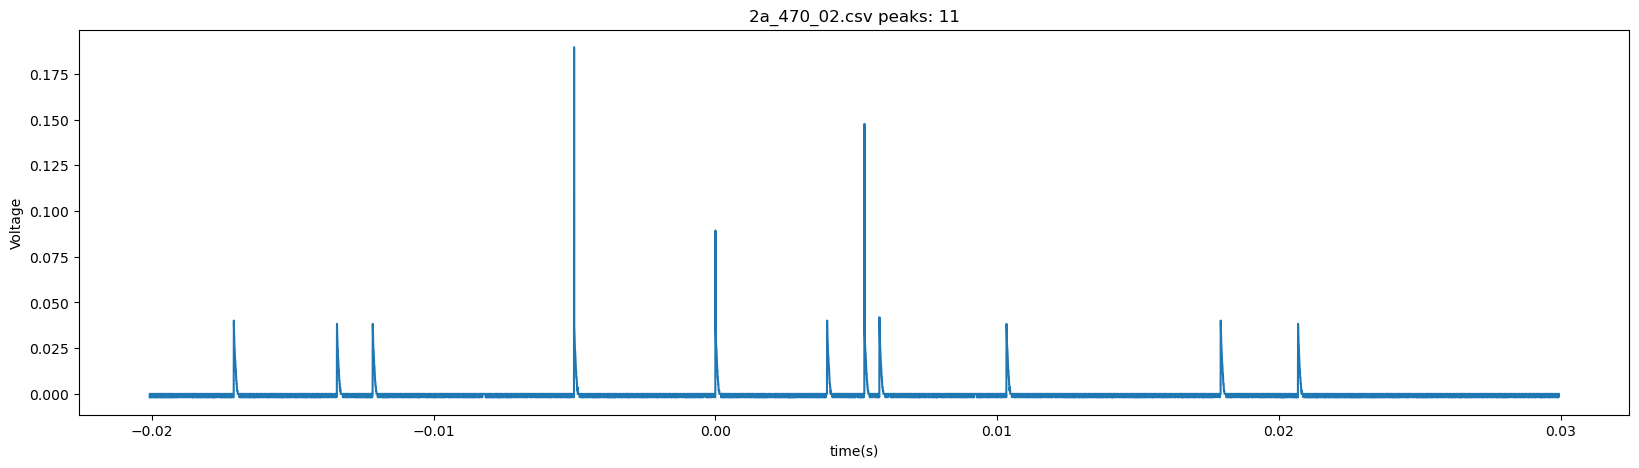

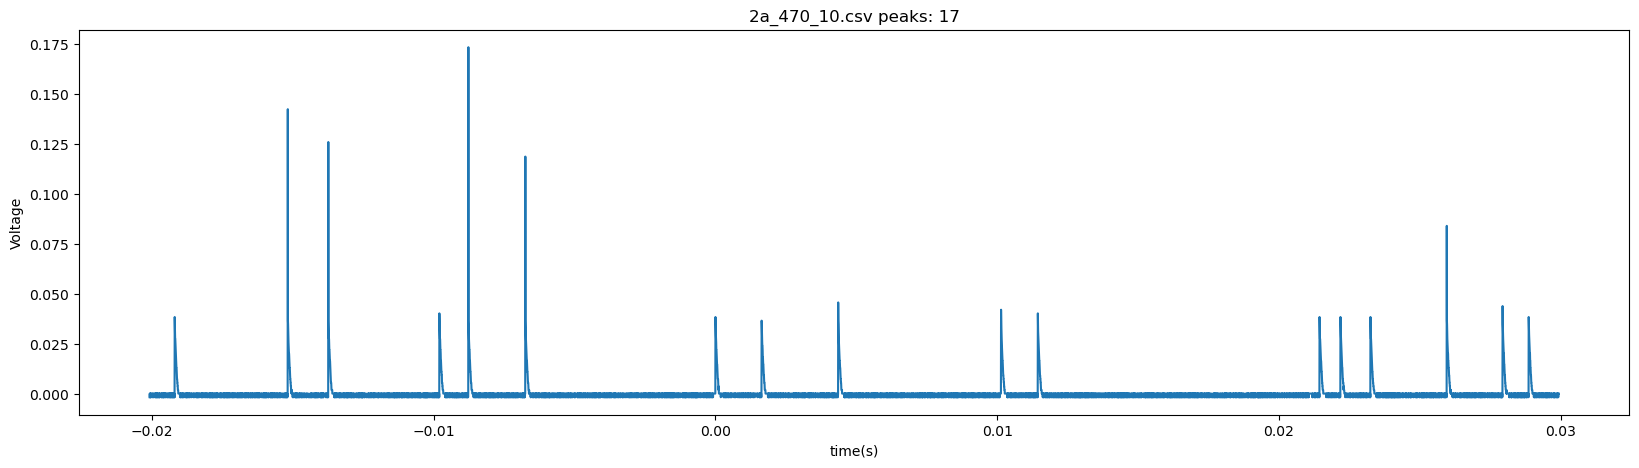

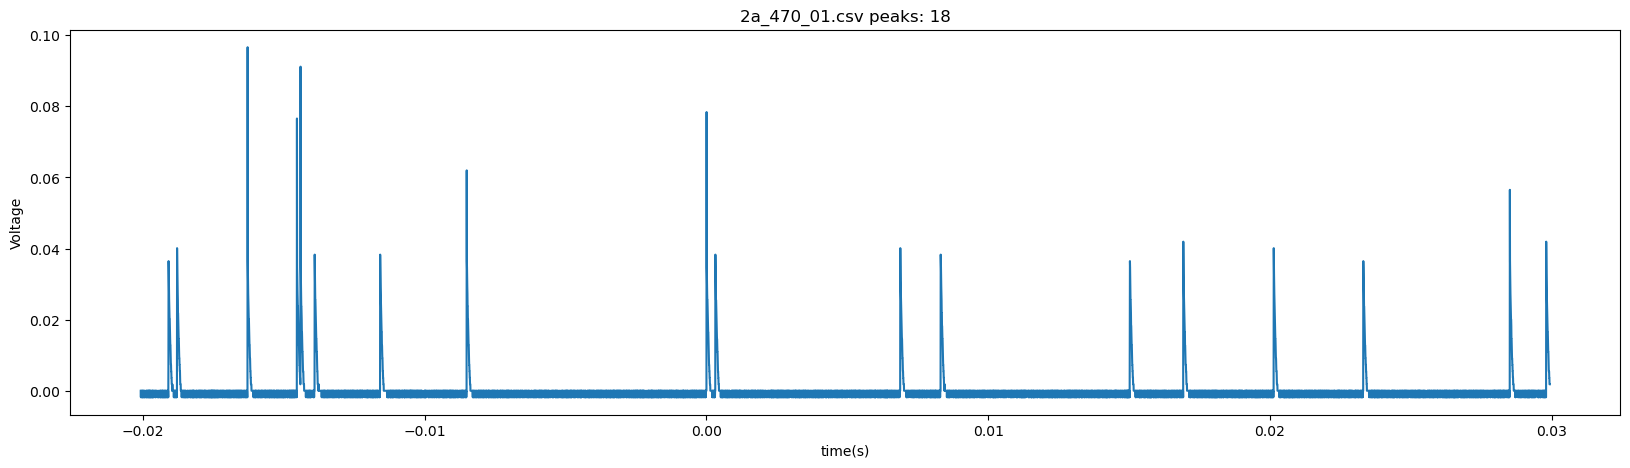

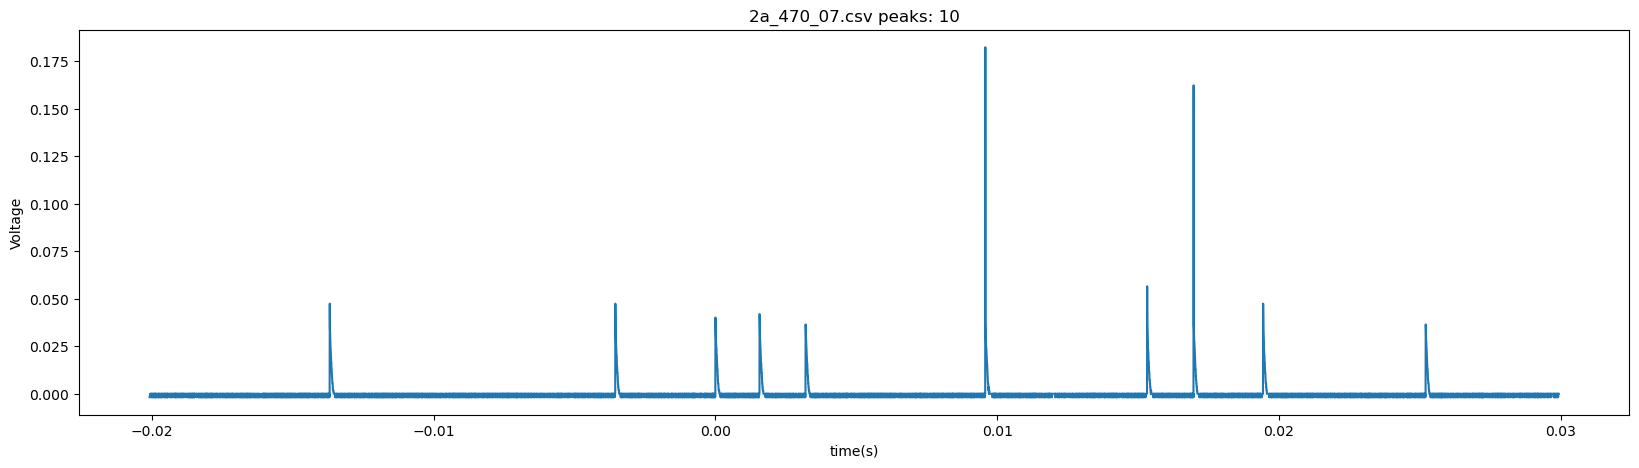

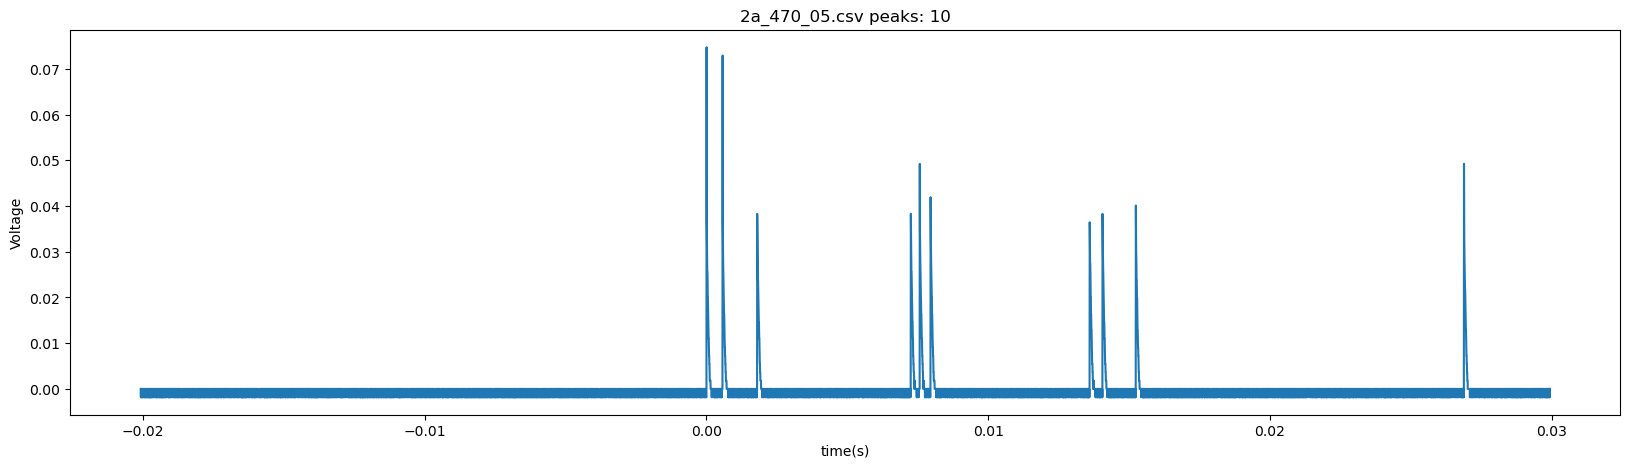

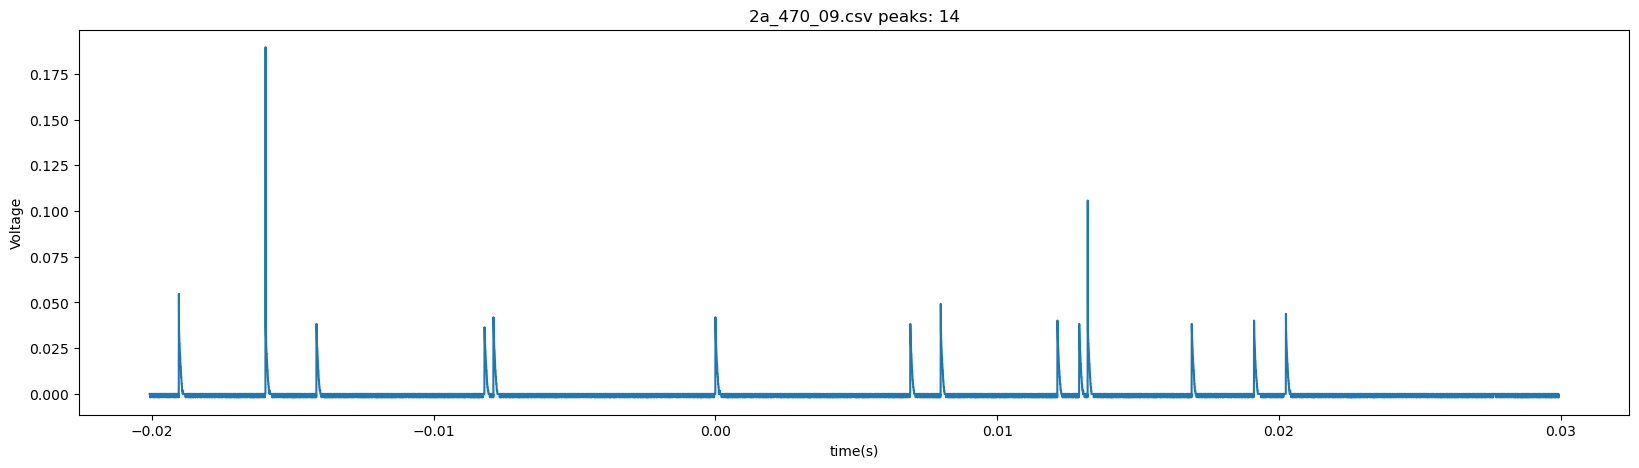

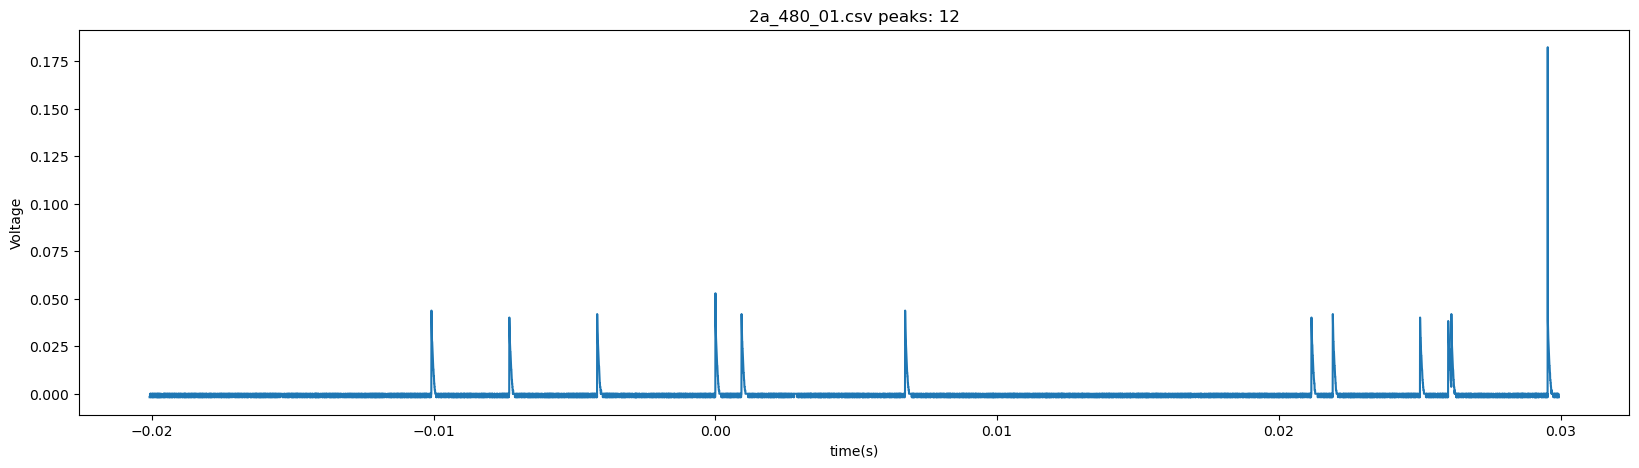

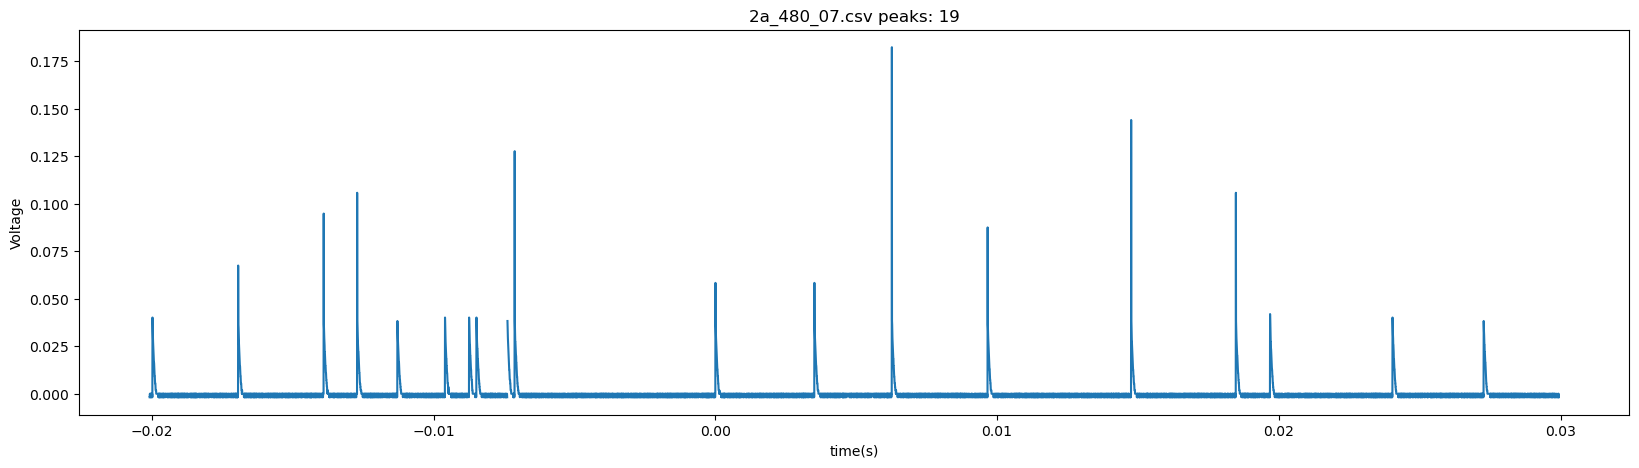

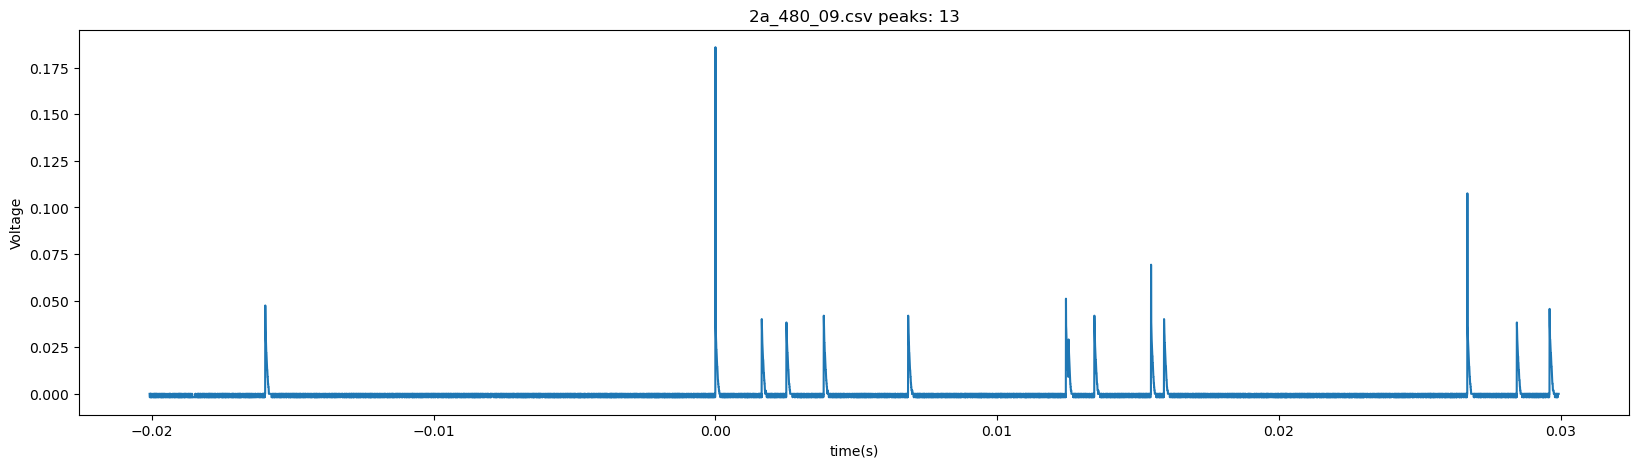

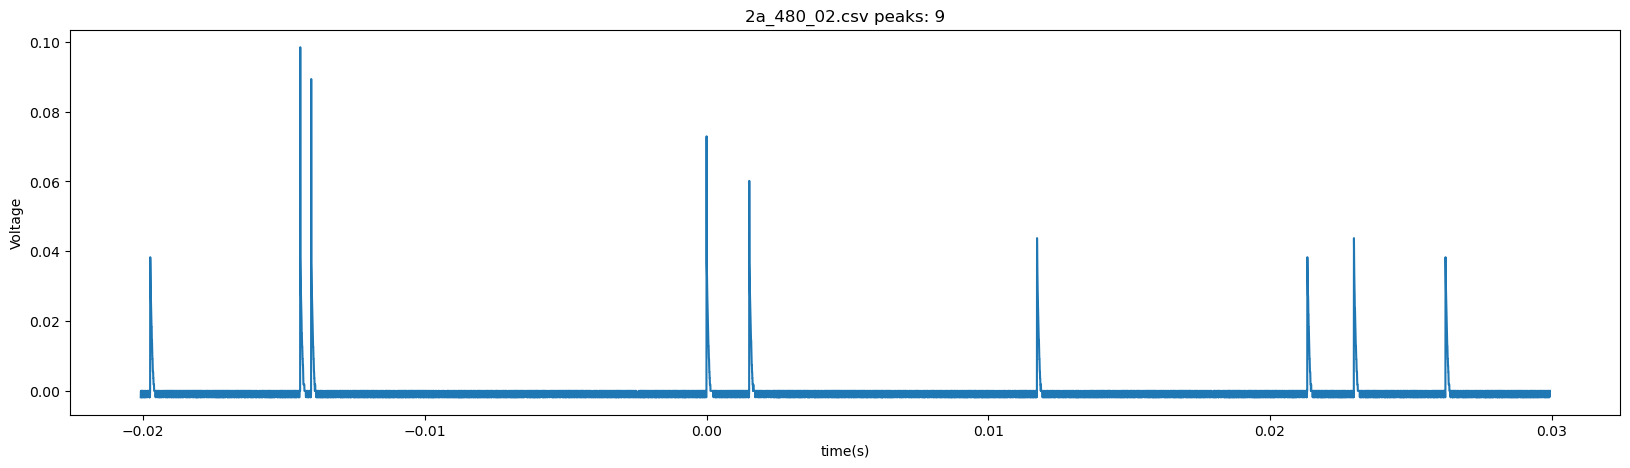

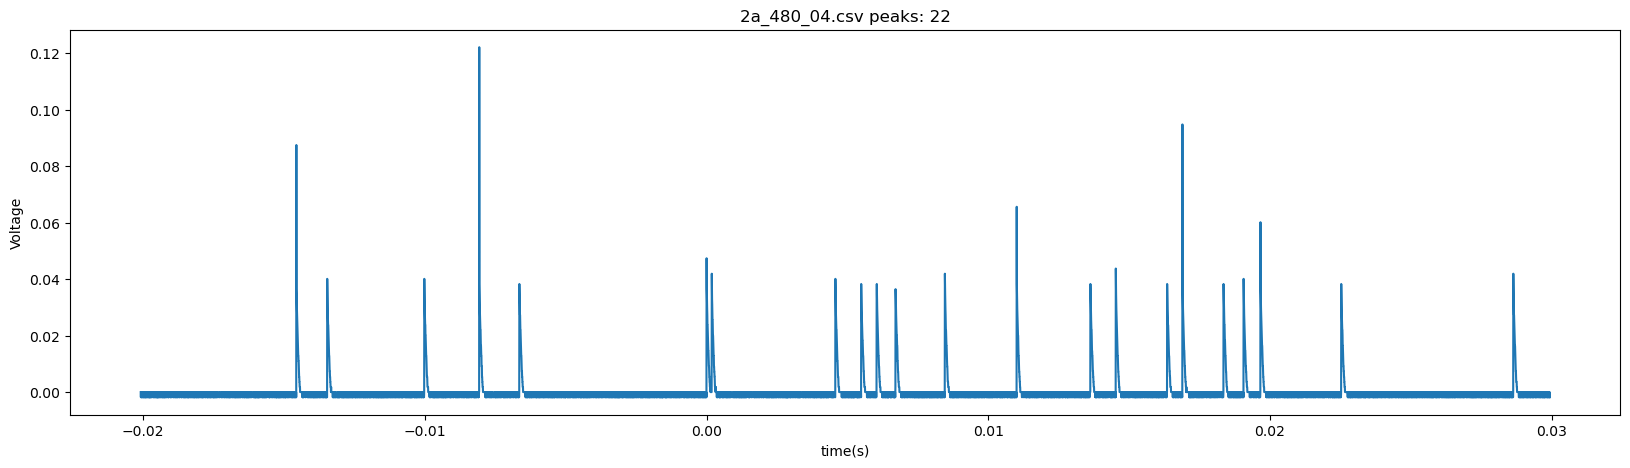

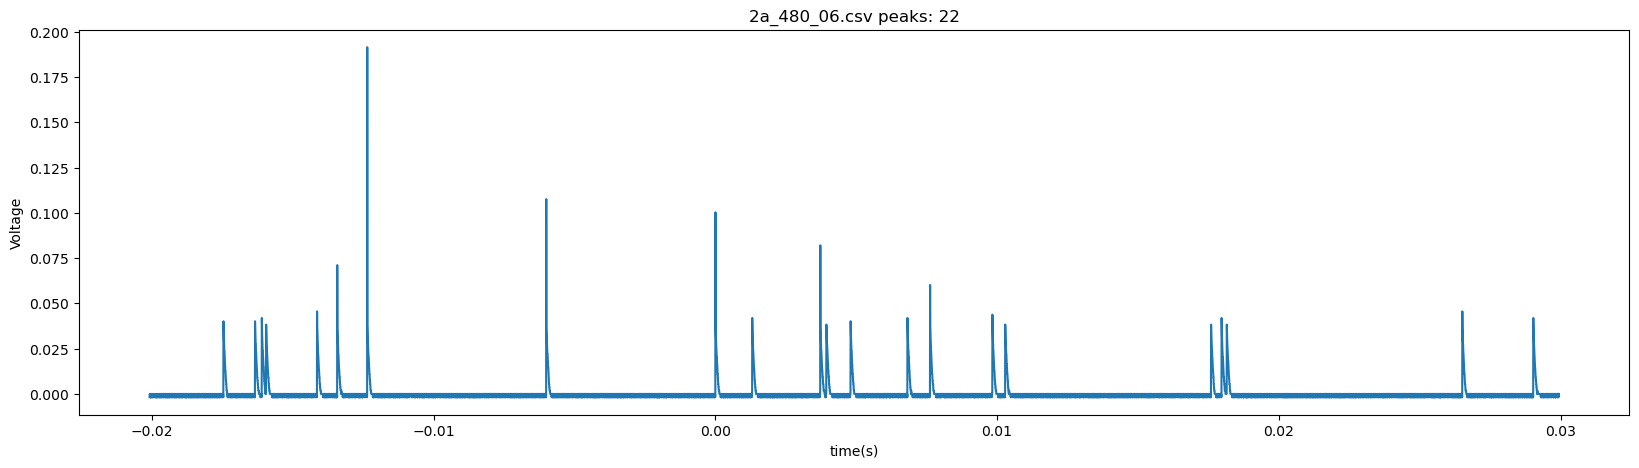

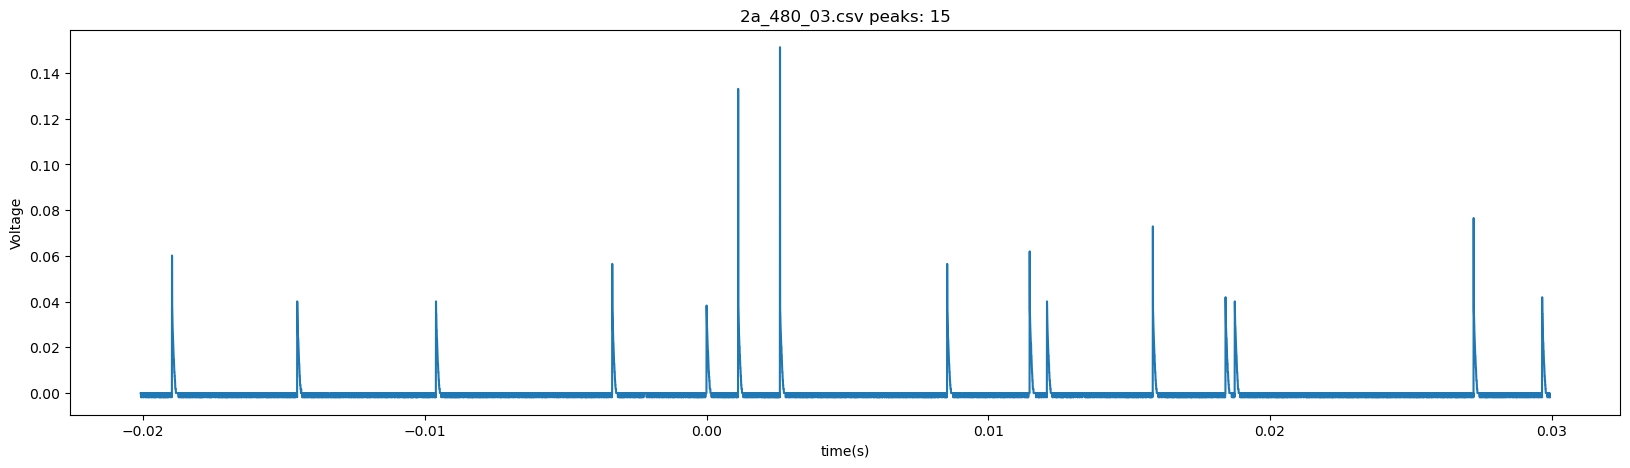

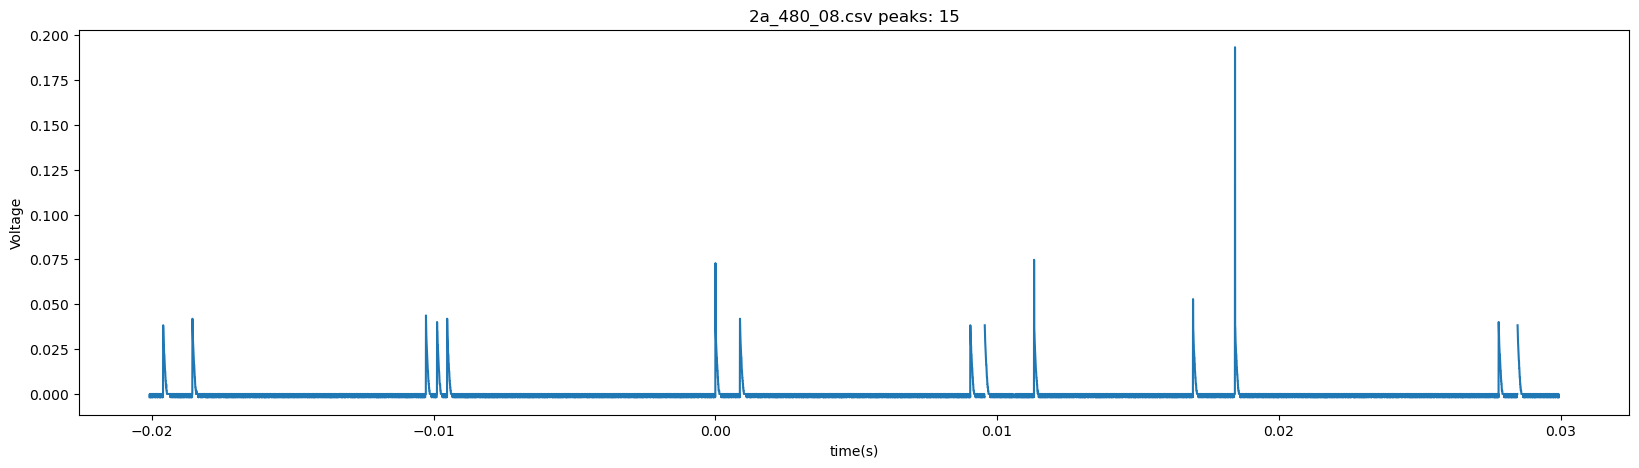

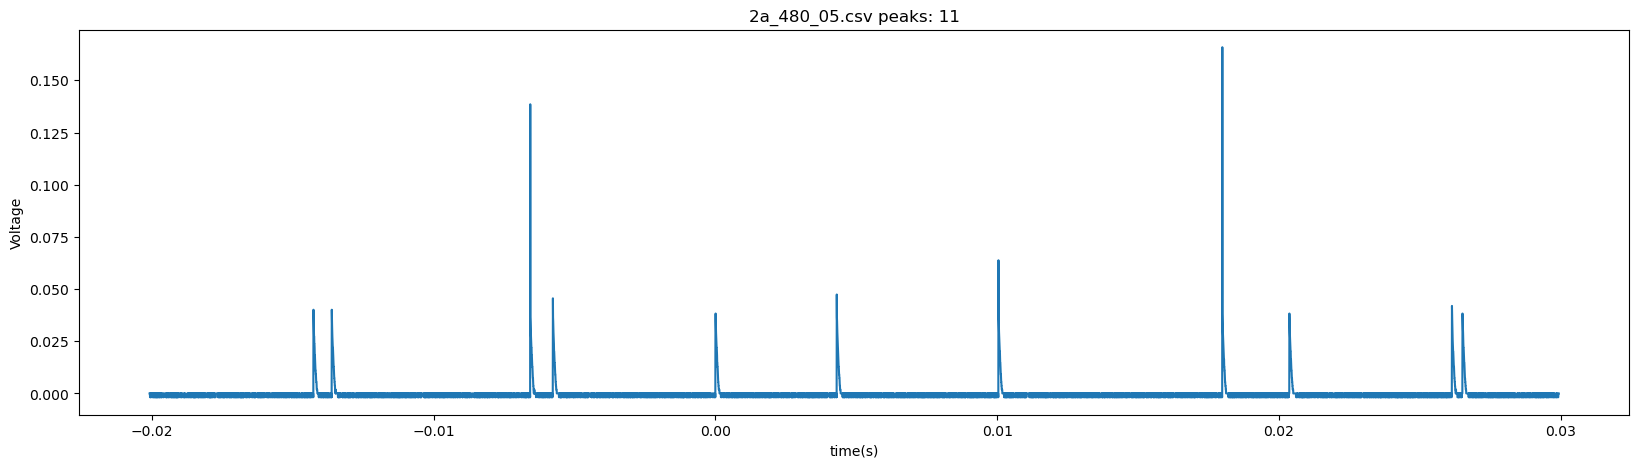

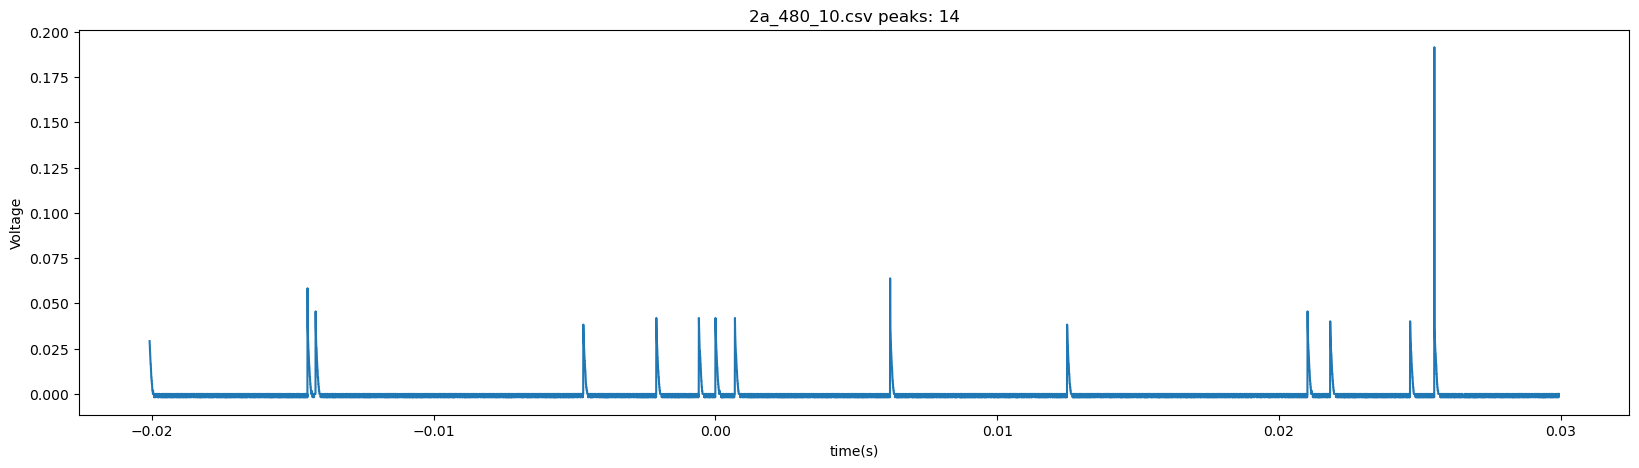

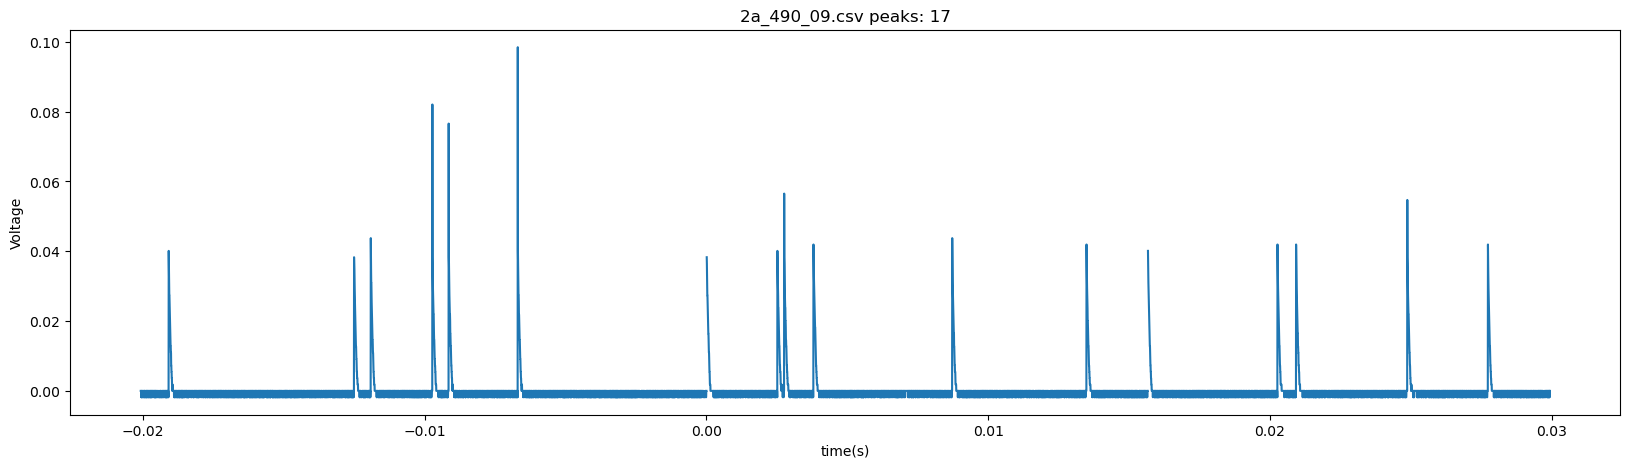

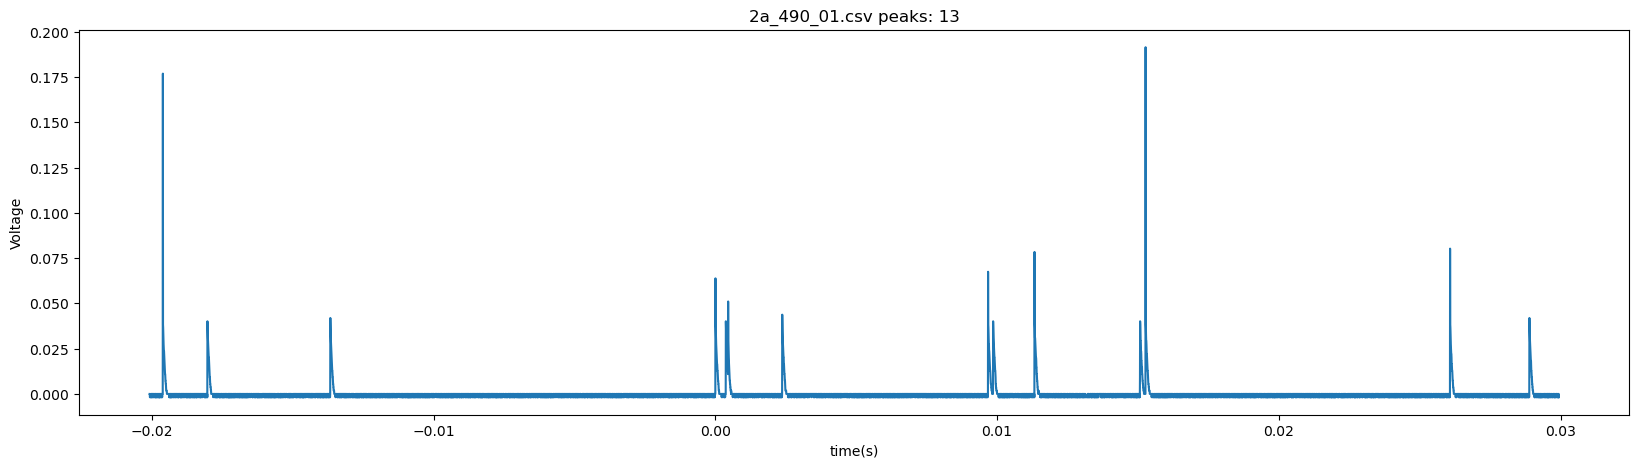

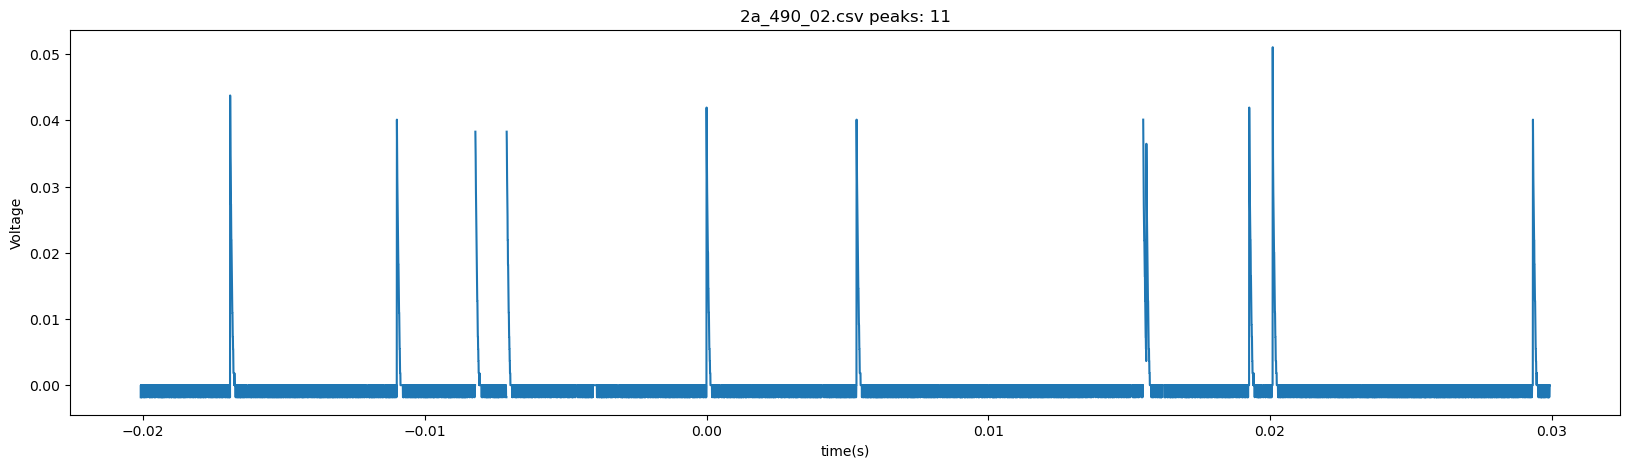

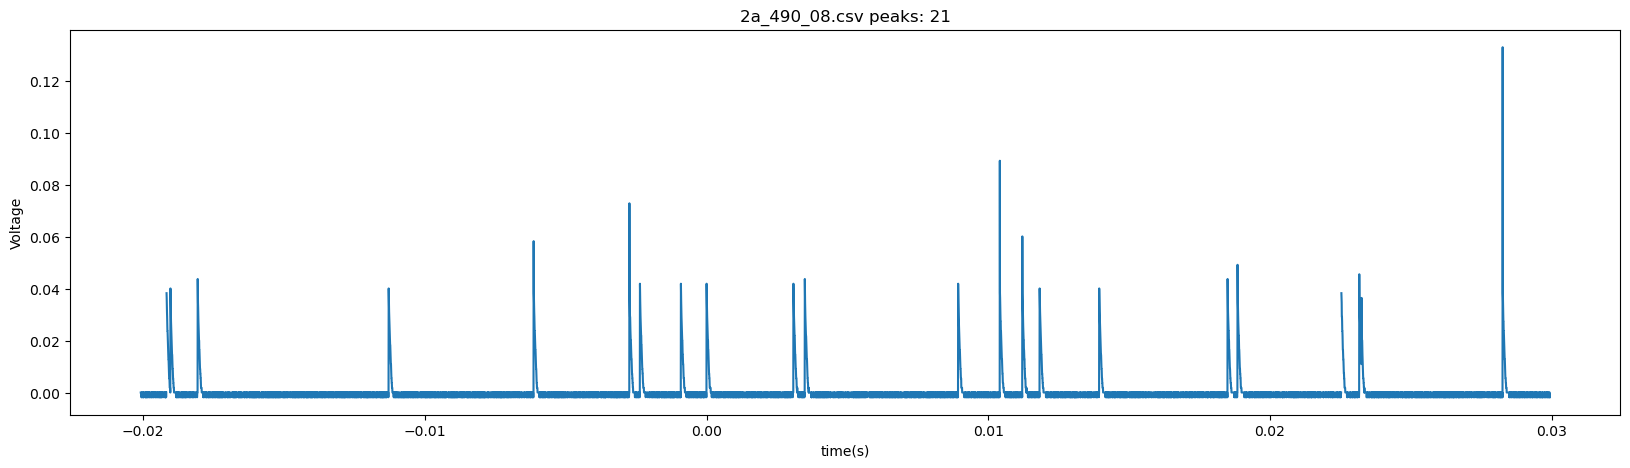

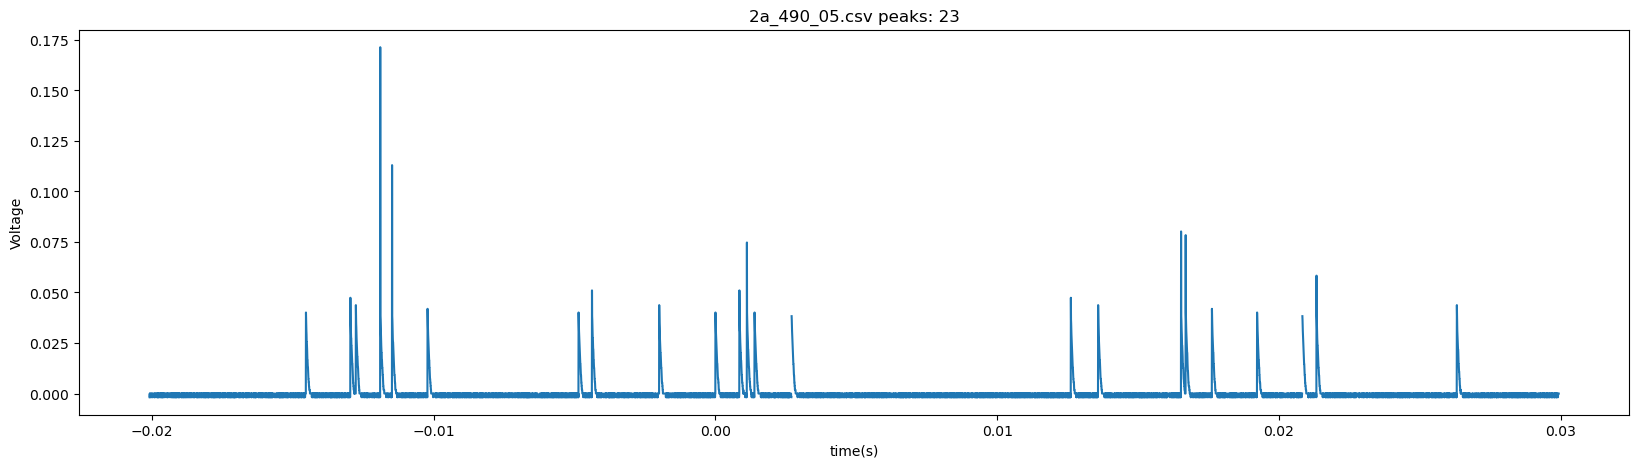

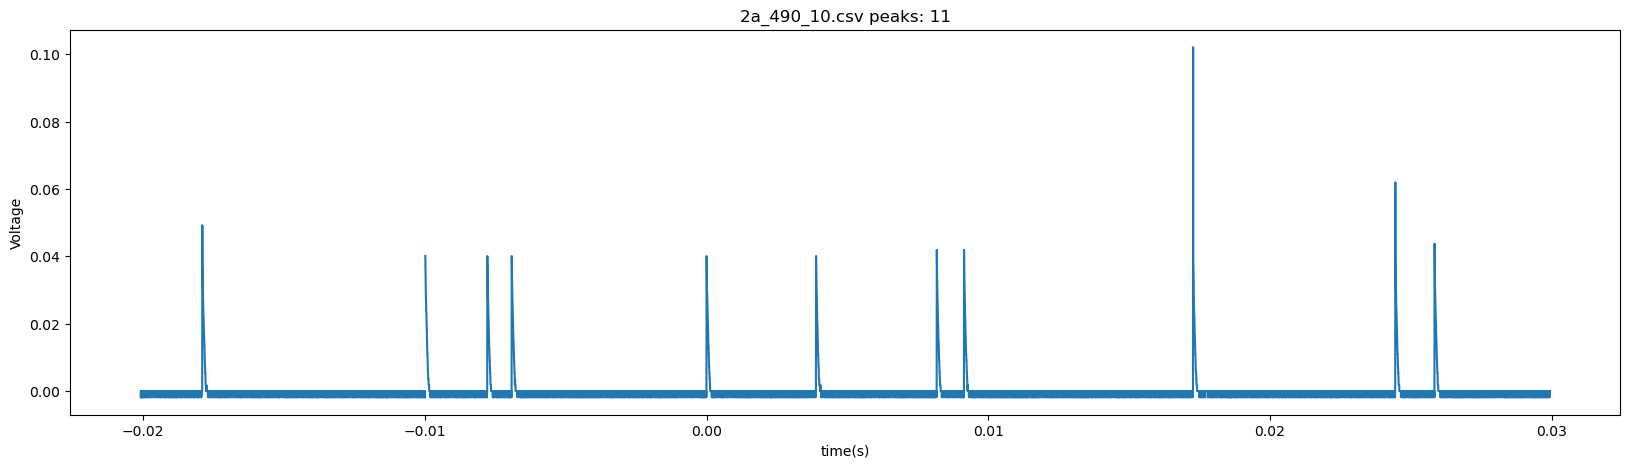

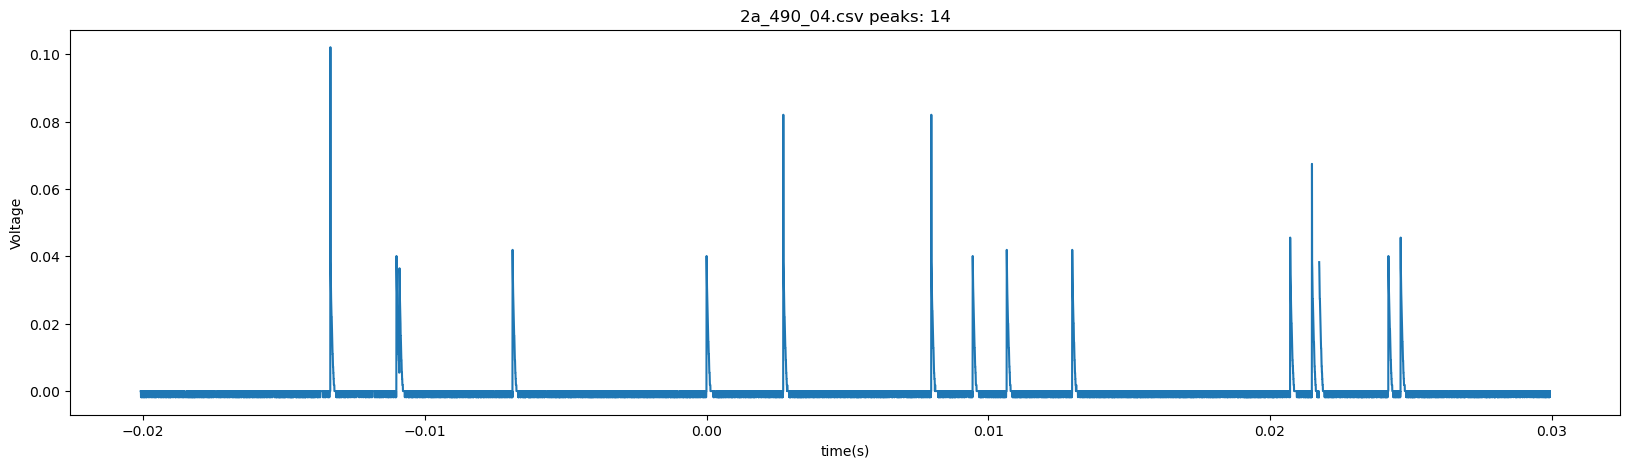

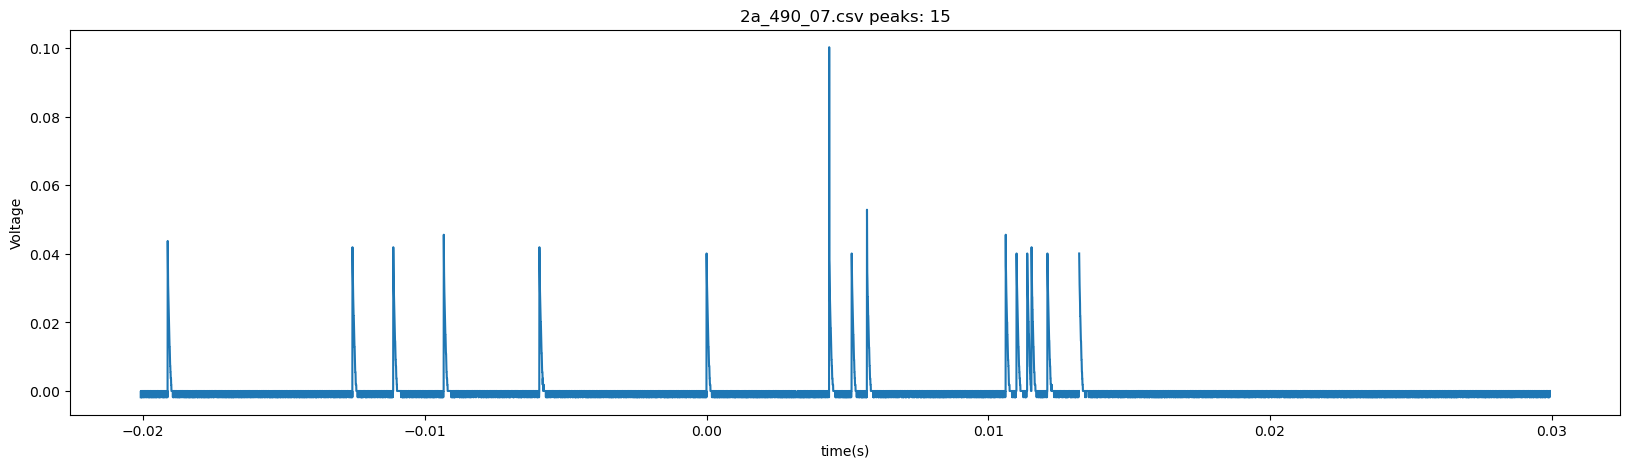

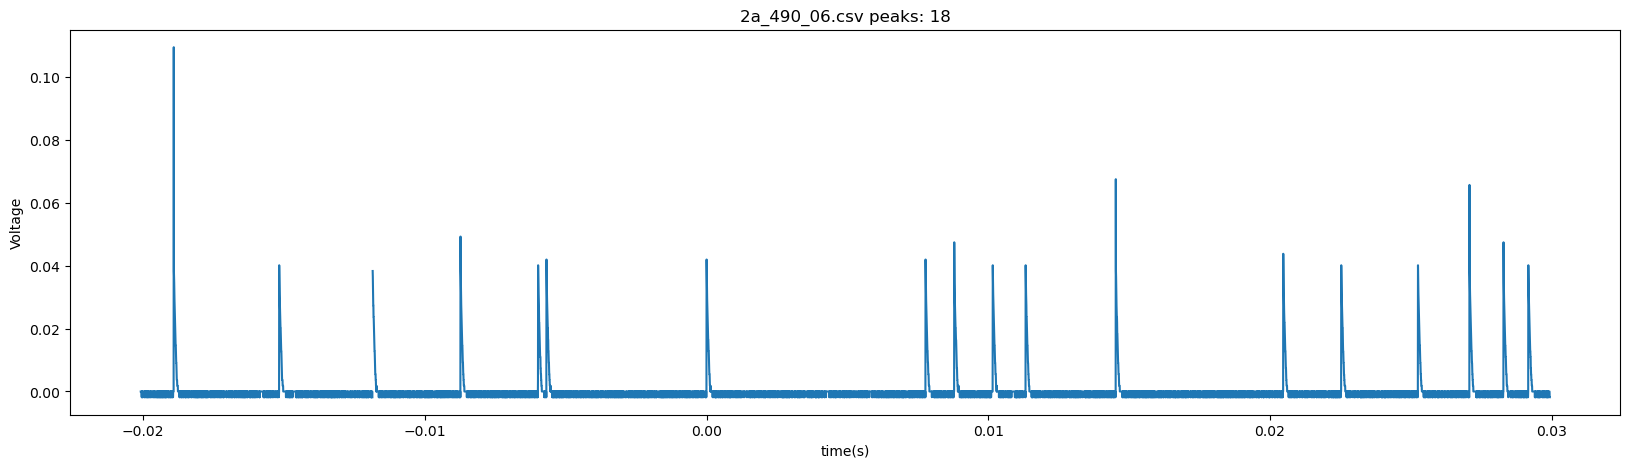

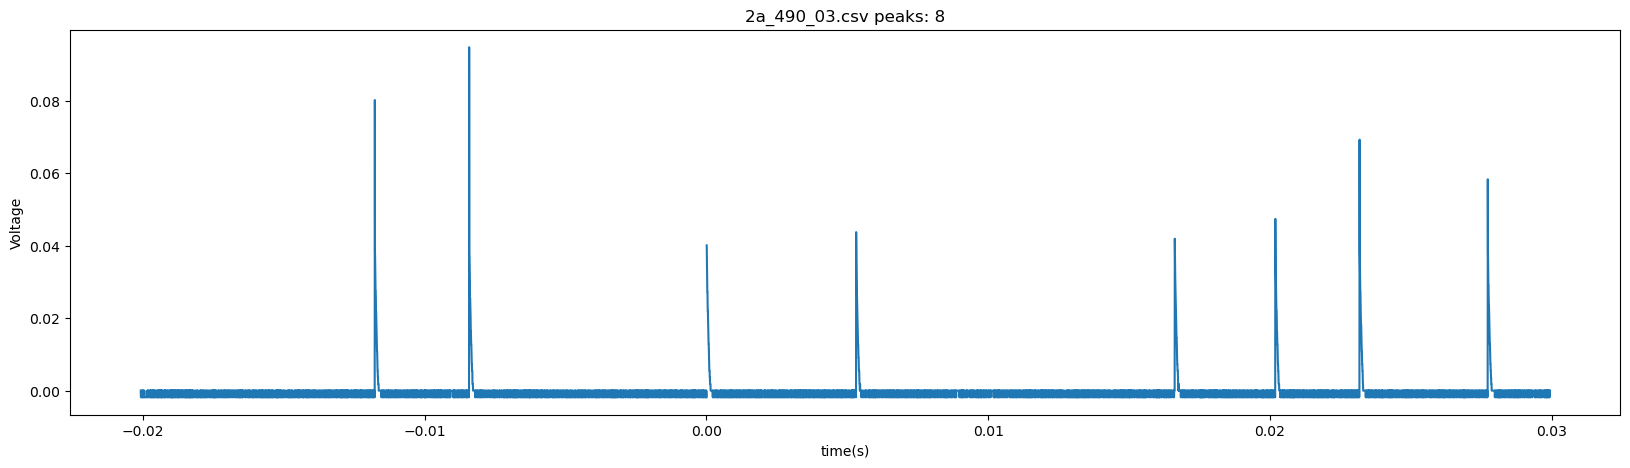

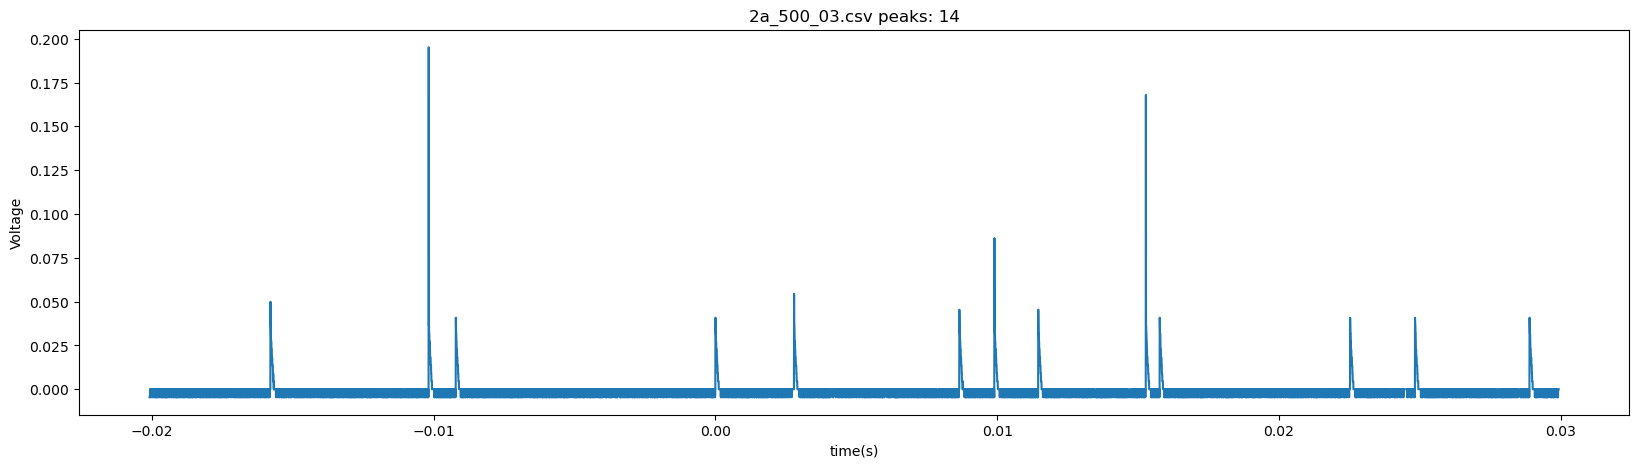

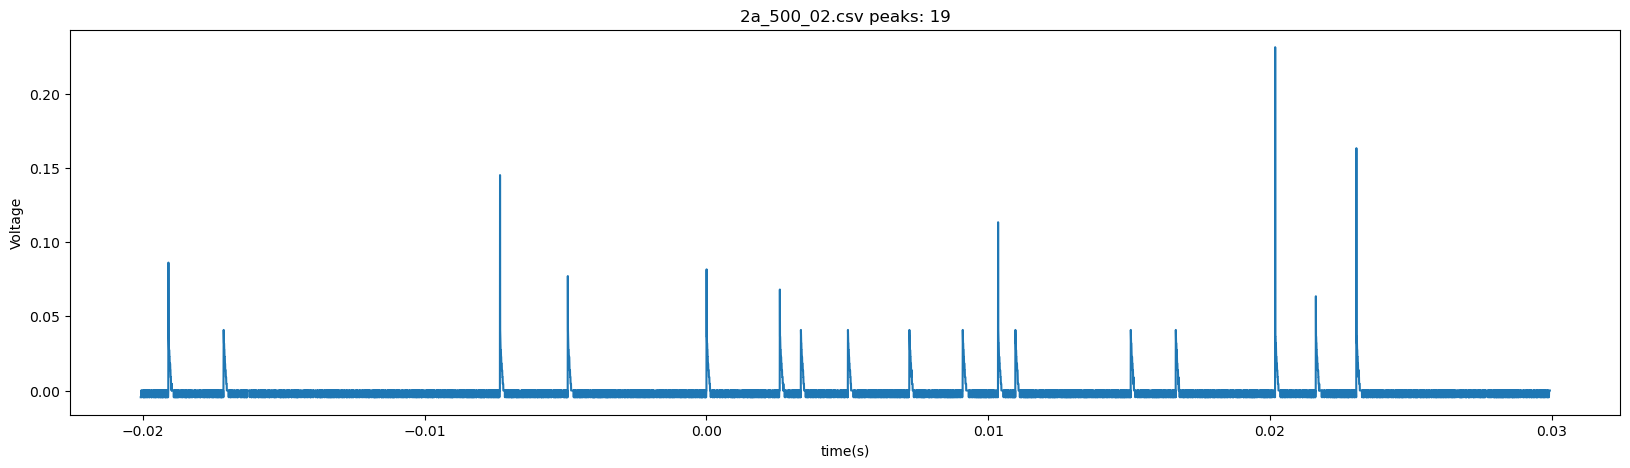

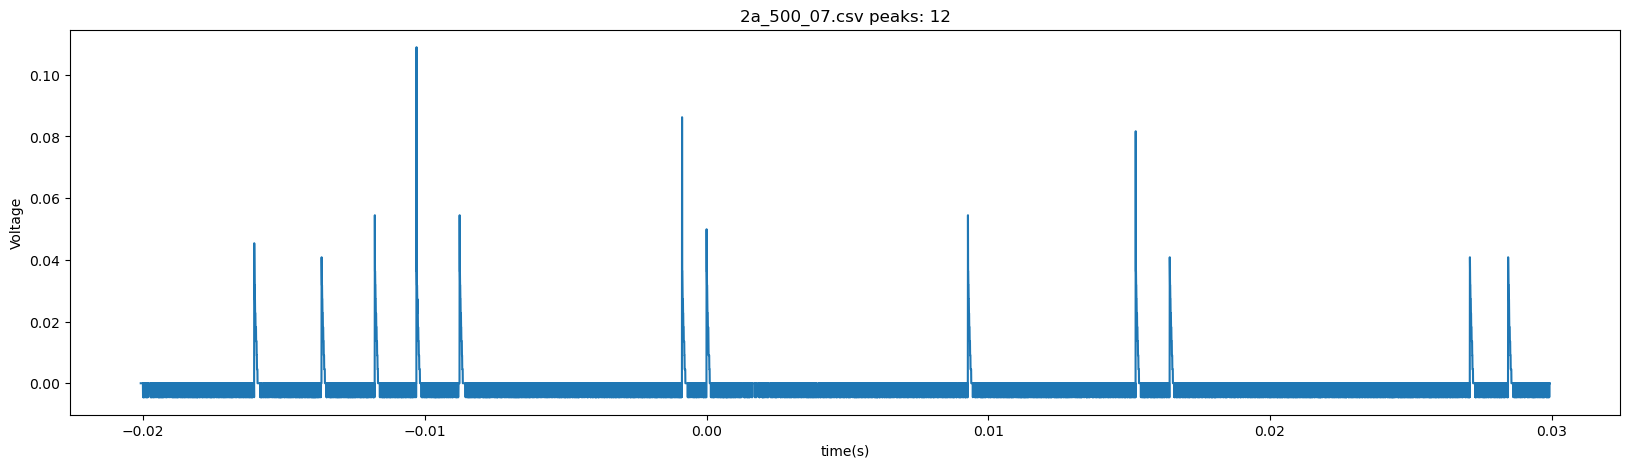

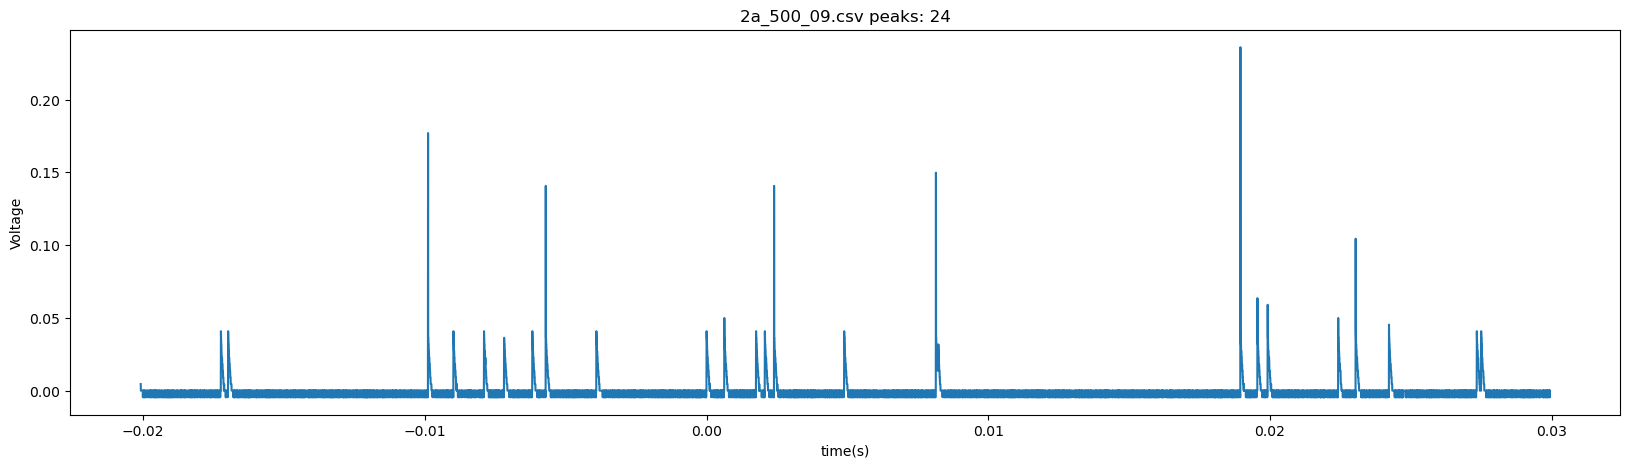

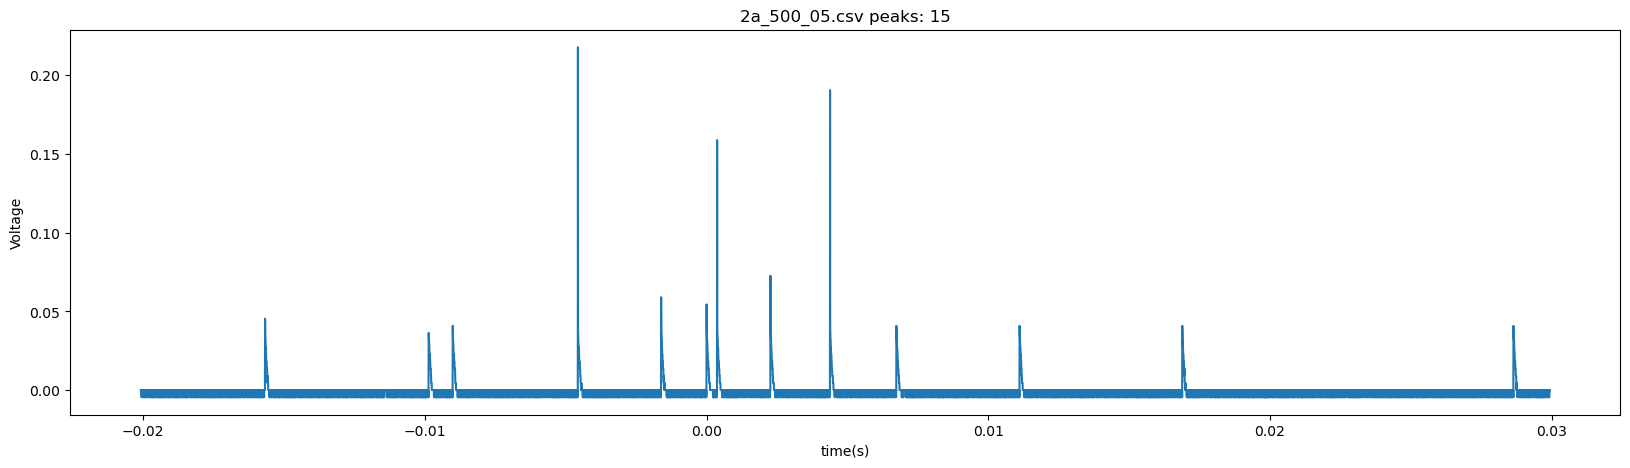

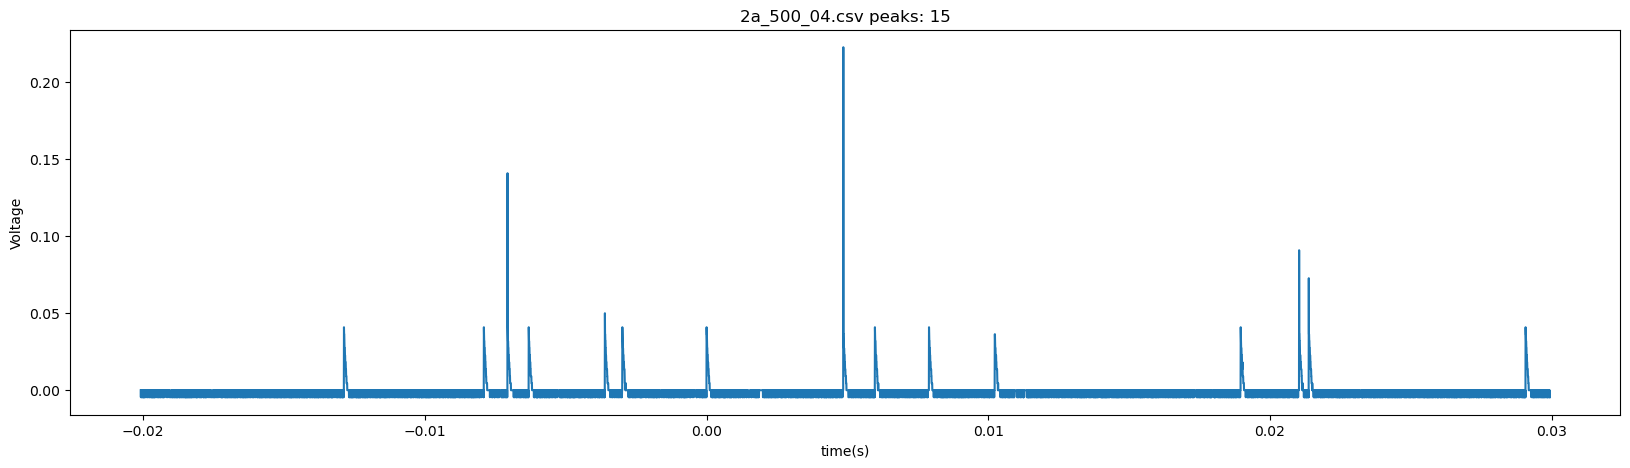

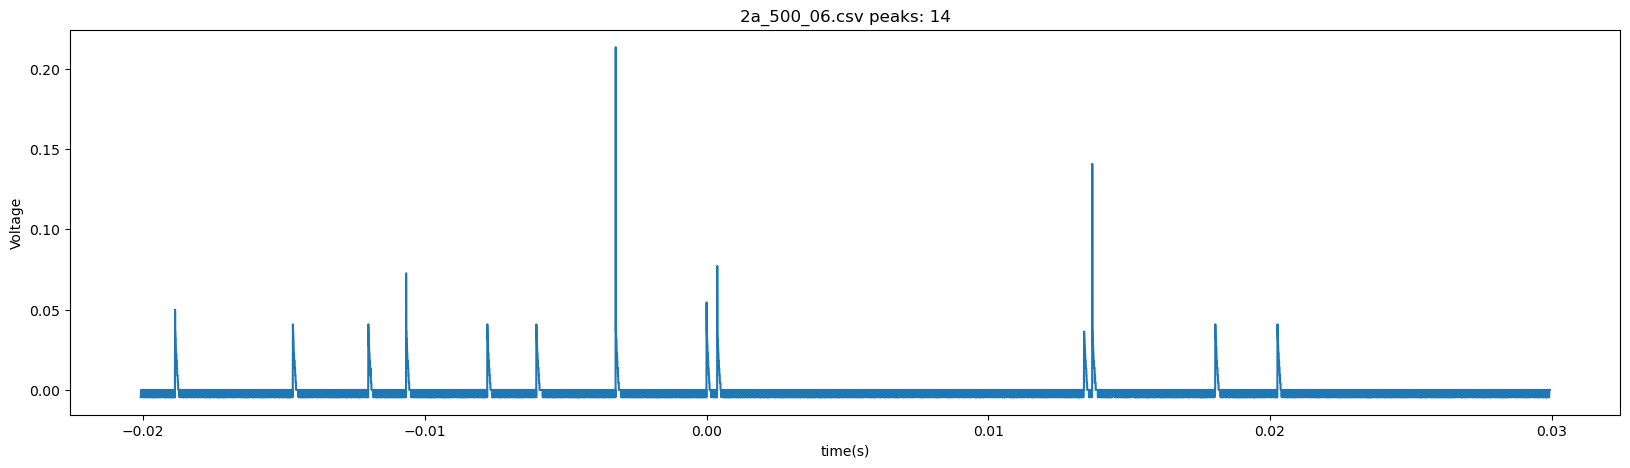

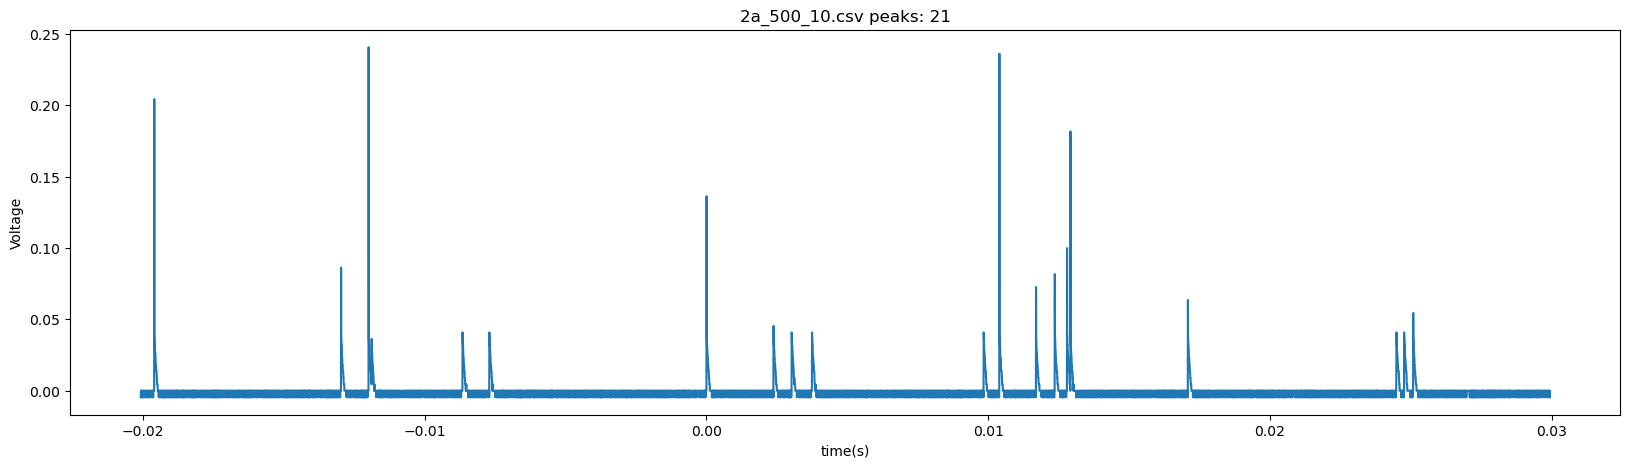

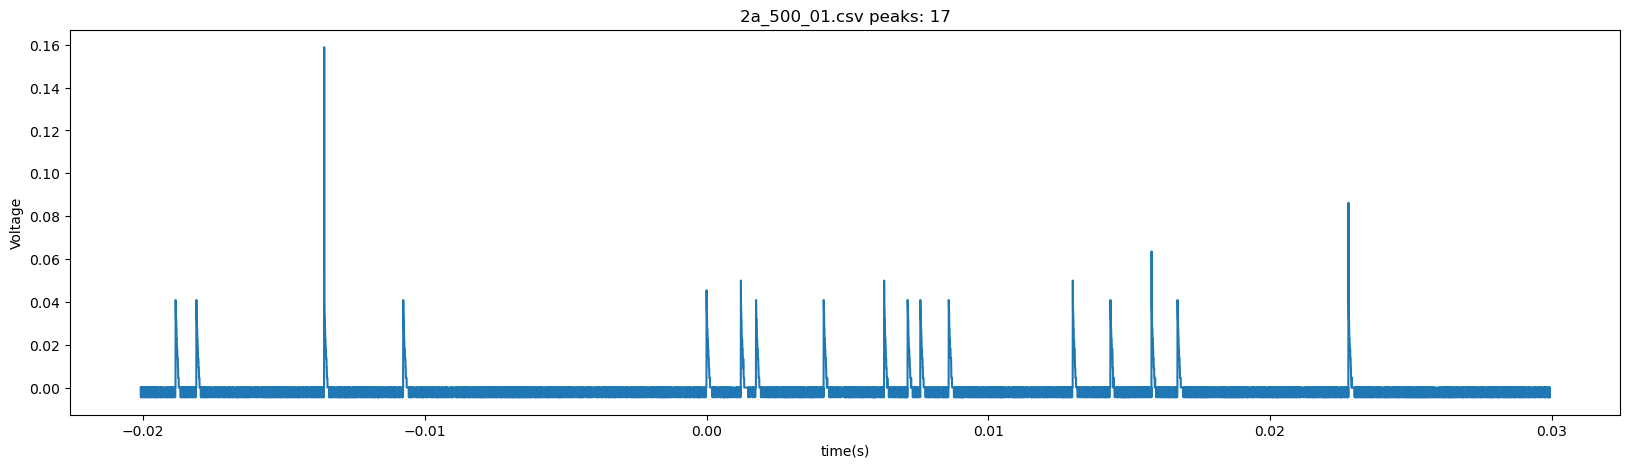

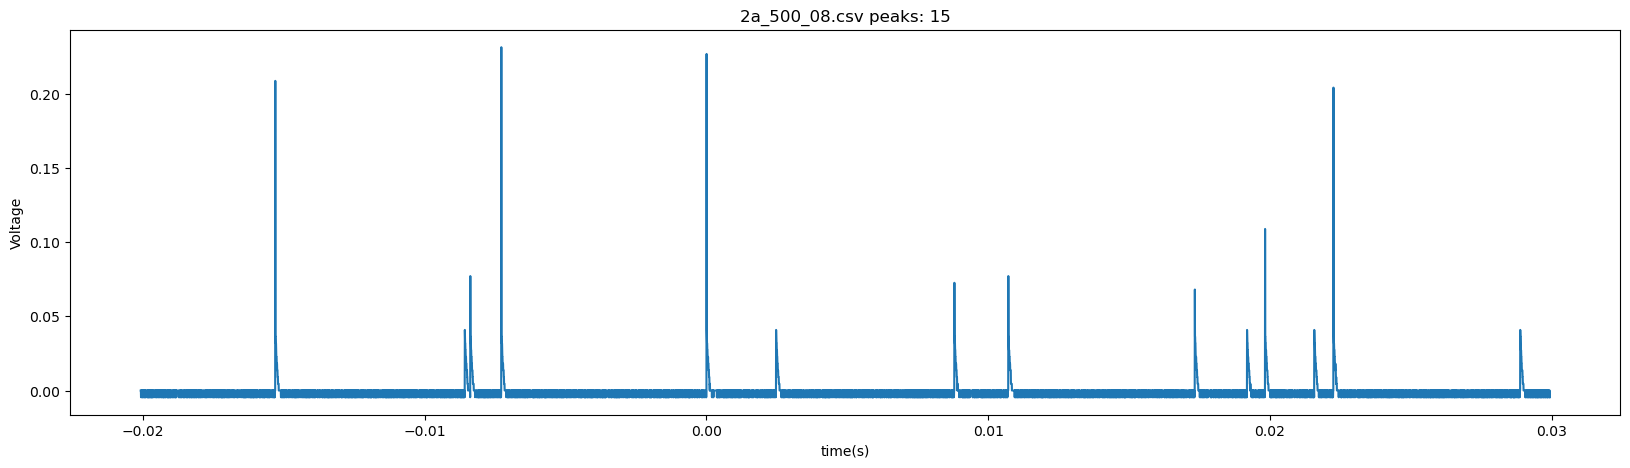

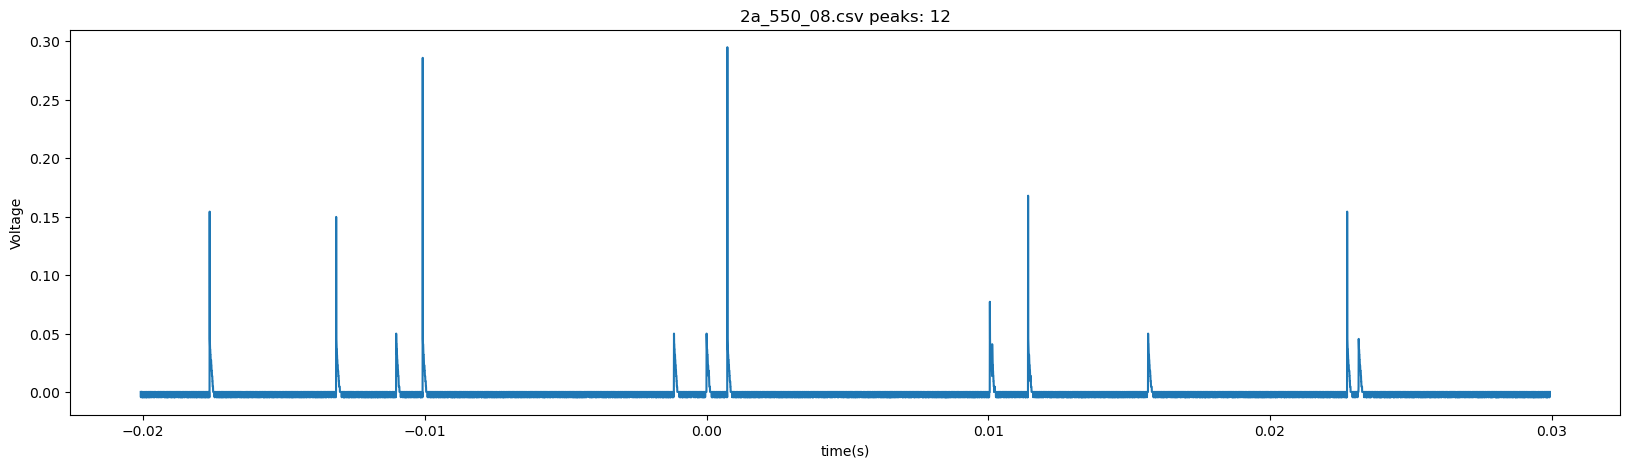

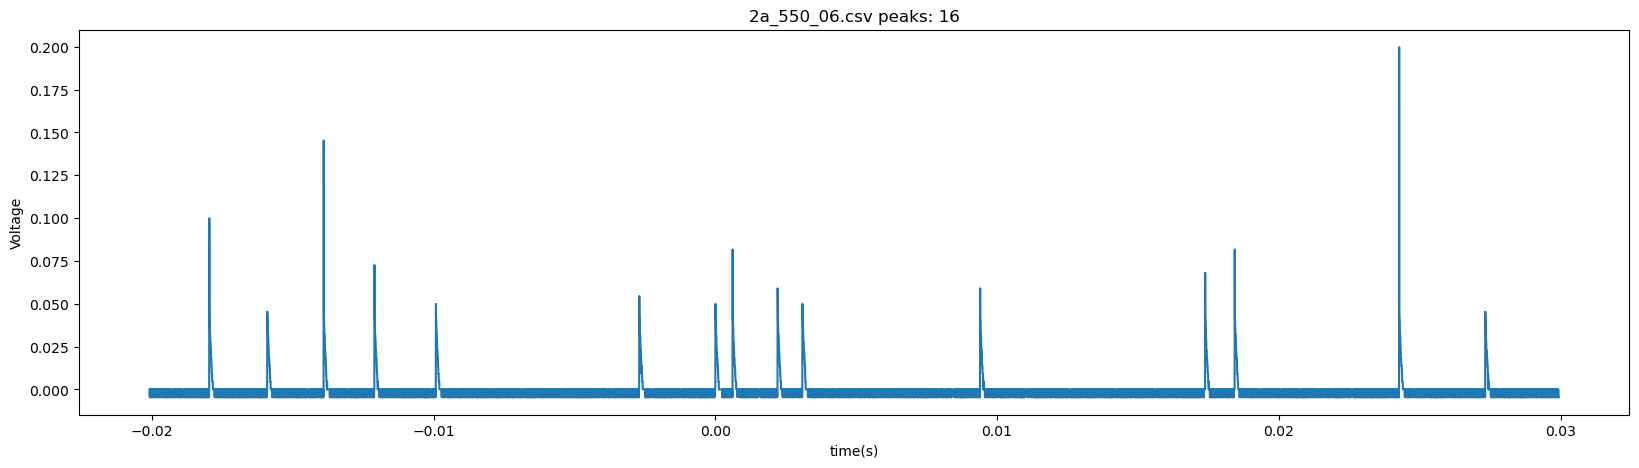

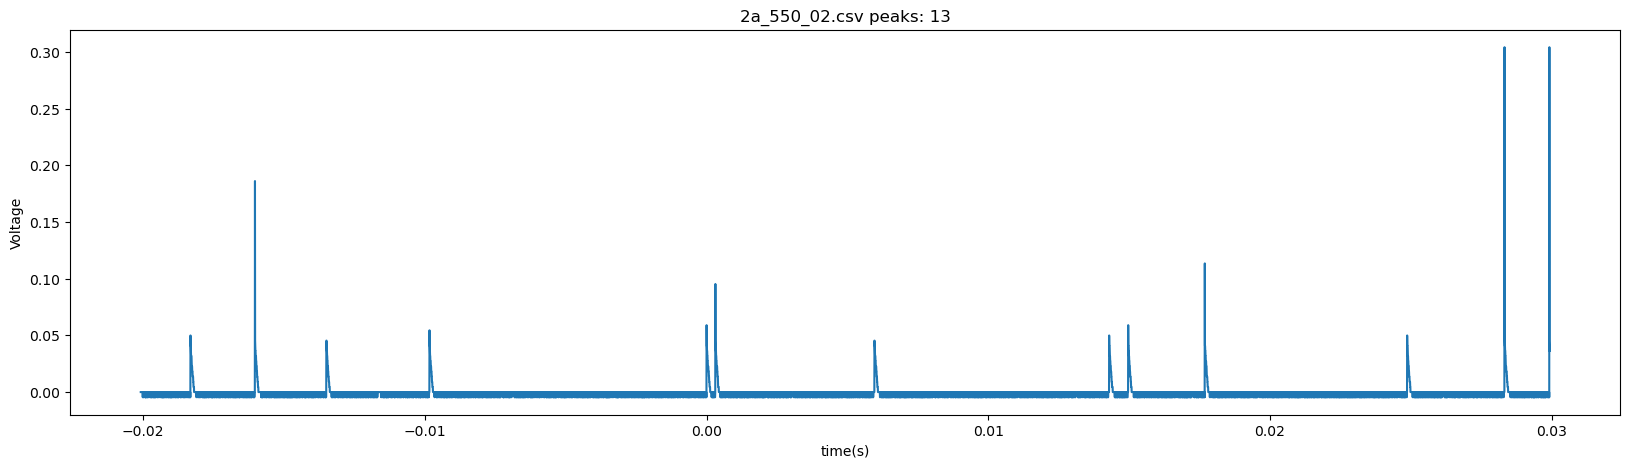

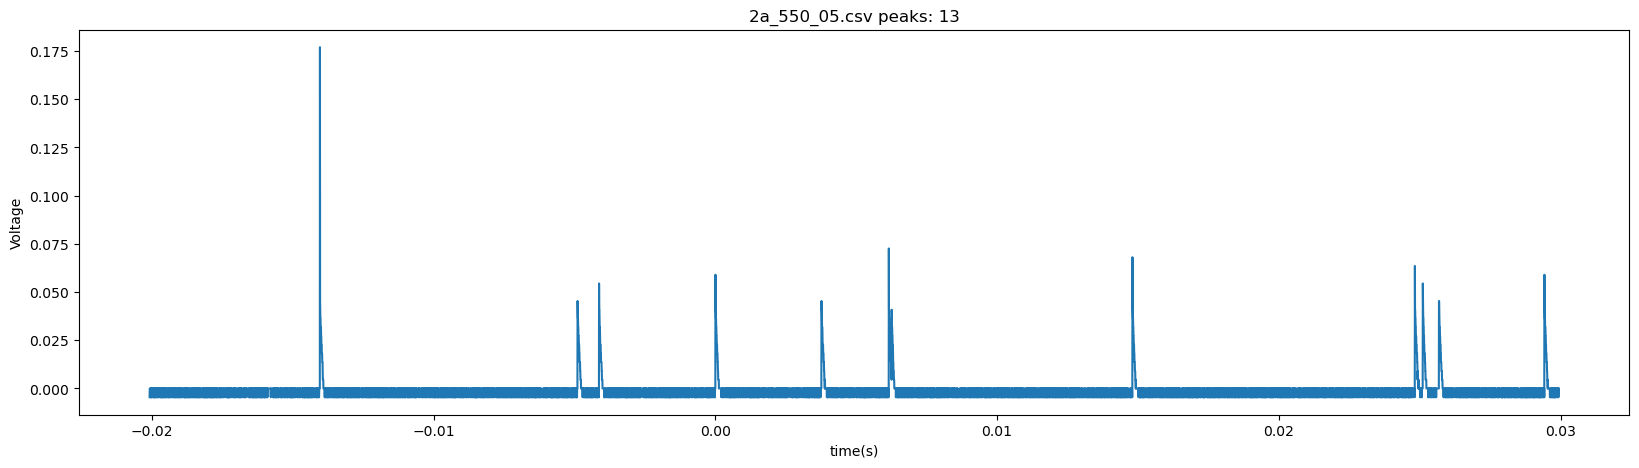

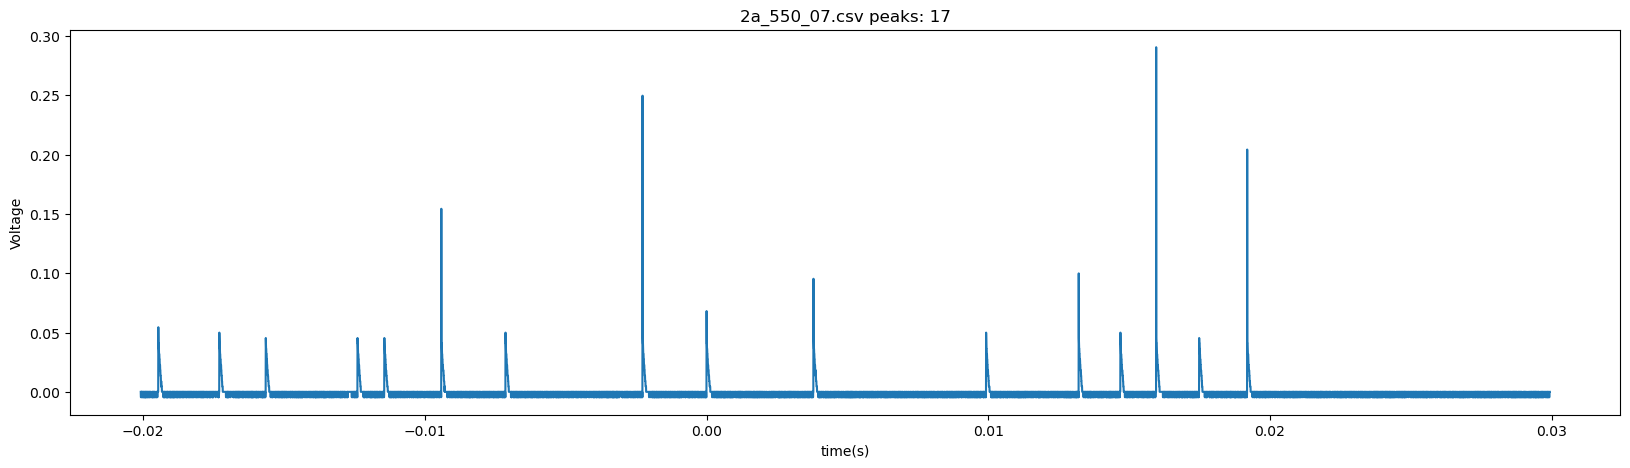

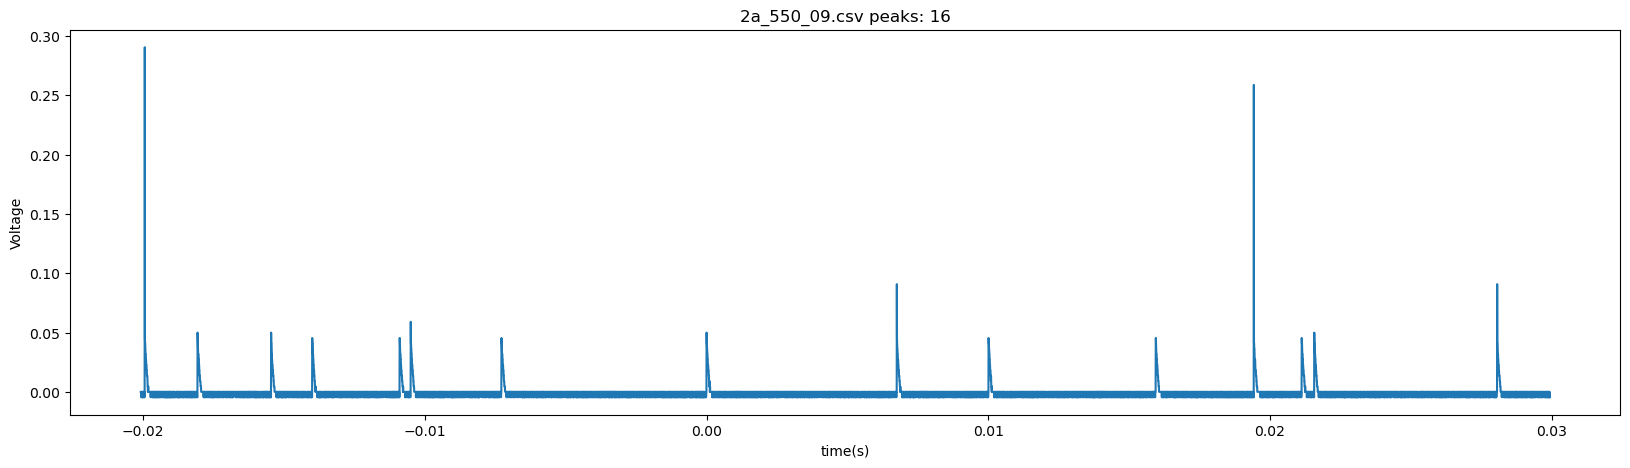

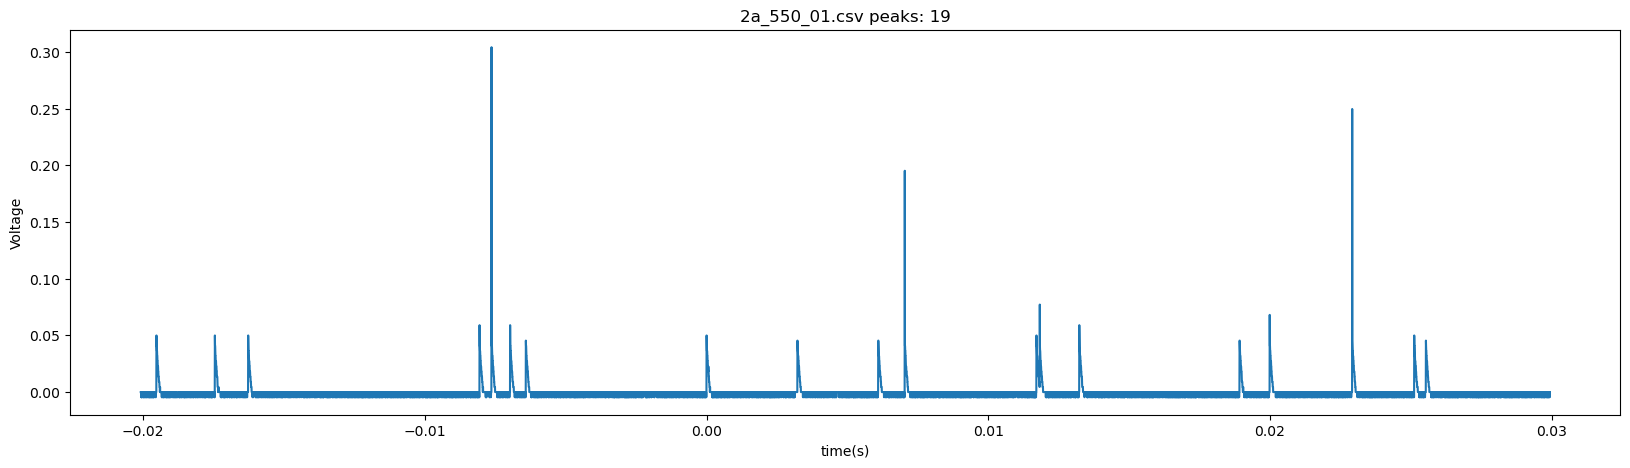

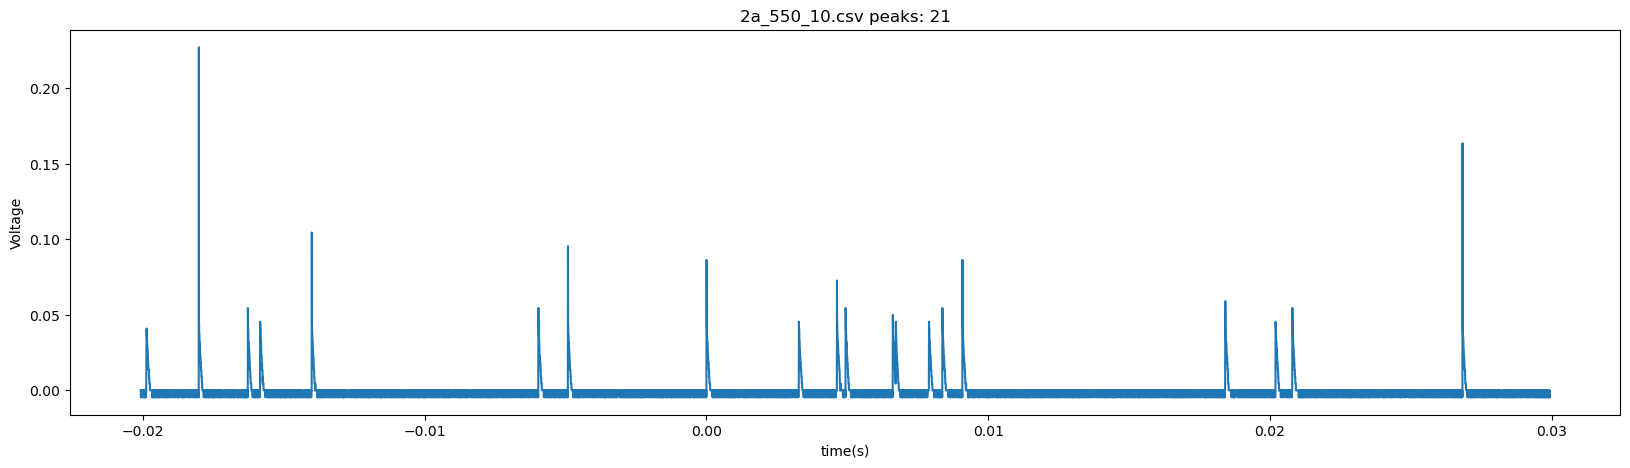

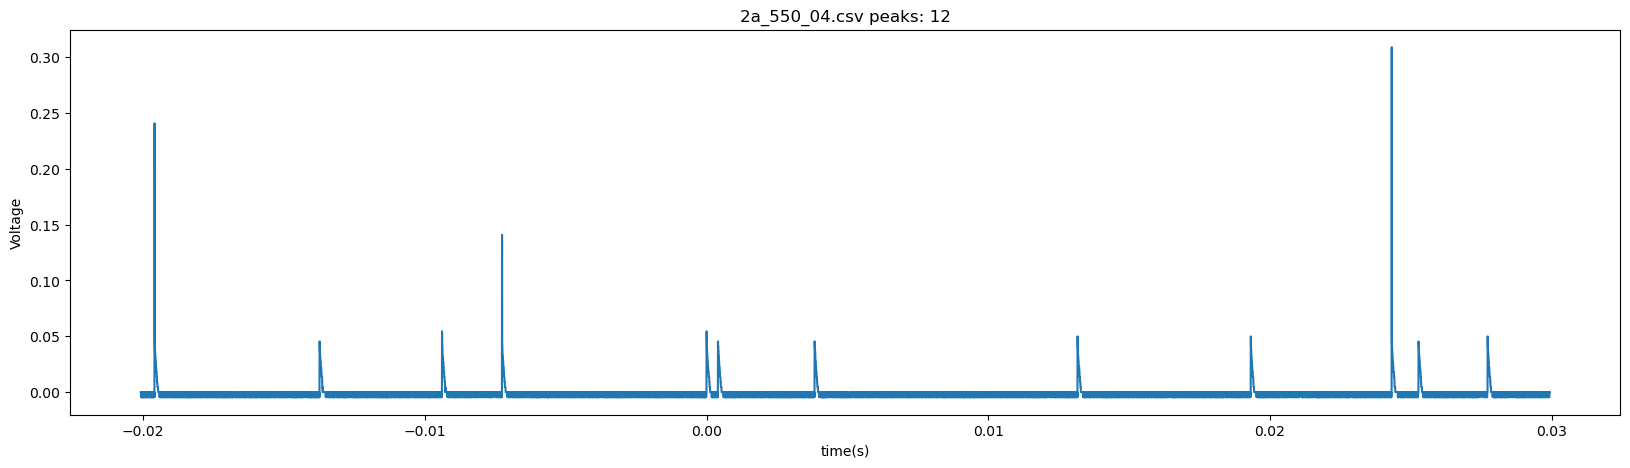

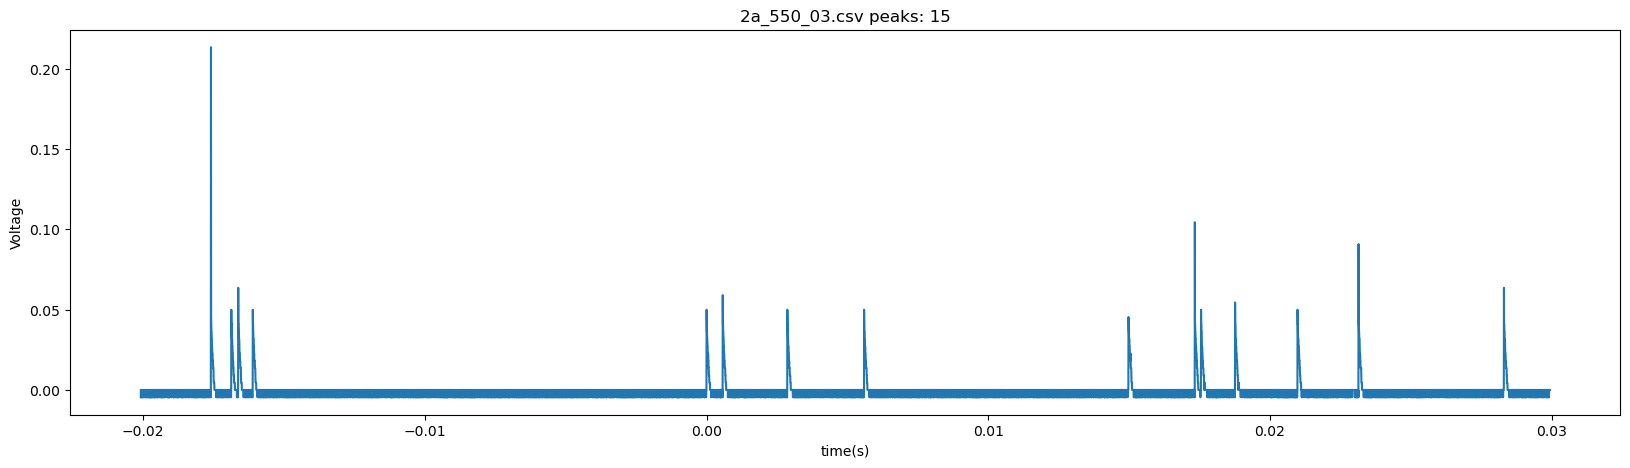

In [54]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from tkinter import Tk
from tkinter.filedialog import askdirectory


folder_path_task = "2a"
folder_path_voltage = [350,360,370,400,430,440,450,460,470,480,490,500,550]

peak_numbers_voltages = []
file_names_voltages = []

for i in range(len(folder_path_voltage)):

    folder_path = folder_path_task + "/" + folder_path_task + "_" + str(folder_path_voltage[i])
    
    # List CSV files
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    #list of peak integral
    peak_numbers = [] 
    file_names = []
    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        file_names.append(file_name)
        
        try:
            # Skip the first row and use the second row as header
            df = pd.read_csv(file_path, skiprows=1, encoding='utf-8')
    
            time_unit = df.columns[0].strip('() ')
            voltage_unit = df.columns[1].strip('() ').lower()
            voltage_raw = df.iloc[:, 1] 
    
    
            # Rename columns
            df.columns = ['Time_ms', 'Voltage_V']
    
            # Convert to numeric
            time_ms = pd.to_numeric(df['Time_ms'], errors='coerce')
            voltage = pd.to_numeric(df['Voltage_V'], errors='coerce')
            
            # Convert voltage to volts
            if 'mv' == voltage_unit:
                voltage = voltage*1e-3
            elif 'v' == voltage_unit:
                voltage = voltage
            else:
                raise ValueError(f"Unknown voltage unit: {voltage_unit}")

            
            # Convert time from microseconds to seconds
            time_s = time_ms * 1e-3
            mode_voltage = stats.mode(voltage, keepdims=True)[0][0]
    
            voltage_adjusted = voltage - mode_voltage

            
            n = 0
            over = False
            for j in range(len(voltage_adjusted)):
                if(voltage_adjusted[j] > 0.005):
                    if(over == False):
                        over = True
                        n += 1
                else:
                    over = False

            fig, axs = plt.subplots(figsize = (20,5))
            plt.plot(time_s, voltage_adjusted)
            plt.xlabel("time(s)")
            plt.ylabel("Voltage")
            plt.title(str(file_name) + " peaks: " + str(n))
            plt.show()


            
            peak_numbers.append(n)
    
        except Exception as e:

            print(f"Error processing {file_name}: {e}")

    peak_numbers_voltages.append(peak_numbers) 
    file_names_voltages.append(file_names)

In [1]:
mean_peak_numbers = []
for i in range(len(peak_numbers_voltages)):
    mean_peak_numbers.append(np.mean(peak_numbers_voltages[i])*20)

fig, axs = plt.subplots(figsize = (10,5))
plt.scatter(folder_path_voltage, mean_peak_numbers)
plt.xlabel("applied Voltage [V]")
plt.ylabel("average number of signals per second")
plt.title("Geiger Counter signal rate")
plt.savefig("2a/2a_signal_rate.png")
plt.show()

NameError: name 'peak_numbers_voltages' is not defined

In [59]:
mean_peak_numbers = []
for i in range(len(peak_numbers_voltages)):
    mean_peak_numbers.append(np.mean(peak_numbers_voltages[i])*20)


for i in range(len(folder_path_voltage)):
    DF_peak_number = pd.DataFrame(list(zip(file_names_voltages[i], peak_numbers_voltages[i])), columns =['file_name', 'number_of_signals_in_50 ms'])
    DF_peak_number.to_csv('2a/2a_signal_number_' + str(folder_path_voltage[i]) +'V.csv', index=False)


DF_signal_rate = pd.DataFrame(list(zip(folder_path_voltage, mean_peak_numbers)), columns =['applied_voltage_V', 'average_number_of_signals_per_second'])
DF_signal_rate.to_csv('2a/2a_signal_rate.csv', index=False)

# 2b

In [72]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

from tkinter import Tk
from tkinter.filedialog import askdirectory


folder_path_task = "2b"
folder_path_element = ["AM","NA","SR"]

peak_height_elements = []
file_names_elements = []

for i in range(len(folder_path_element)):

    folder_path = folder_path_task + "/" + folder_path_task + "_" + folder_path_element[i]
    
    # List CSV files
    csv_files = [f for f in os.listdir(folder_path) if f.endswith('.csv')]
    #list of peak integral
    peak_height = []
    file_names = []
    
    for file_name in csv_files:
        file_path = os.path.join(folder_path, file_name)
        file_names.append(file_name)
        try:
            # Skip the first row and use the second row as header
            df = pd.read_csv(file_path, skiprows=1, encoding='utf-8',sep = ',')
            
            time_unit = df.columns[0].strip('() ')
            voltage_unit = df.columns[1].strip('() ').lower()
            voltage_raw = df.iloc[:, 1] 
    
            
            # Rename columns
            df.columns = ['Time_us', 'Voltage_V']
            
            # Convert to numeric
            time_us = pd.to_numeric(df['Time_us'], errors='coerce')
            voltage = pd.to_numeric(df['Voltage_V'], errors='coerce')

            
            # Convert voltage to volts
            if 'mv' == voltage_unit:
                voltage = voltage*1e-3
            elif 'v' == voltage_unit:
                voltage = voltage
            else:
                raise ValueError(f"Unknown voltage unit: {voltage_unit}")
            
            # Convert time from microseconds to seconds
            time_s = time_us * 1e-6
            mode_voltage = stats.mode(voltage, keepdims=True)[0][0]

            voltage_adjusted = voltage - mode_voltage
    
            peak_height.append(np.max(voltage_adjusted))
            
        except Exception as e:

            peak_heights.append(np.nan)
            print(f"Error processing {file_name}: {e}")
            
    peak_height_elements.append(peak_height)
    file_names_elements.append(file_names)

In [73]:
for i in range(3):
    print(np.mean(peak_height_elements[i]))

0.308851128
0.30794166799999995
0.3058992079999999


In [74]:
for i in range(len(folder_path_element)):
    file_names_elements[i].append("average")
    peak_height_elements[i].append(np.mean(peak_height_elements[i]))
    DF_peak_number = pd.DataFrame(list(zip(file_names_elements[i], peak_height_elements[i])), columns =['file_name', 'signal_height_in_V'])
    DF_peak_number.to_csv('2b/2b_signal_height_' + str(folder_path_element[i]) +'.csv', index=False)